# **STAT 200 Project (120 points)**

#### **Brandon Miner**


---

<br>

For your project, you must analyze data from the [COPDGene study](http://www.copdgene.org/) using the concepts covered in this course. Please follow the directions below carefully:

- <font color=red>Tasks</font> indicated in red must be completed to receive credit
- Include all code for your work
- Comment all code using the `#`. This is a must!
- Include markdown cells with written answers explaining your work when prompted
- **NOTE: Your completed project must be submitted to Canvas as a .ipynb file by the assigned due date**



<br>

---

<br>






## Data

Data for the project is available [here](https://raw.githubusercontent.com/khasenst/datasets_teaching/main/copd_data_project.csv). A data dictionary describing the meaning of each of the variables in the dataset is available in the Project module in Canvas.

<br>

---

<br>






## Introduction

Chronic obstructive pulmonary disease (COPD) affects over 16 million Americans and is the fourth leading cause of death in the United States behind heart disease, cancer, and accidental death. While COPD can result from various toxic inhalations or asthma, it is most commonly associated with cigarette smoking.

<br>

COPD severity is typically measured by a device called a spirometer. Patients forcefully exhale into the device and the volume of air exhaled is used as a measure for the severity of disease (less air exhaled $\Rightarrow$ worse disease). Data collected by the COPDGene research group includes spirometry data on thousands of research participants.

<br>

Spirometry measures in the dataset:
* The forced expiratory volume (`FEV1`) is the volume of air exhaled in 1 second
* The forced vital capacity (`FVC`) is the total volume of air exhaled after a full breath
* `FEV1_FVC_ratio` is the ratio between `FEV1` and `FVC` (smaller $\Rightarrow$ worse disease)
* `FEV1_phase2` is the `FEV1` of research participants 5 years later

<br>

You overall task in this project is to analyze the relationship between FEV1 at follow-up `FEV1_phase2` and other variables in the dataset. The project has been organized into a series of tasks to assist you with your analysis organization.

<br>

---

<br>






## Code

####<font color=red>Organized</font> (5 points)
* Answers should be organized in the following format for organization and readability

<br>

```
# 1.
This will be the code block to answer the first part of a task
```

1. This will be the text answer/explanation (if prompted) for the first task

```
# 2.
This will be the code block to answer the second part of a task in a separate code cell
```

2. This will be the text answer/explanation (if prompted) for the second task

<br>

Continue this format for the remaining subtasks


<br>

---

<br>






#### Libraries

In [11]:
library(tidyverse)

####<font color=red>Task 1</font> (5 points)

1. Load the COPDGene dataset and show the first few lines.
2. Remove the NAs from the dataset and store as `dat1`. How many rows does `dat1` contain? Answer in a complete sentence.
3. Select all rows in the dataset where `FEV1_phase2` is `NA` and store as `dat2`. How many rows does `dat2` contain? Answer in a complete sentence.


In [12]:
# 1.
dat = data.frame(read.csv("https://raw.githubusercontent.com/khasenst/datasets_teaching/main/copd_data_project.csv"))
print(nrow(dat))
#2.
dat1 = na.omit(dat)
print(nrow(dat1))

[1] 5747
[1] 4000


There are 4000 rows with no NAs in them in the original data set.

In [13]:
#3.
dat2 = dat[dat$FEV1_phase2 == "NA",]
print(nrow(dat2))

[1] 1747


There are 1747 rows in the original data set with at least one NA

<br>

---

<br>






####<font color=red>Task 2</font> (10 points)

1. From `dat1`, plot the histogram of `FEV1`
2. Calculate the percentage of `FEV1` values within one standard deviation of its mean. Answer in a complete sentence.
3. Calculate the percentage of `FEV1` values within 2 standard deviations of its mean. Answer in a complete sentence.
4. Use your answers from 2.1-2.3 to determine if the FEV1 variable is approximately normally distributed.


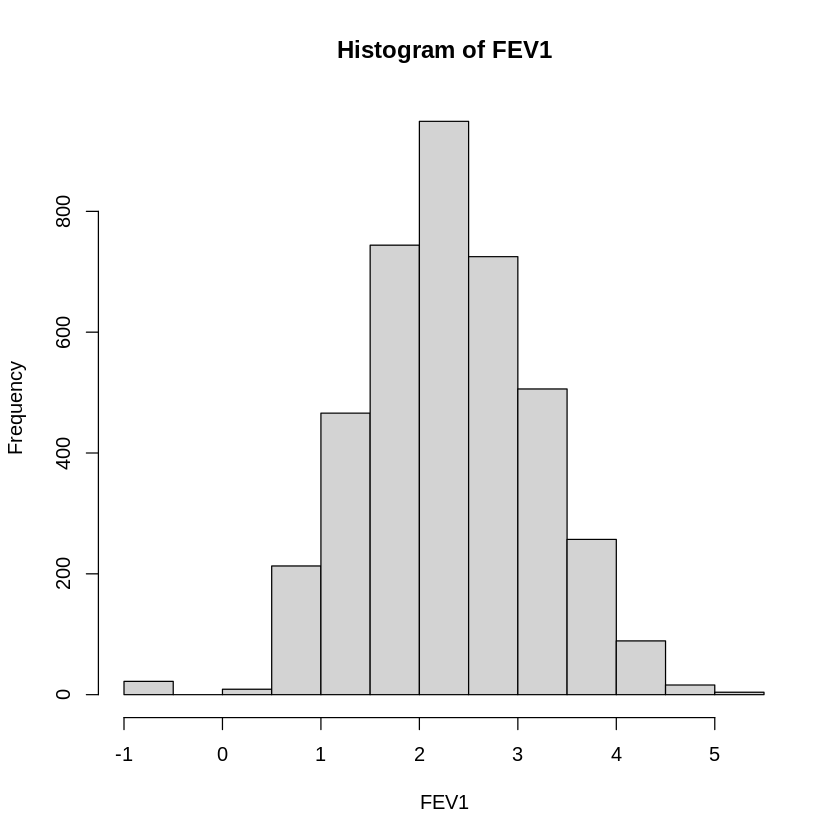

In [14]:
# 1.
hist(dat1$FEV1,main = "Histogram of FEV1", xlab="FEV1")

In [15]:
# 2.
mean_FEV1 = mean(dat1$FEV1)
sd_FEV1 = sd(dat1$FEV1)
min = mean_FEV1 - sd_FEV1
max = mean_FEV1 + sd_FEV1
percent = nrow(dat[dat1$FEV1 >= min & dat1$FEV1 <= max,]) / nrow(dat1) * 100
print(mean_FEV1)
print(sd_FEV1)
print(paste0(percent,"%"))

[1] 2.31065
[1] 0.8736347
[1] "96.675%"


96.675% of the data is captured within one standard deviation of its mean.

In [16]:
# 3.
mean_FEV1 = mean(dat1$FEV1)
sd_FEV1 = sd(dat1$FEV1)
min = min - sd_FEV1
max = max + sd_FEV1
percent = nrow(dat1[dat1$FEV1 >= min & dat1$FEV1 <= max,]) / nrow(dat1)*100
print(paste0(percent,"%"))

[1] "96.75%"


96.75% of the data is captured withon two standard deviations of its mean.

##### 5.
The shape of the histogram is bell-shaped which could indicate Normality, but given that much more that 68% of the data is within one standard deciation of the mean, we can suspect that the distribution is Normal while being skeptical.

<br>

---

<br>






####<font color=red>Task 3</font> (10 points)

1. From `dat1`, find two other numeric variables and plot their histograms.
2. Describe the histogram of the FIRST variable you chose.
    * Range, standard deviation, skewness or symmetry, mean, normally distributed, outlier observations etc.
    * You may use R functions to help you answer and describe the distribution
    * Answer in complete sentences in a paragraph
2. Describe the histogram of the SECOND variable you chose.
    * Range, standard deviation, skewness or symmetry, mean, normally distributed, outlier observations etc.
    * You may use R functions to help you answer and describe the distribution
    * Answer in complete sentences in a paragraph

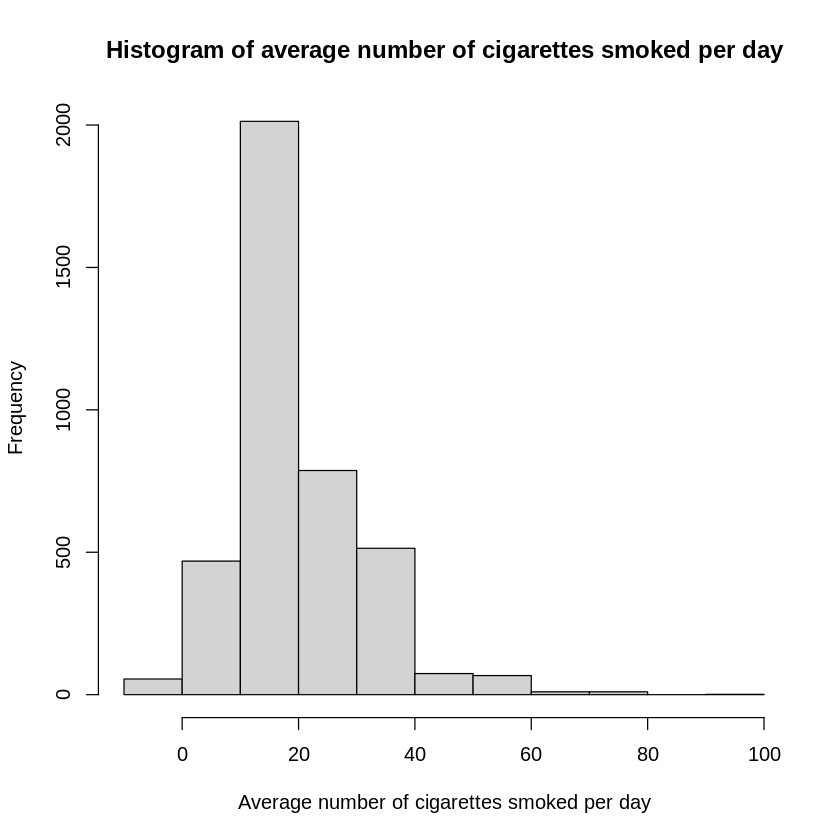

In [17]:
# 1.
hist(dat1$CigPerDaySmokAvg, main = "Histogram of average number of cigarettes smoked per day",
  xlab="Average number of cigarettes smoked per day")

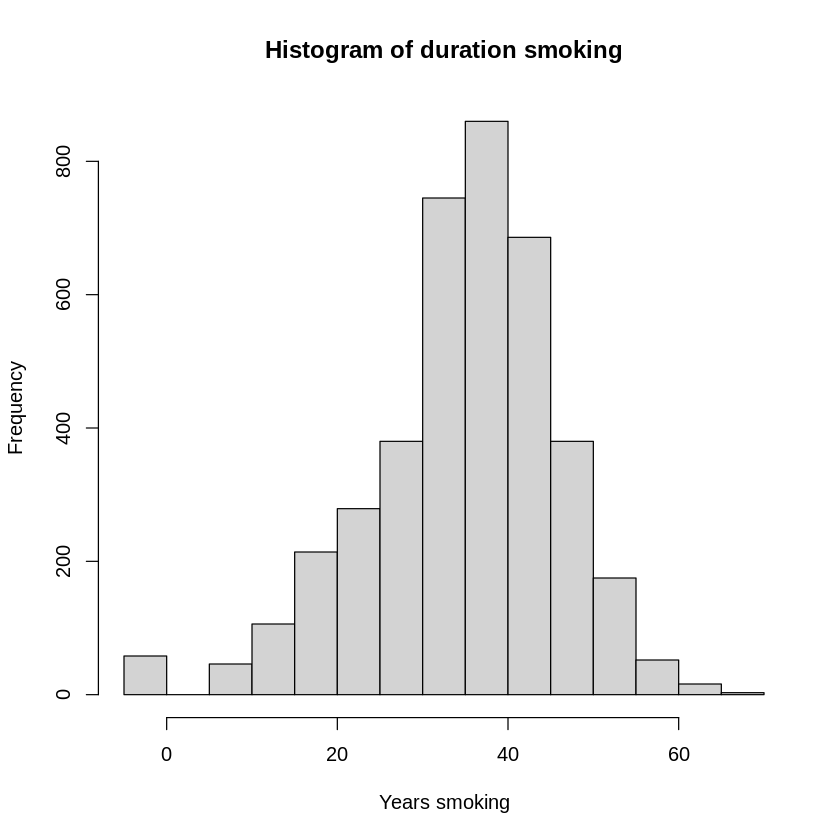

In [18]:
hist(dat1$Duration_Smoking, main="Histogram of duration smoking", xlab = "Years smoking")

##### 2.
The distribution of my first histogram is of the average number of cigarettes smoked per day. The range is ~110 cigarettes. The standard deviation is very large due to the long right skew. The mean looks to be around 25 cigarattes. The fact that someone smoked anywhere close to 100 cigarettes on average per day is either incorrect data entry, or that person has lung cancer.

##### 3.
The distribution of my second histogram is of the duration spent smoking in year. The graph looks like it is somewhat symmetric asside from a possible left skew, but overalll cannot say for certain either way. The range is 75 years. The standard deviation is possibly around ~10 years or more based on the graph. One thing to point out is the bin [-5,0] which seems to indicate people who have smoked for 0 years. The fact that this bin is so low means that the sample is specific to some category of people.

<br>

---

<br>






####<font color=red>Task 4</font> (10 points)

1. Using `dat1`, create a boxplot to visualize the relationship between `FEV1_phase2` and `smoking_status`.
2. Based on the boxplot, which group tends to have better breathing capacity?
3. Select rows in `dat1` corresponding to a `smoking_status` of `Current smoker` or `Former smoker`. Create a 95% confidence interval to determine if average FEV1 for phase 2 is different between current or former smokers. Explain your answer in complete sentences.

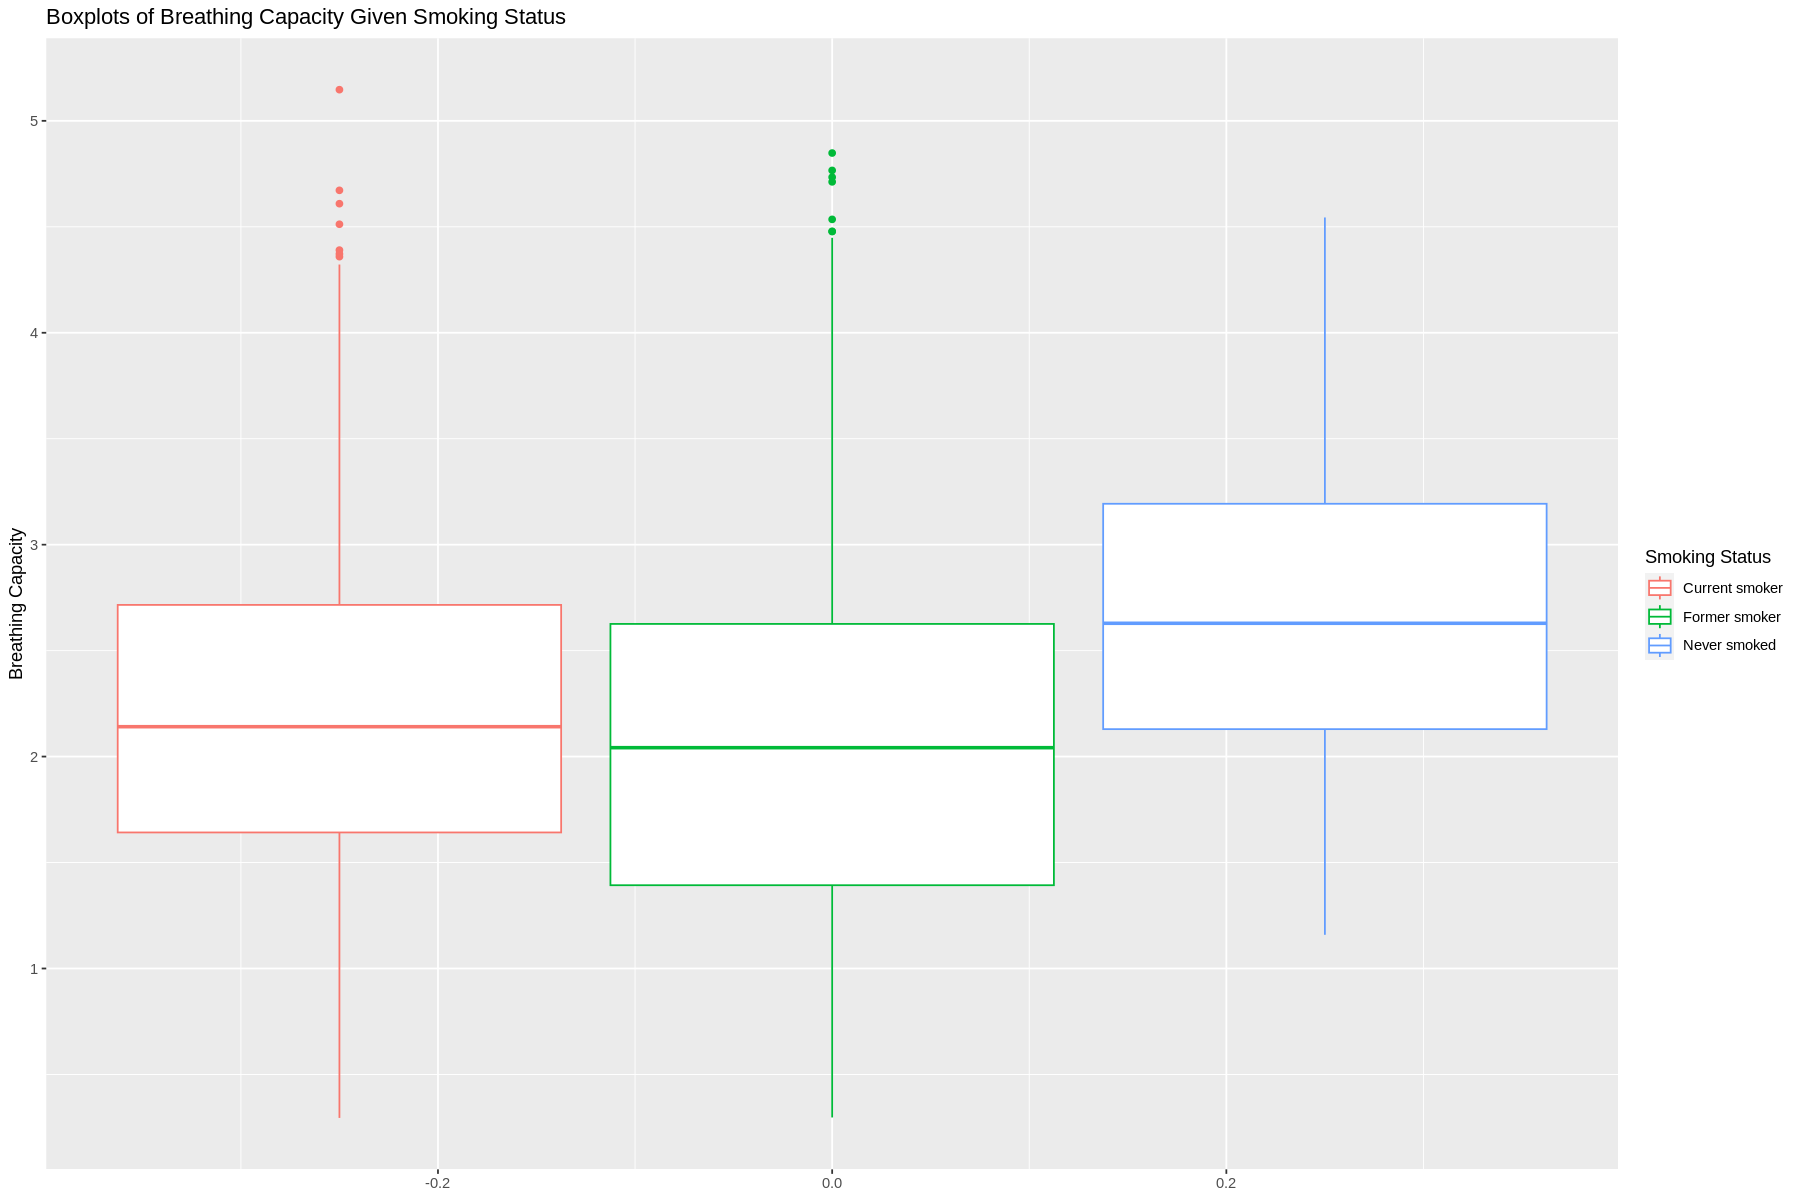

In [19]:
# 1.
options(repr.plot.width = 15, repr.plot.height = 10)
ggplot(dat1, aes(y=FEV1_phase2, color = smoking_status))+
  geom_boxplot()+
  labs(title="Boxplots of Breathing Capacity Given Smoking Status",
  y="Breathing Capacity"
  ) +
  guides(color=guide_legend(title="Smoking Status"))

##### 2.
The group that seems to have better breathing capacity are people who have never smoked. This is seen in the median being higher than the other two types of people(former/current smokers). This makes sense since smoking damages your lungs.

In [20]:
# 3.
print(paste("Current:",mean(dat1$FEV1_phase2[dat1$smoking_status == "Current smoker"]),"Former:", mean(dat1$FEV1_phase2[dat1$smoking_status == "Former smoker"])))

[1] "Current: 2.17946292481977 Former: 2.04664403394908"


In [21]:
sub_dat1 = dat1 |>
  select(smoking_status, FEV1_phase2) |>
  filter(smoking_status == "Current smoker" | smoking_status == "Former smoker")
t.test(sub_dat1$FEV1_phase2 ~ sub_dat1$smoking_status)$conf.int

[1] 0.08155305 0.18408473
attr(,"conf.level")
[1] 0.95

We are 95% confident the true difference in breathing capacity after 5 years between former and current smokers is within the interval [0.081,0.184]. We can conclude that there is less than 5% probabilty that former smokers and current smokers have the same breathing capacity after 5 years. Specifically, current smokers seem to have a higher breathing capacity after 5 years. This might be because the ramifications of smoking have manifested from many years of smoking for the former smokers, while current smokers have yet to feel the harmful effects of smoking.

<br>

---

<br>






####<font color=red>Task 5</font> (10 points)

1. Using `dat1`, create two more boxplots to visualize the relationship between `FEV1_phase2` and two other categorical variables.
2. For the first variable, use a 95% confidence interval to determine if the average `FEV1_phase2` is different between two categories.
3. For the second variable, use a 95% confidence interval to determine if the average `FEV1_phase2` in phase 2 is different between two categories.

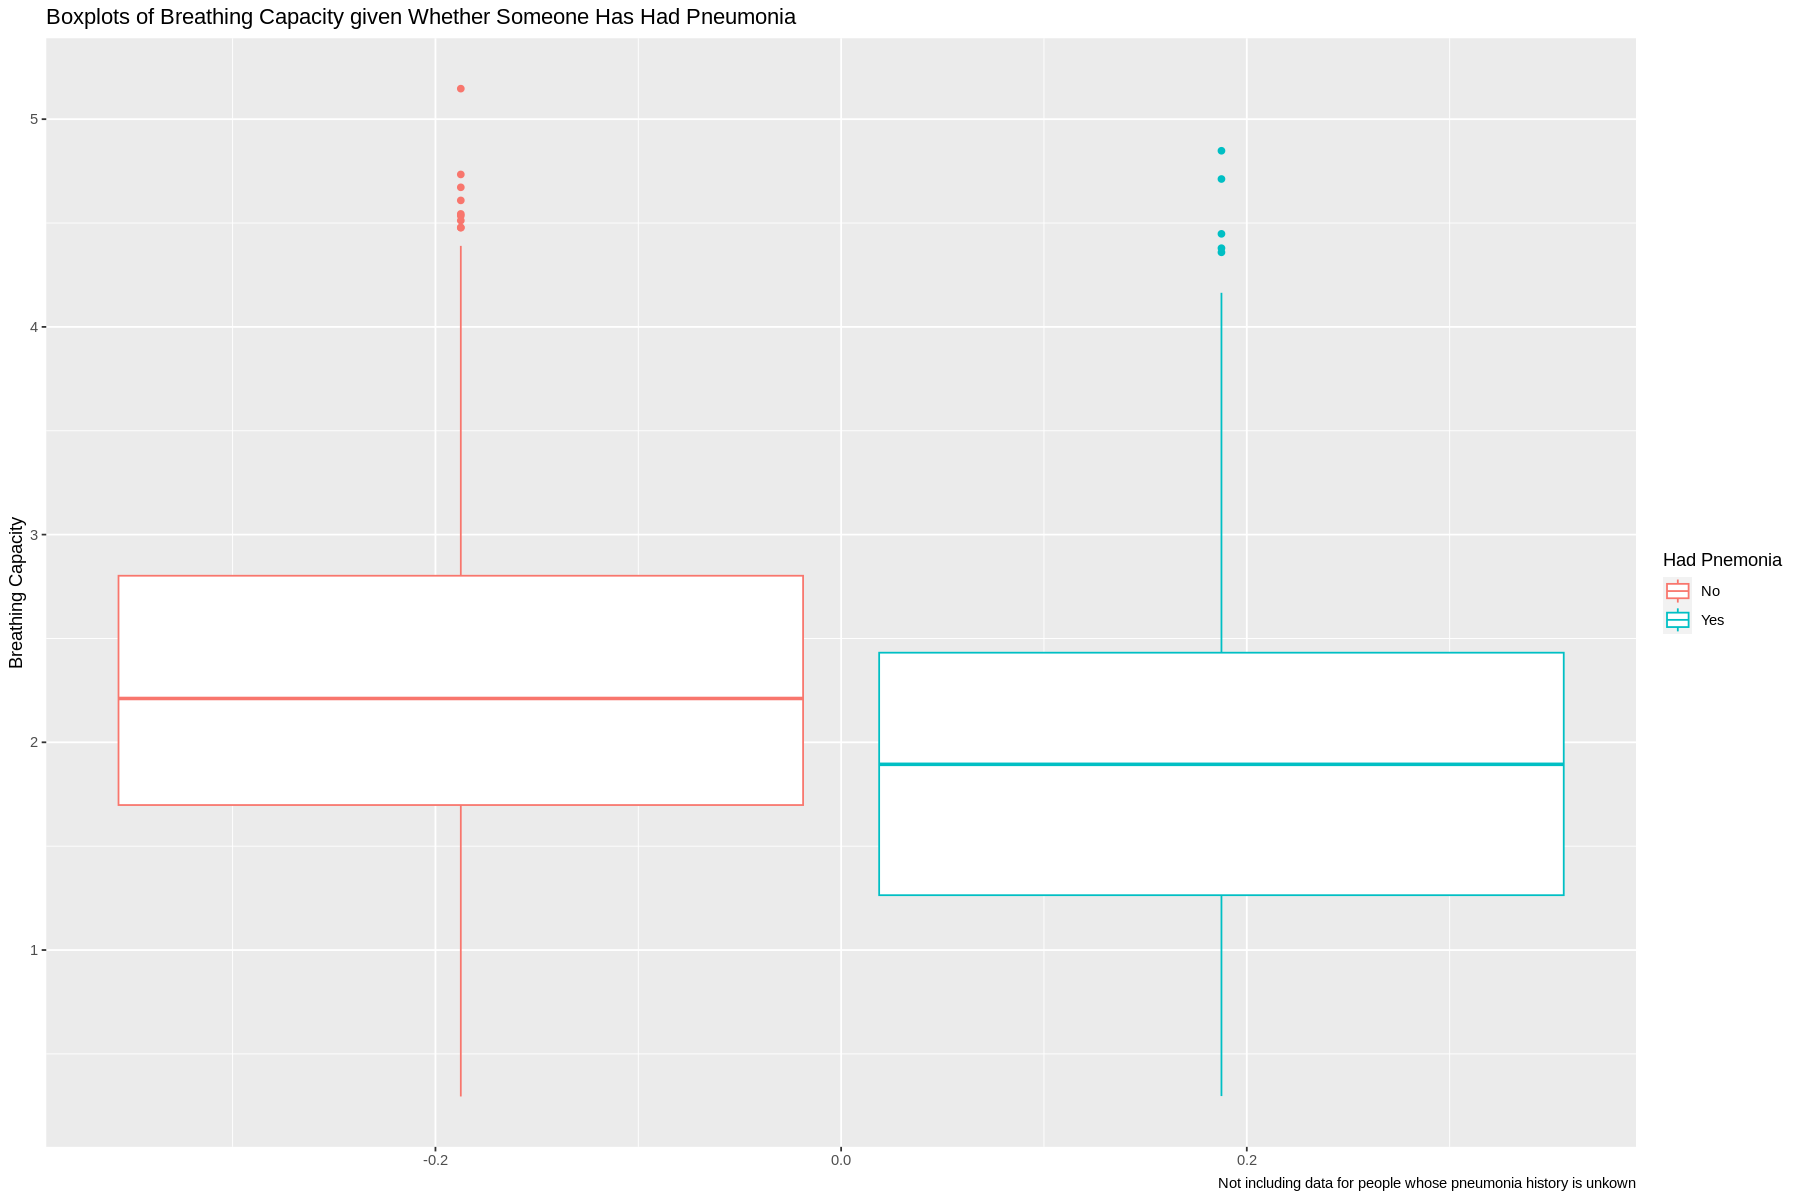

In [22]:
# 1.
options(repr.plot.width = 15, repr.plot.height = 10)
ggplot(dat1 |>
  select(pneumonia, FEV1_phase2) |>
    filter(pneumonia == "No" | pneumonia == "Yes"), aes(y=FEV1_phase2, color = pneumonia))+
  geom_boxplot()+
  labs(title="Boxplots of Breathing Capacity given Whether Someone Has Had Pneumonia",
  y="Breathing Capacity",
  caption = "Not including data for people whose pneumonia history is unkown"
  ) +
  guides(color=guide_legend(title="Had Pnemonia"))

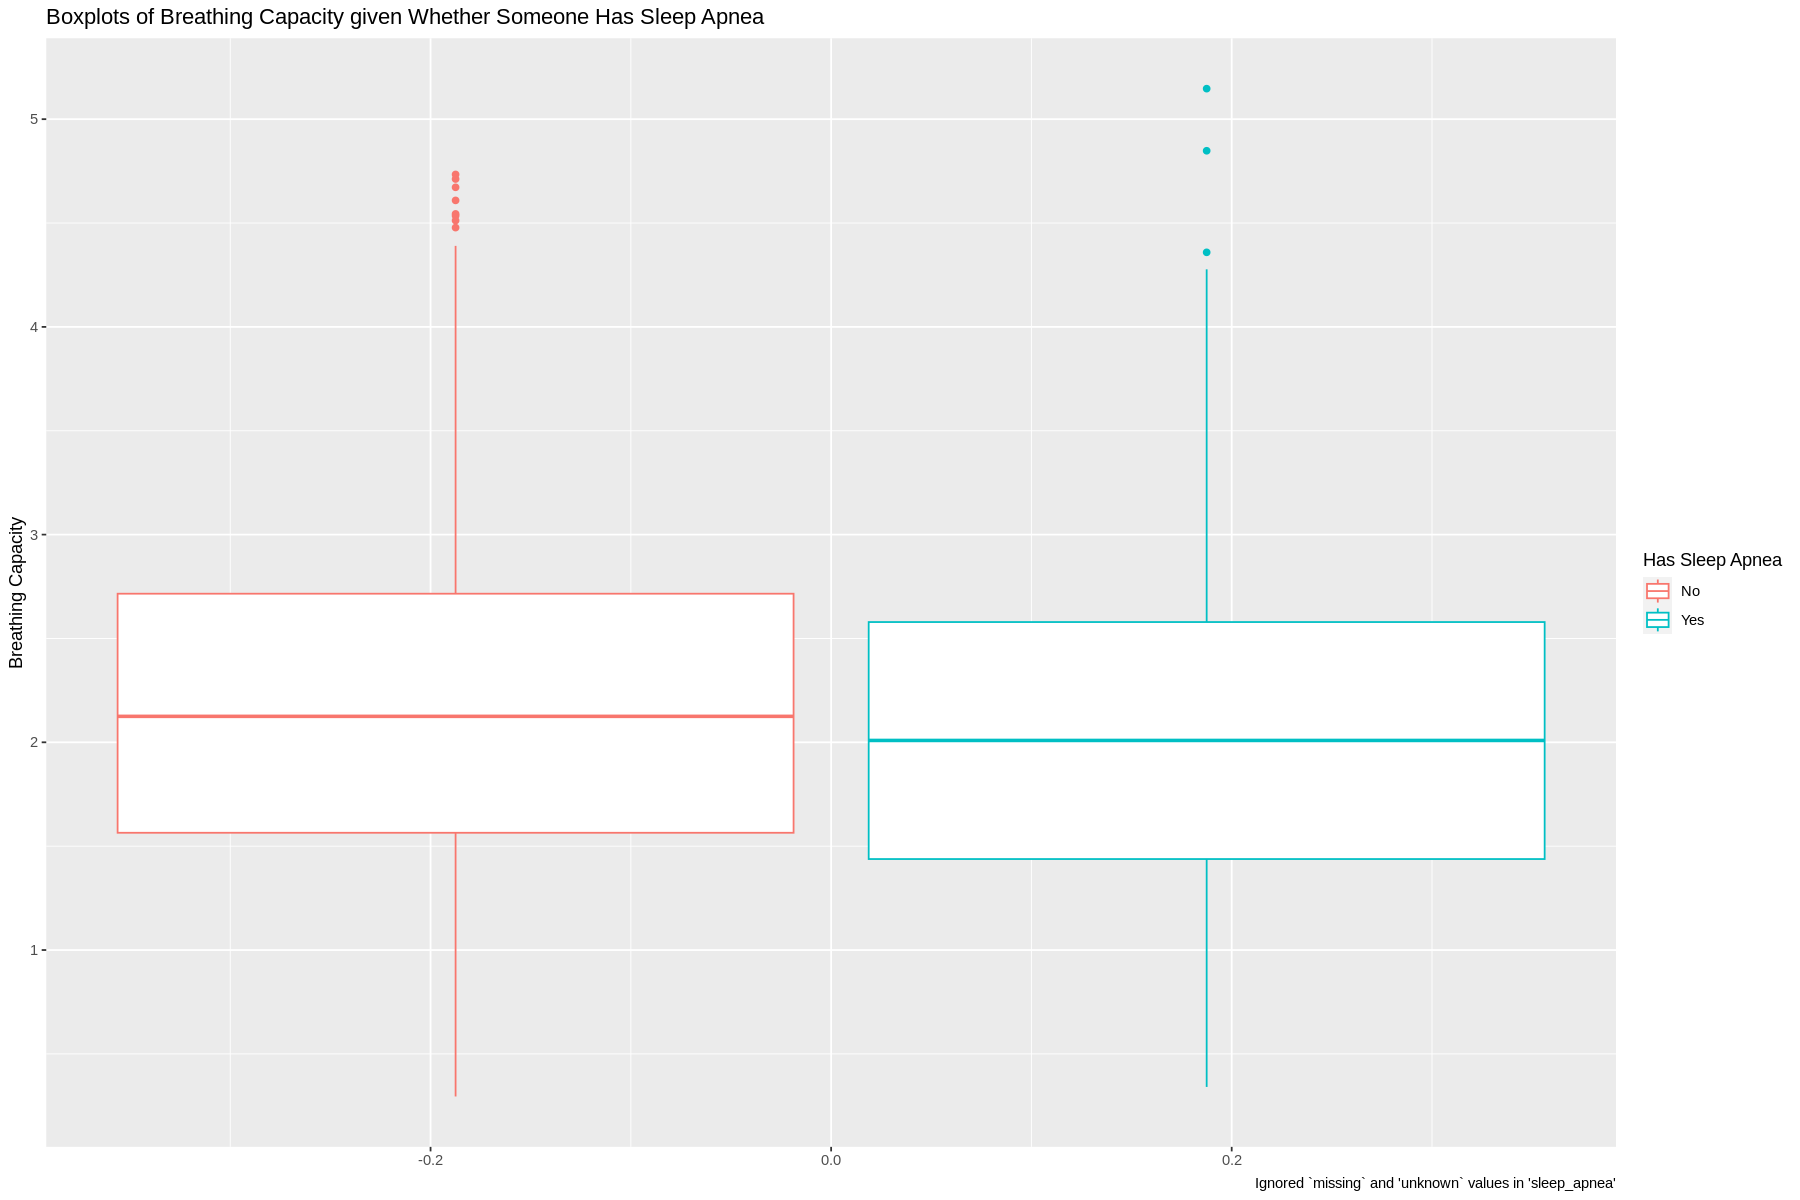

In [23]:
options(repr.plot.width = 15, repr.plot.height = 10)
ggplot(dat1 |>
  select(sleep_apnea, FEV1_phase2) |>
  filter(sleep_apnea == "Yes" | sleep_apnea == "No"), aes(y=FEV1_phase2, color = sleep_apnea))+
  geom_boxplot()+
  labs(title="Boxplots of Breathing Capacity given Whether Someone Has Sleep Apnea",
  y="Breathing Capacity", caption = "Ignored `missing` and 'unknown` values in 'sleep_apnea'"
  ) +
  guides(color=guide_legend(title="Has Sleep Apnea"))

<br>

---

<br>






####<font color=red>Task 6</font> (20 points)

1. Using `dat1`, create a scatterplot visualizing the relationship between `FEV1_phase2` (y-axis) and `FEV1` (x-axis). Note that values that are -1 are missing observations. You may ignore this for this class.
2. What relationship do you observe based on the scatterplot?
3. Fit a simple linear regression model by regressing `FEV1_phase2` (Y) on `FEV1` (X). Summarize the regression.
4. Describe the $R^2$ of the regression in the context of its definition.
5. What is the slope and its interpretation in the context of `FEV1` and `FEV1_phase2`? Explain in complete sentences
6. What is the intercept and its interpretation in the context of `FEV1` and `FEV1_phase2`? Explain in complete sentences
7. Use a 95% confidence interval to determine if the slope is significantly less than 1. Explain what this means in terms of breathing health of the patients.

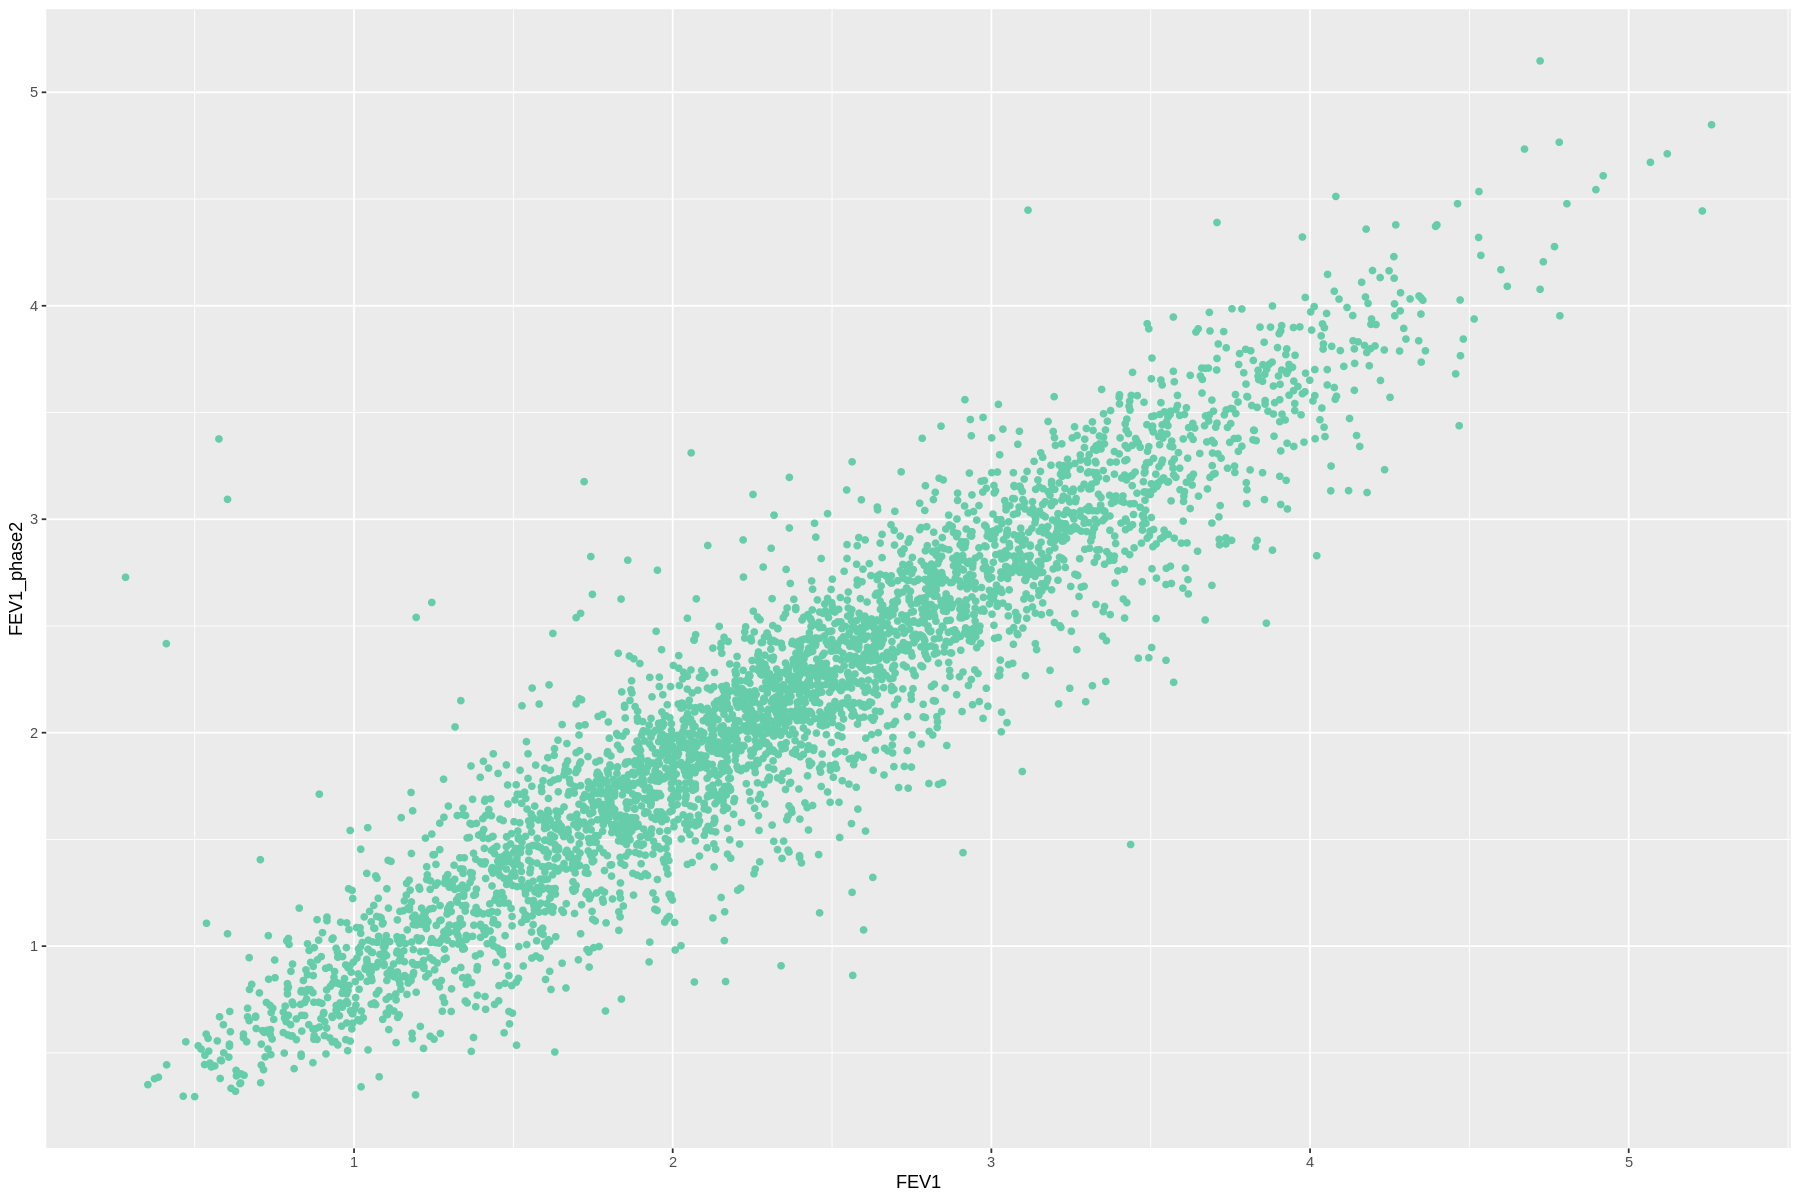

In [24]:
# 1.
ggplot(dat1 |> filter(FEV1 >= 0, FEV1_phase2 >= 0), aes(x=FEV1,y=FEV1_phase2)) +
  geom_point(color = "aquamarine3")

**2.**\
There is a strong positive linear relationship between FEV1 and FEV1_phase2. This makes sense because someone's breathing capacity is not likely to decrease a lot over time.

In [25]:
# 3.
lin_reg = lm(FEV1_phase2~FEV1,data=dat1)
summary(lin_reg)


Call:
lm(formula = FEV1_phase2 ~ FEV1, data = dat1)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.5909 -0.1880 -0.0144  0.1609  4.3971 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.178336   0.016943   10.53   <2e-16 ***
FEV1        0.840423   0.006859  122.53   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3789 on 3998 degrees of freedom
Multiple R-squared:  0.7897,	Adjusted R-squared:  0.7897 
F-statistic: 1.501e+04 on 1 and 3998 DF,  p-value: < 2.2e-16


**4.**\
78.97% of the variability in `FEV1_phase2` is explained by the inclusion of `FEV1` in the regression

**5.**\
For every increase in `FEV1`, `FEV1_phase2` is increased by 0.84.

**6.**\
If someone has an `FEV1` of zero, their expected `FEV1_phase2` is 0.1783

In [26]:
# 7.
confint(lin_reg)

,2.5 %,97.5 %
(Intercept),0.1451177,0.2115549
FEV1,0.8269759,0.8538708


We are 95% confident that the true slope of the relationship between `FEV1` and `FEV1_phase2` is within the interval $[0.8269759,0.85387708]$

<br>

---

<br>






####<font color=red>Task 7</font> (10 points)

1. Identify two other variables in `dat1` that you think would be related to breathing health, as measured by `FEV1_phase2`. Plot these variables using scatterplots (`FEV1_phase2` on Y axis, variable 1 or variable 2 on X axis). What do you observe? Explain in complete sentences.
2. Include these two variables (categorical or numeric), along with `FEV1`, in your regression from Task 6. Show the regression summary. Keep `FEV1_phase2` as Y.
3. Using 95% confidence intervals, are the slopes for the two variables you selected significantly different from 0? Explain and interpret in complete sentences.


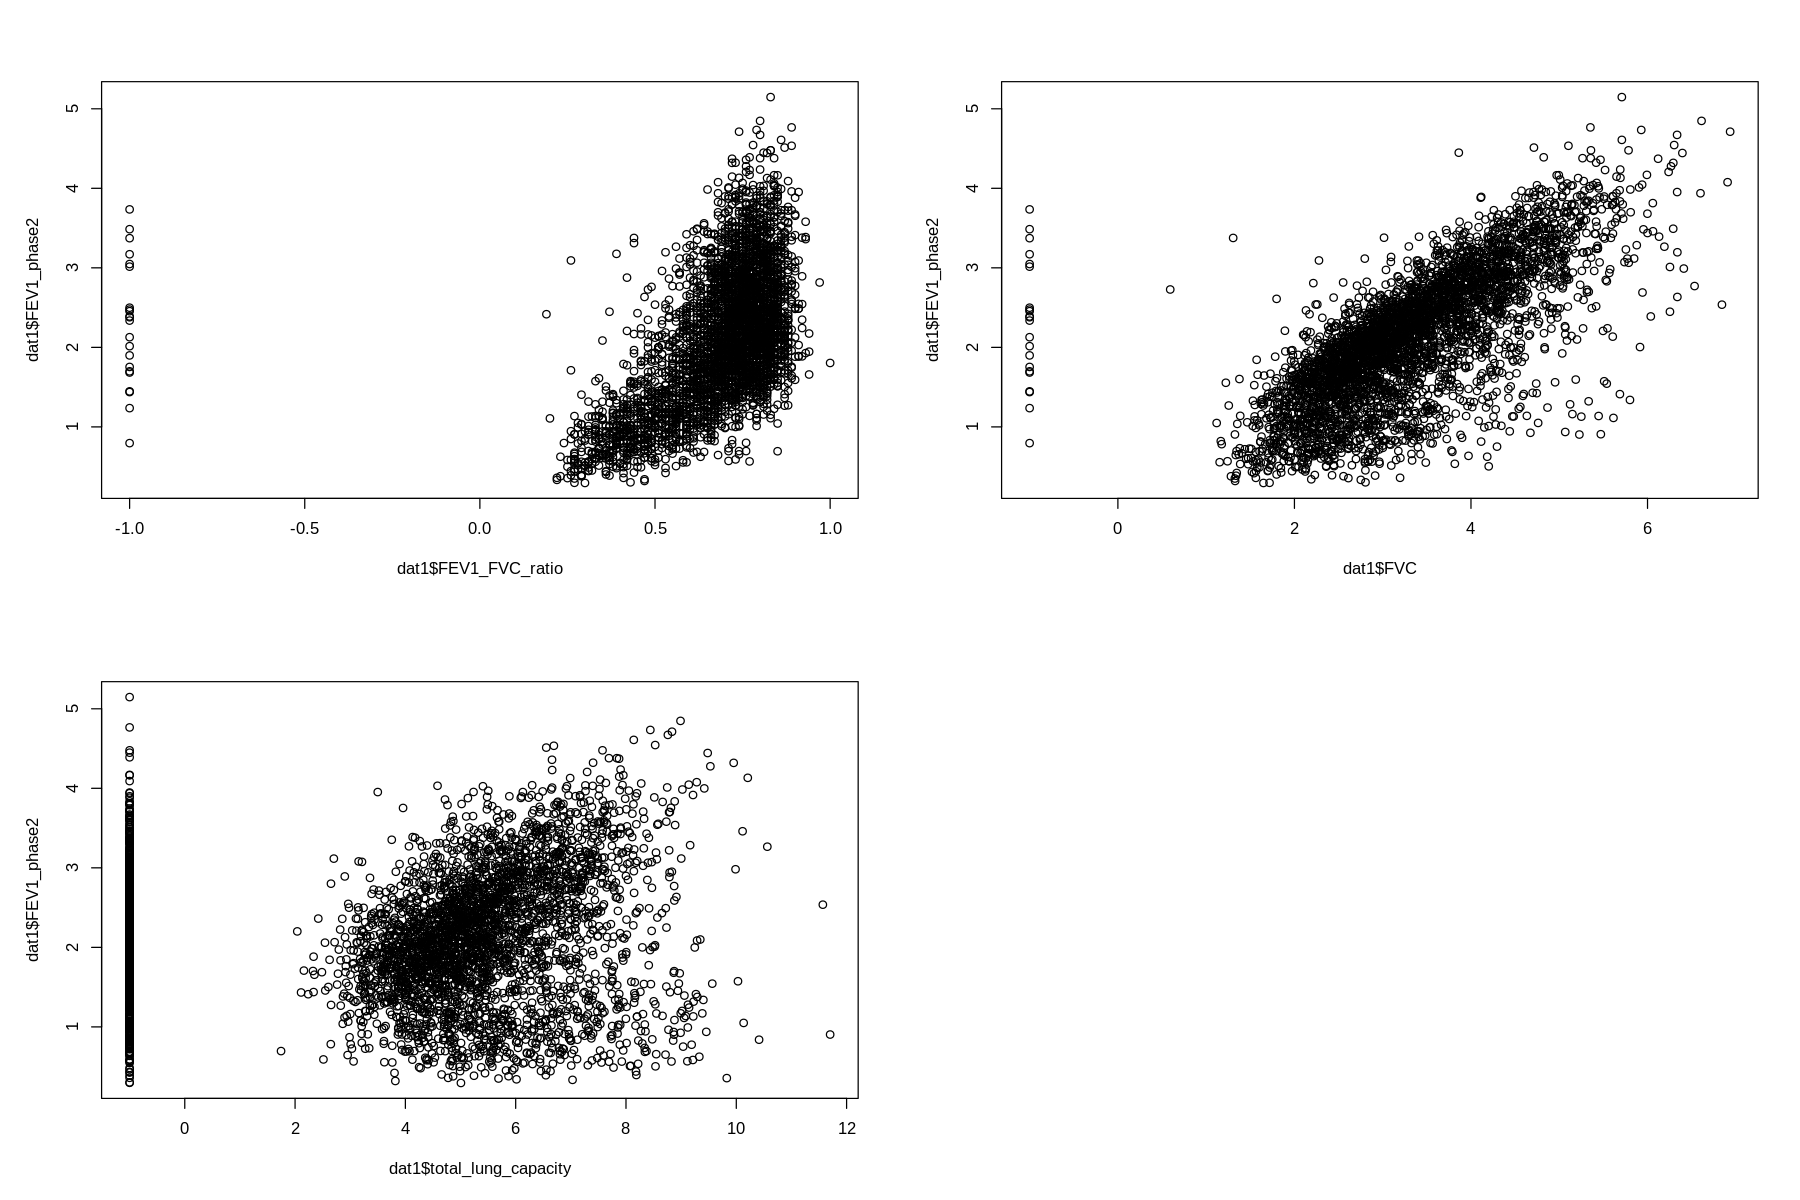

In [27]:
# 1.
par(mfrow = c(2,2), mar = c(5, 5, 4, 2) + 0.1)
plot(x=dat1$FEV1_FVC_ratio,y=dat1$FEV1_phase2)
plot(x=dat1$FVC,y=dat1$FEV1_phase2)
plot(x=dat1$total_lung_capacity,y=dat1$FEV1_phase2)

I decided to look into `FEV1_FVC_ratio`, `FVC`, and `total_lung_capacity`. I was interested in there three because I wanted to look at `FVC`, but was unsure if the ratio between `FEV1` and `FVC` would prove a more effective variable. Along with `total_lung_capacity` because it would make sense that the size of the lung capacity would change the amount of air exhaled. From the plots, `FEV1_FVC_ratio` looks nicely quadratic of degree 2, and `FVC` looks strongly linear. `total_lung_capacity` is a bit of a mess due to the wide array of clustering occuring, but it could be described as approximately/somewhat linear.

In [28]:
# 2.
samp <- sample(1:nrow(dat1), round(nrow(dat1)*0.8))
train <- dat1[samp, ]
valid <- dat1[-samp, ]

mse = function(truth,pred){
  return(mean((truth-pred)^2))
}

fit = lm(data=train, FEV1_phase2~FEV1+poly(total_lung_capacity,1)+poly(FEV1_FVC_ratio,2))
mse(valid$FEV1_phase2,predict(fit,valid))
summary(fit)

[1] 0.08764299


Call:
lm(formula = FEV1_phase2 ~ FEV1 + poly(total_lung_capacity, 1) + 
    poly(FEV1_FVC_ratio, 2), data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.6618 -0.1599  0.0009  0.1571  2.4895 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   0.109891   0.019943   5.510 3.87e-08 ***
FEV1                          0.872248   0.008356 104.383  < 2e-16 ***
poly(total_lung_capacity, 1)  1.078229   0.321051   3.358 0.000793 ***
poly(FEV1_FVC_ratio, 2)1     -7.315852   0.408891 -17.892  < 2e-16 ***
poly(FEV1_FVC_ratio, 2)2     12.478795   0.314544  39.673  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2994 on 3195 degrees of freedom
Multiple R-squared:  0.8675,	Adjusted R-squared:  0.8674 
F-statistic:  5232 on 4 and 3195 DF,  p-value: < 2.2e-16


In [29]:
# 3.
confint(fit)

,2.5 %,97.5 %
(Intercept),0.07078777,0.1489940
FEV1,0.85586370,0.8886319
"poly(total_lung_capacity, 1)",0.44874215,1.7077163
"poly(FEV1_FVC_ratio, 2)1",-8.11756693,-6.5141374
"poly(FEV1_FVC_ratio, 2)2",11.86206695,13.0955233


For all variables, we can say that they are significantly different from zero, including the intercept. `FEV1`, `total_lung_capacity`, and `FEV1_FVC_ratio`$^2$ all have confidence intervals greater than zero for the entire interval, and `FEV1_FVC_ratio` is less than zero for the entire interval.

<br>

---

<br>






####<font color=red>Task 8</font> (5 points)

1. Using your regression model with three variables from Task 7, predict the `FEV1_phase2`.
2. Calculate the root mean squared error. Is this error large or small? Explain your answer.


```
# Hint
y <- dat1$FEV1_phase2
y_predicted <- fitted(lm(...))

# root mean squared error
rmse <- sqrt(mean((y - y_predicted)^2))
```




In [30]:
# 1.
y <- dat1$FEV1_phase2
y_predicted <- fitted(fit)

# 2.
rmse <- mse(y,y_predicted)
print(rmse)

Warning message in truth - pred:
“longer object length is not a multiple of shorter object length”


[1] 1.270742


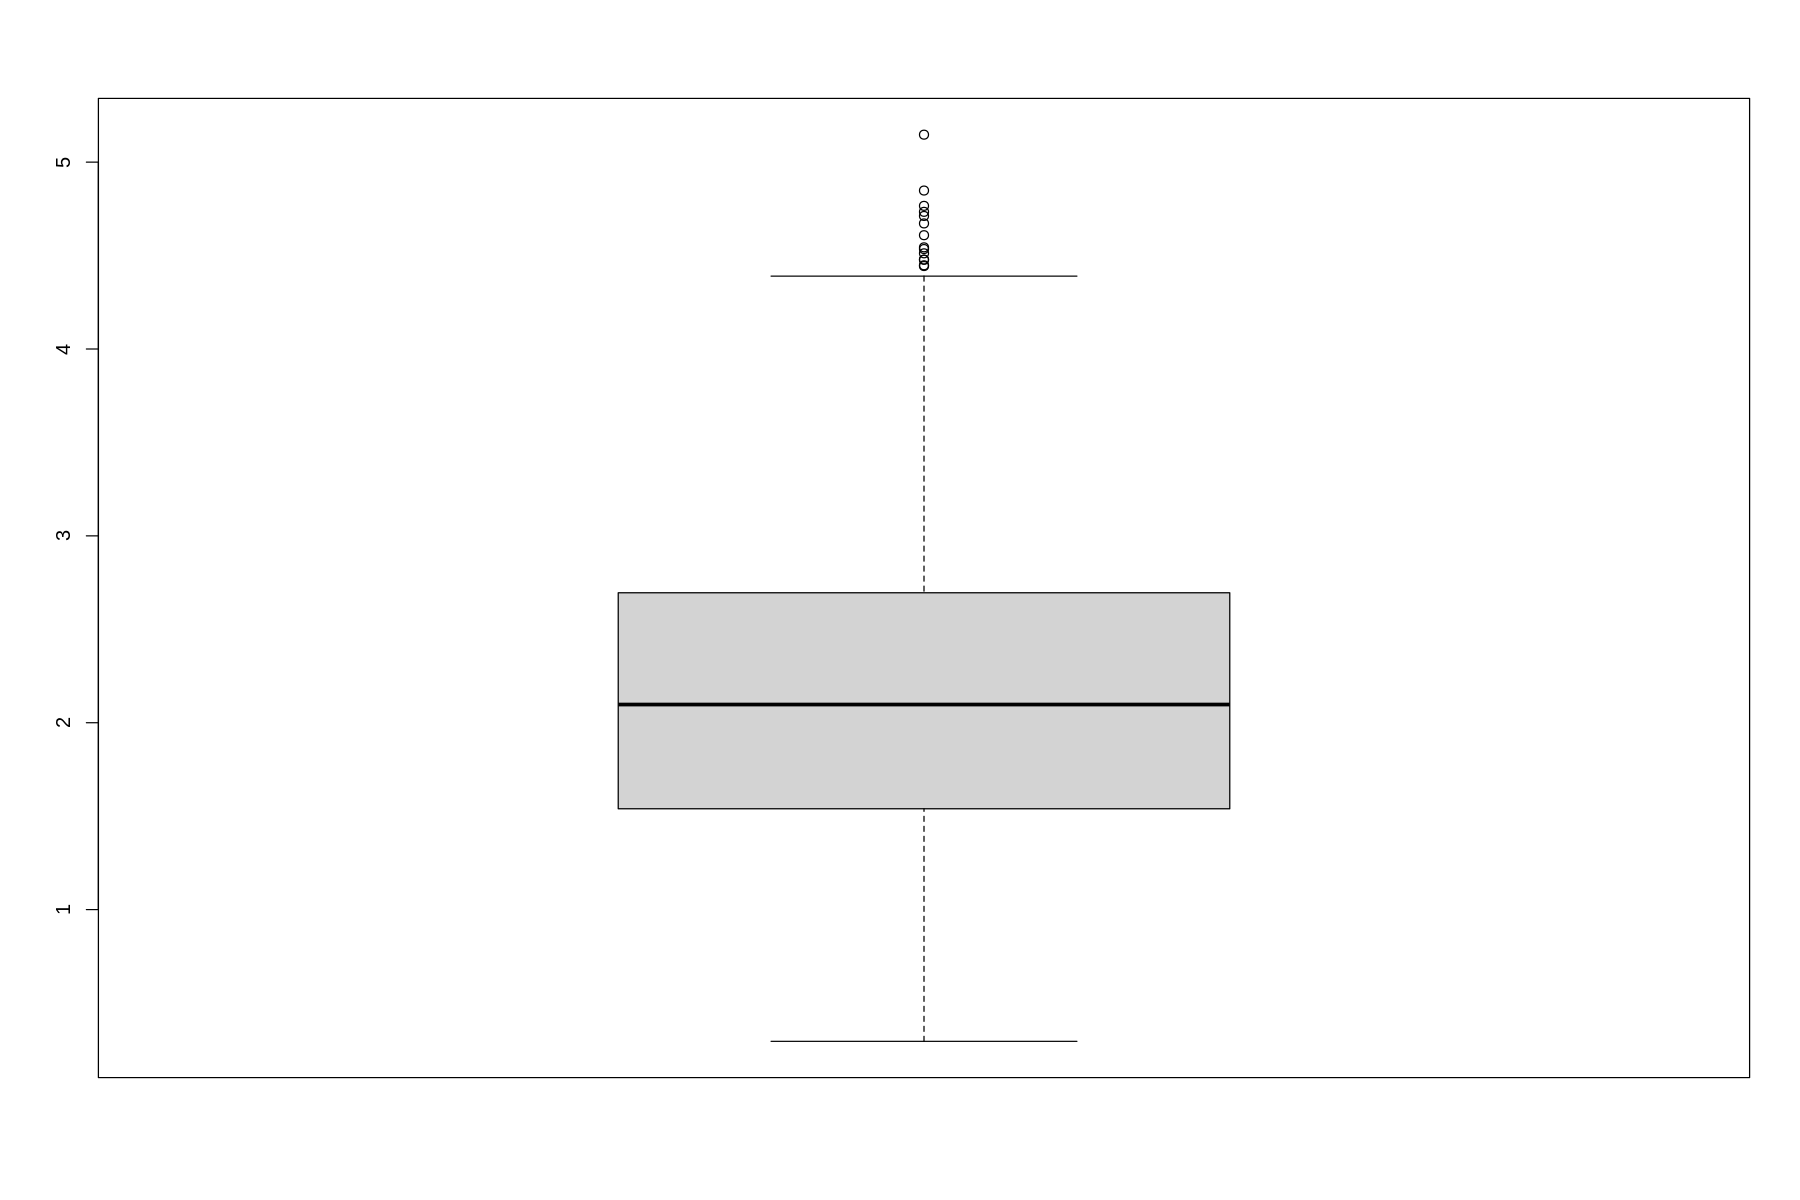

In [31]:
boxplot(dat1$FEV1_phase2)

Our current model has a mean squared error of 1.3 litres. This error is not atrociously bad, but it is large enough to plot an observation whose true value is the median at 2, to outside the first/third quartile. I believe that I better model should be adviced. Possible the choice of variables was not very good.

<br>

---

<br>






####<font color=red>Task 9</font> Group Task (15 points)

1. Using the statistical/machine learning concepts from class, build a model (regression or random forest) that best predicts the `FEV1_phase2` variable in the `dat2` dataframe.
2. Submit your predictions as a csv file in the format presented in the `copd_predictions.csv` file on Canvas.

<br>
<br>

* The group with the lowest prediction error will receive 10 points extra credit on their overall project grade.
* The group with the second lowest prediction error will receive 5 points extra credit on their overall project grade.
* The group with the third lowest prediction error will receive 2 points extra credit on their overall project grade.

In [32]:
samp <- sample(1:nrow(dat1), round(.75*nrow(dat1)))
train <- dat1[samp, ]
valid <- dat1[-samp, ]

# Mean squared error function
mse = function(truth,pred){
  return(mean((truth-pred)^2))
}

mse_train_valid = function(explanatory, response) {
  degree   <- 1:3
  mse_train <- c()
  mse_valid <- c()

  for (i in degree) {
    formula_str = paste0(response,"~poly(",explanatory, ",", i, ")")
    form = as.formula(formula_str)

    # fit regression for ith degree polynomial
    fit <- lm(formula=form, data = train)

    # Use predict() function to predict housing prices
    train_pred <- predict(fit, train)
    valid_pred <- predict(fit, valid)
    train_truth      <- train[[response]]
    valid_truth      <- valid[[response]]

    # calculate MSE
    mse_train <- c(mse_train, mse(train_truth, train_pred))
    mse_valid <- c(mse_valid, mse(valid_truth, valid_pred))

  }

  # Plot MSE for training data
  plot(mse_train,
      type = "o", pch = 16,
      ylim = range(c(mse_train, mse_valid)),
      xlab = paste("Polynomial Degree -",explanatory),
      ylab = "MSE")

  # Plot MSE for validation data
  lines(mse_valid, type = "o", pch = 16, col = "red")

  legend("topleft", c("MSE - Train", "MSE - Valid"), cex = 1.5,
        lty = 2, pch = 16, col = c("black", "red"))
}

plot_slm = function(input,output){

  p = ggplot(data=valid, aes_string(x=input,y=output))+
      geom_point()+
      geom_smooth(method=lm)
  return(p)
}
plot_categ = function(input,output){

  p = ggplot(data=valid, aes_string(fill=input,y=output))+
      geom_histogram()
  return(p)
}

Warning message:
“`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information.”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


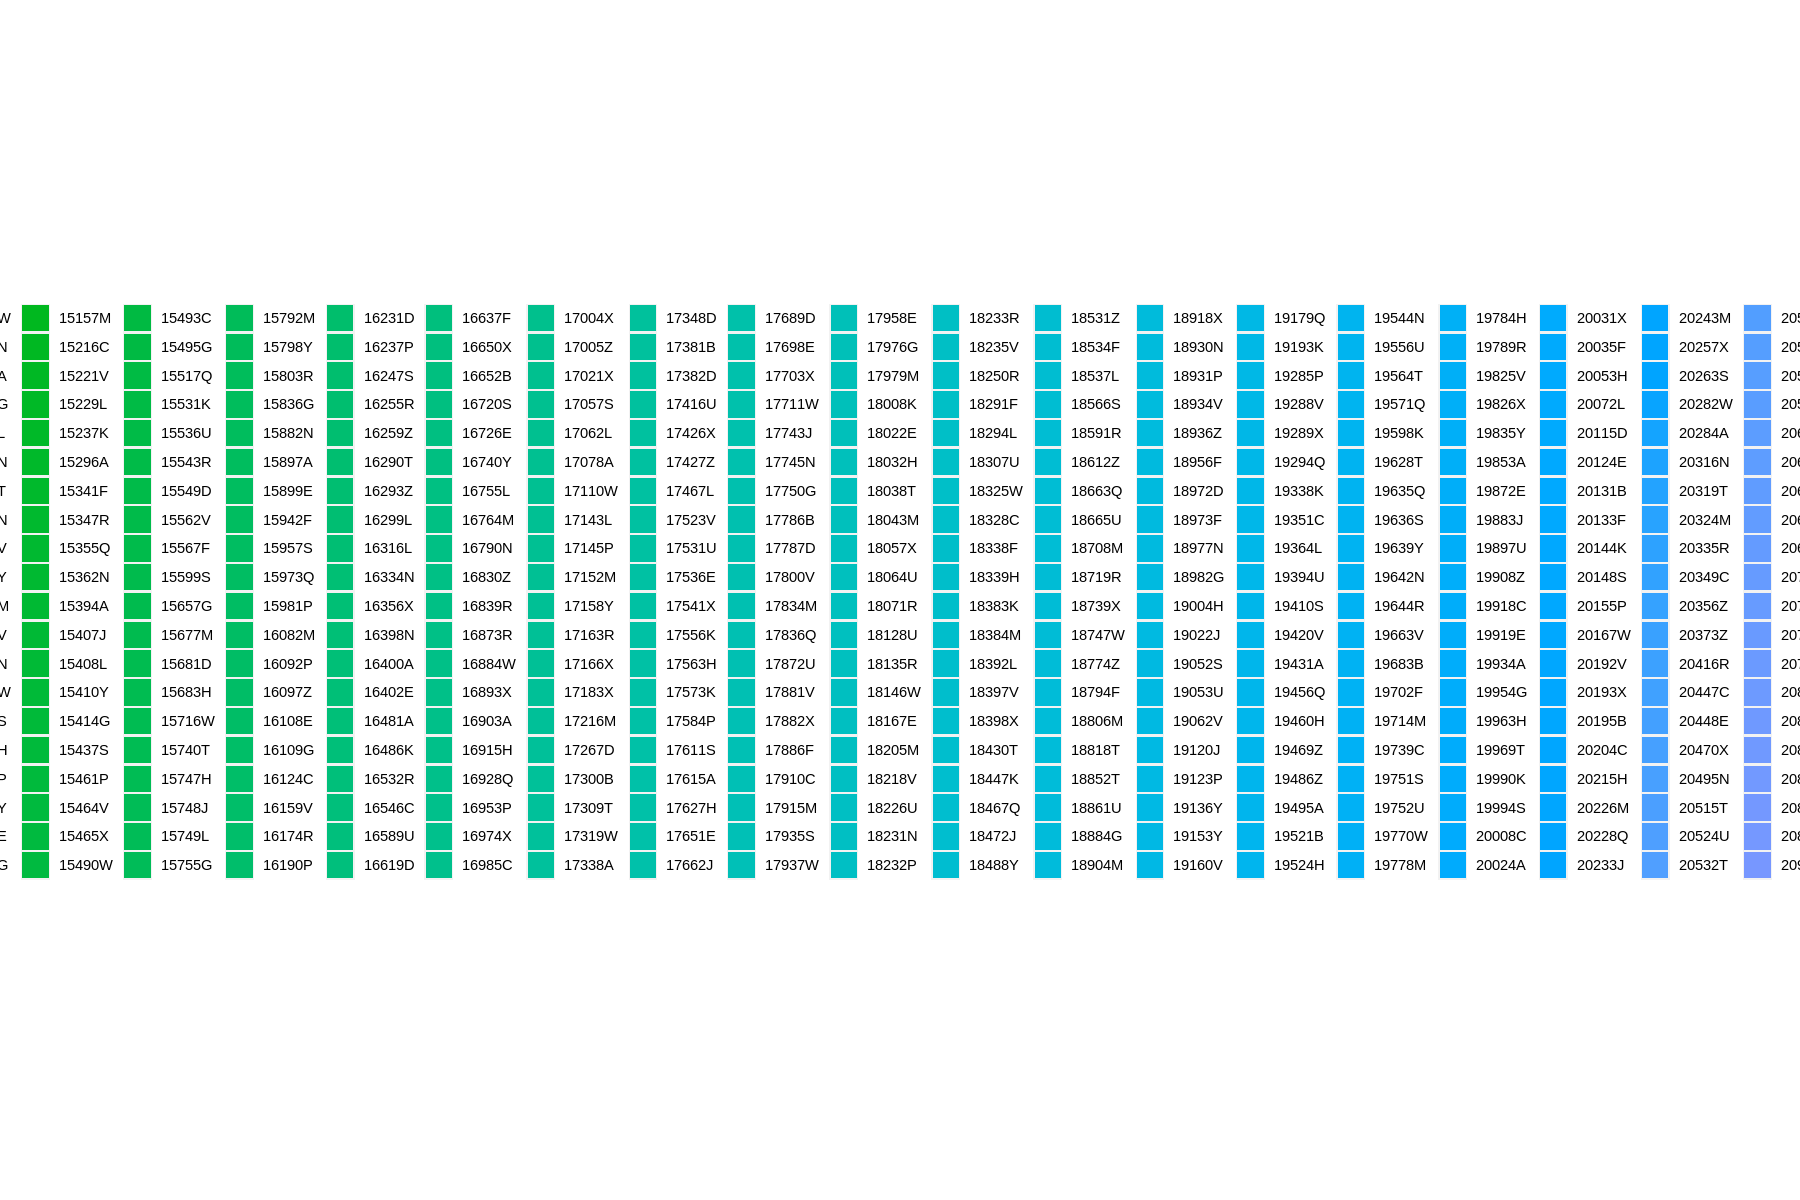

$rect
$rect$w
[1] 0.8655037

$rect$h
[1] 0.003179347

$rect$left
[1] 0.92

$rect$top
[1] 0.6914535


$text
$text$x
[1] 1.215541 1.215541

$text$y
[1] 0.6903937 0.6893339




`geom_smooth()` using formula = 'y ~ x'


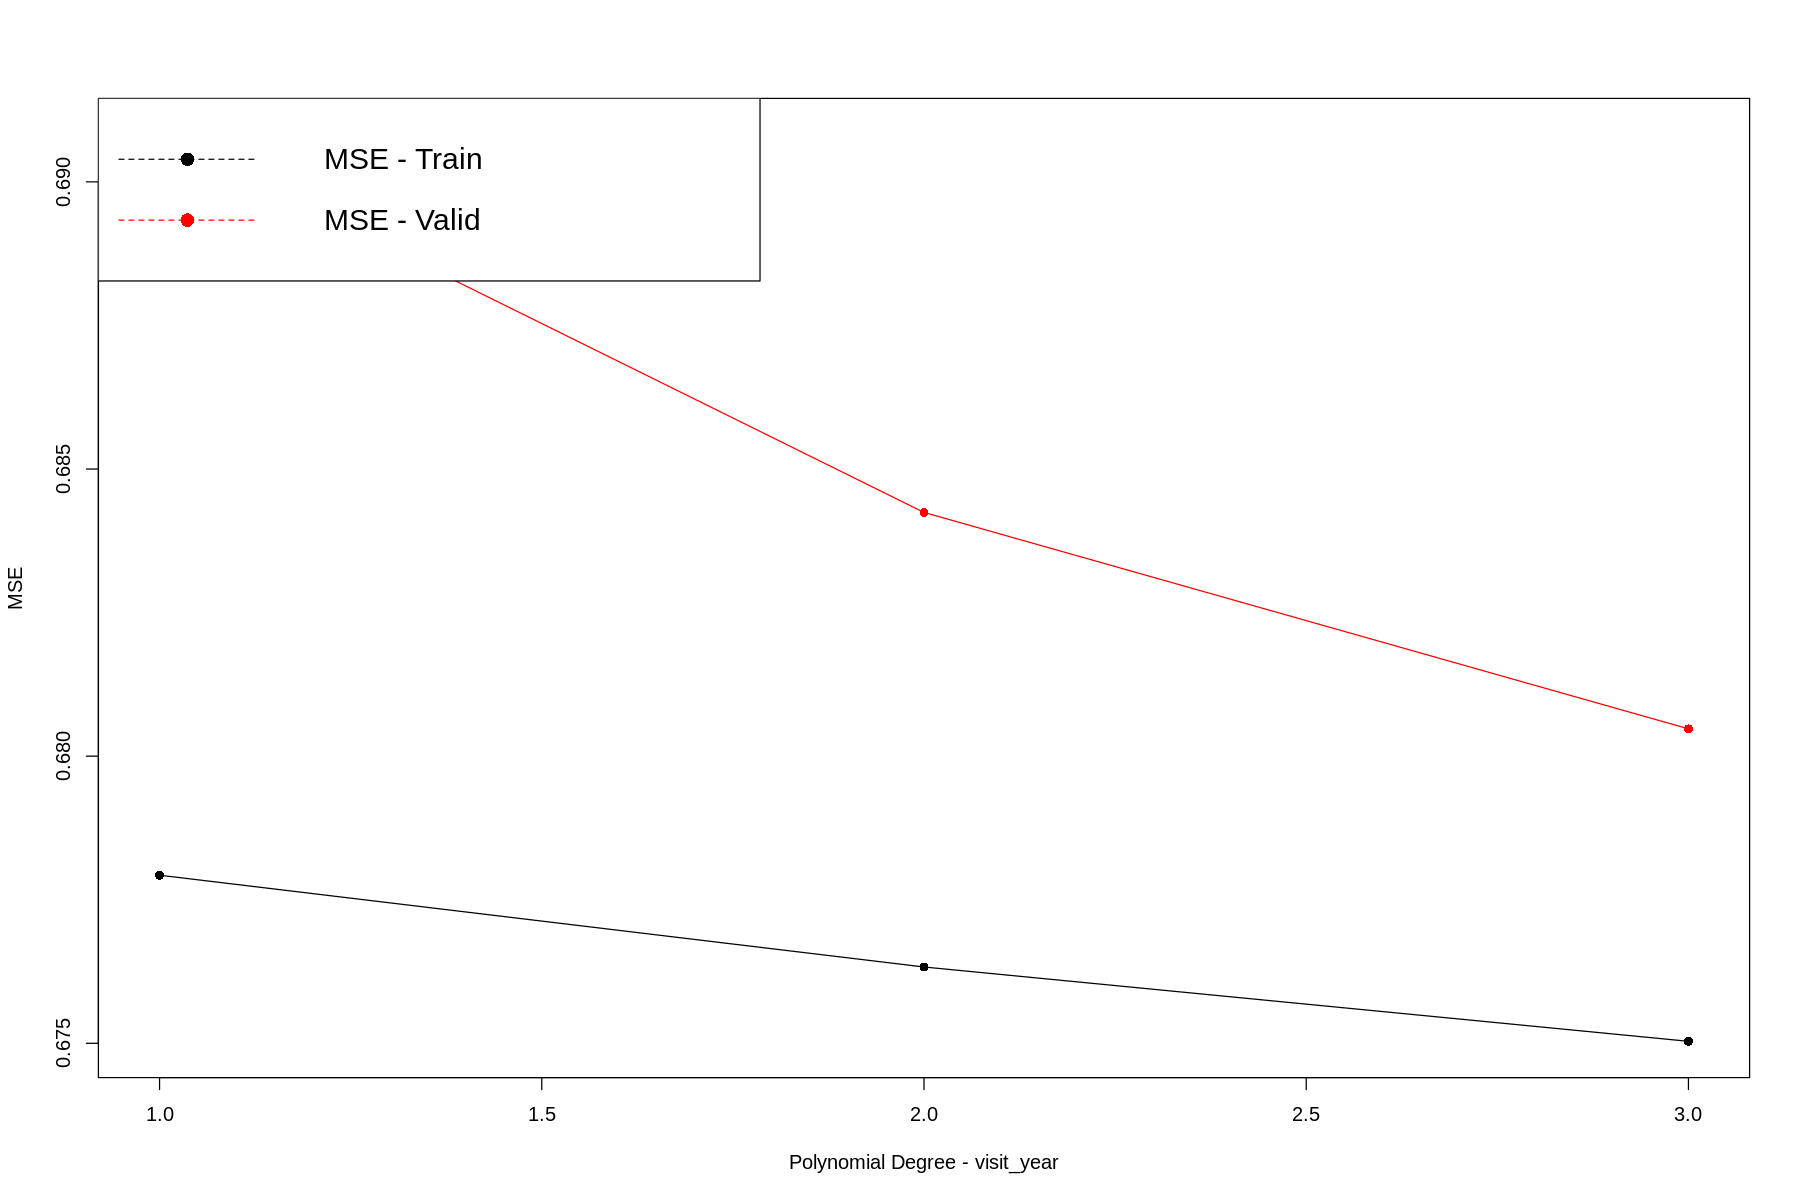

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


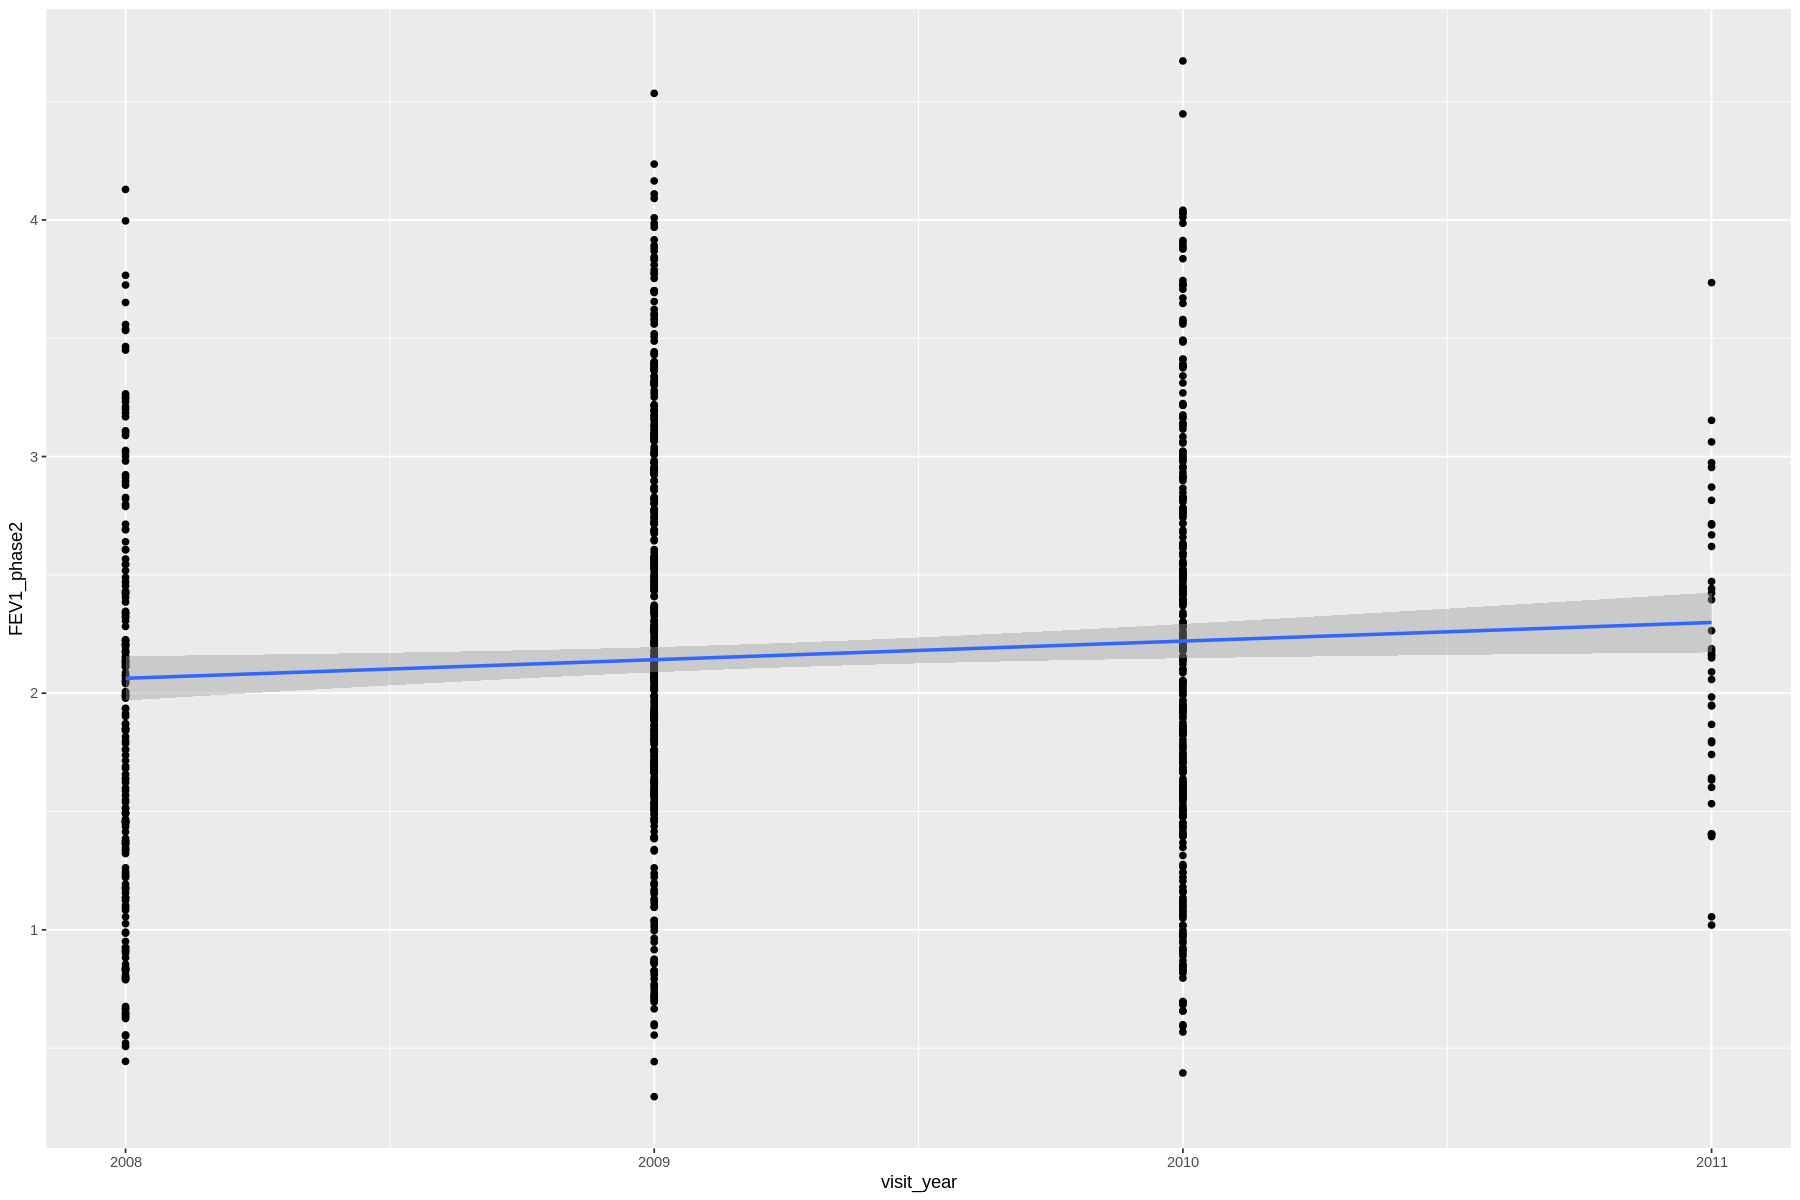

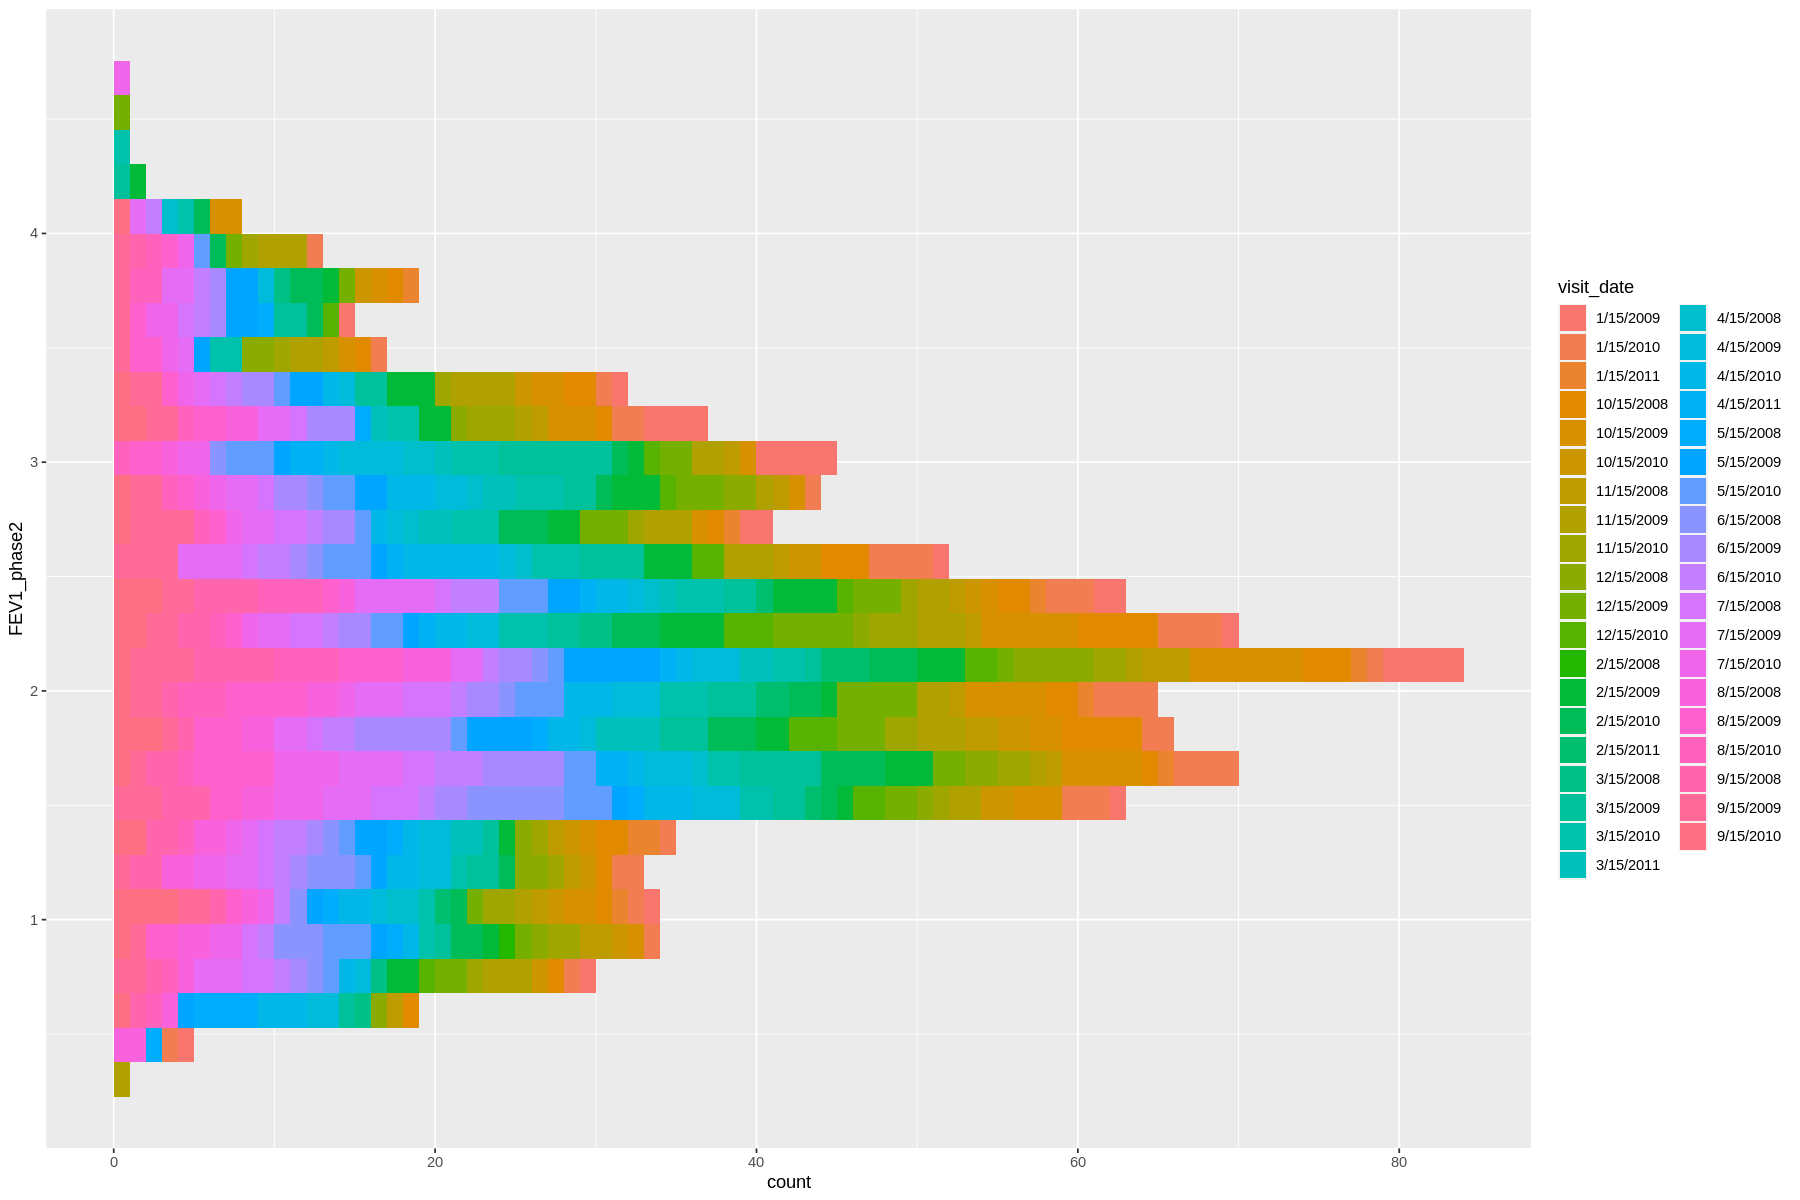

$rect
$rect$w
[1] 0.8655037

$rect$h
[1] 0.00569706

$rect$left
[1] 0.92

$rect$top
[1] 0.6387042


$text
$text$x
[1] 1.215541 1.215541

$text$y
[1] 0.6368052 0.6349062




`geom_smooth()` using formula = 'y ~ x'


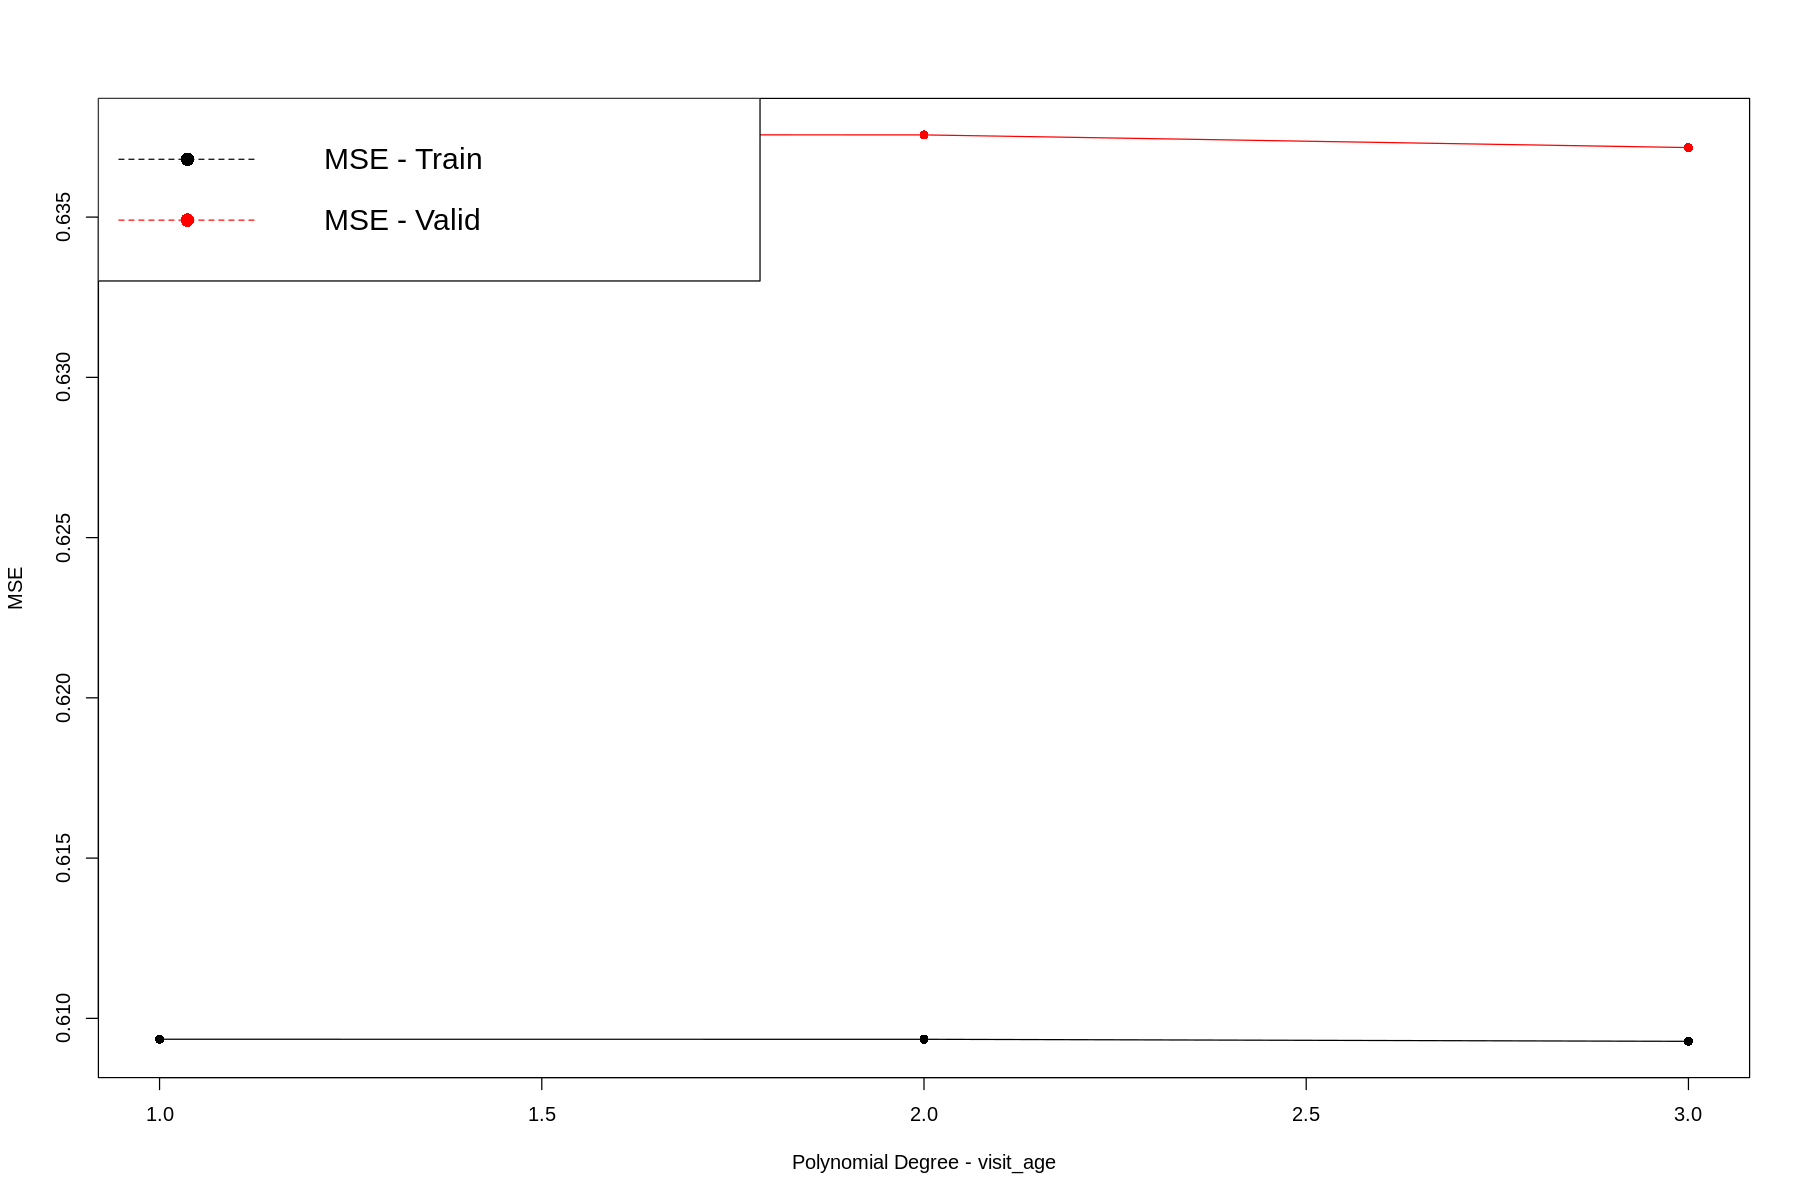

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


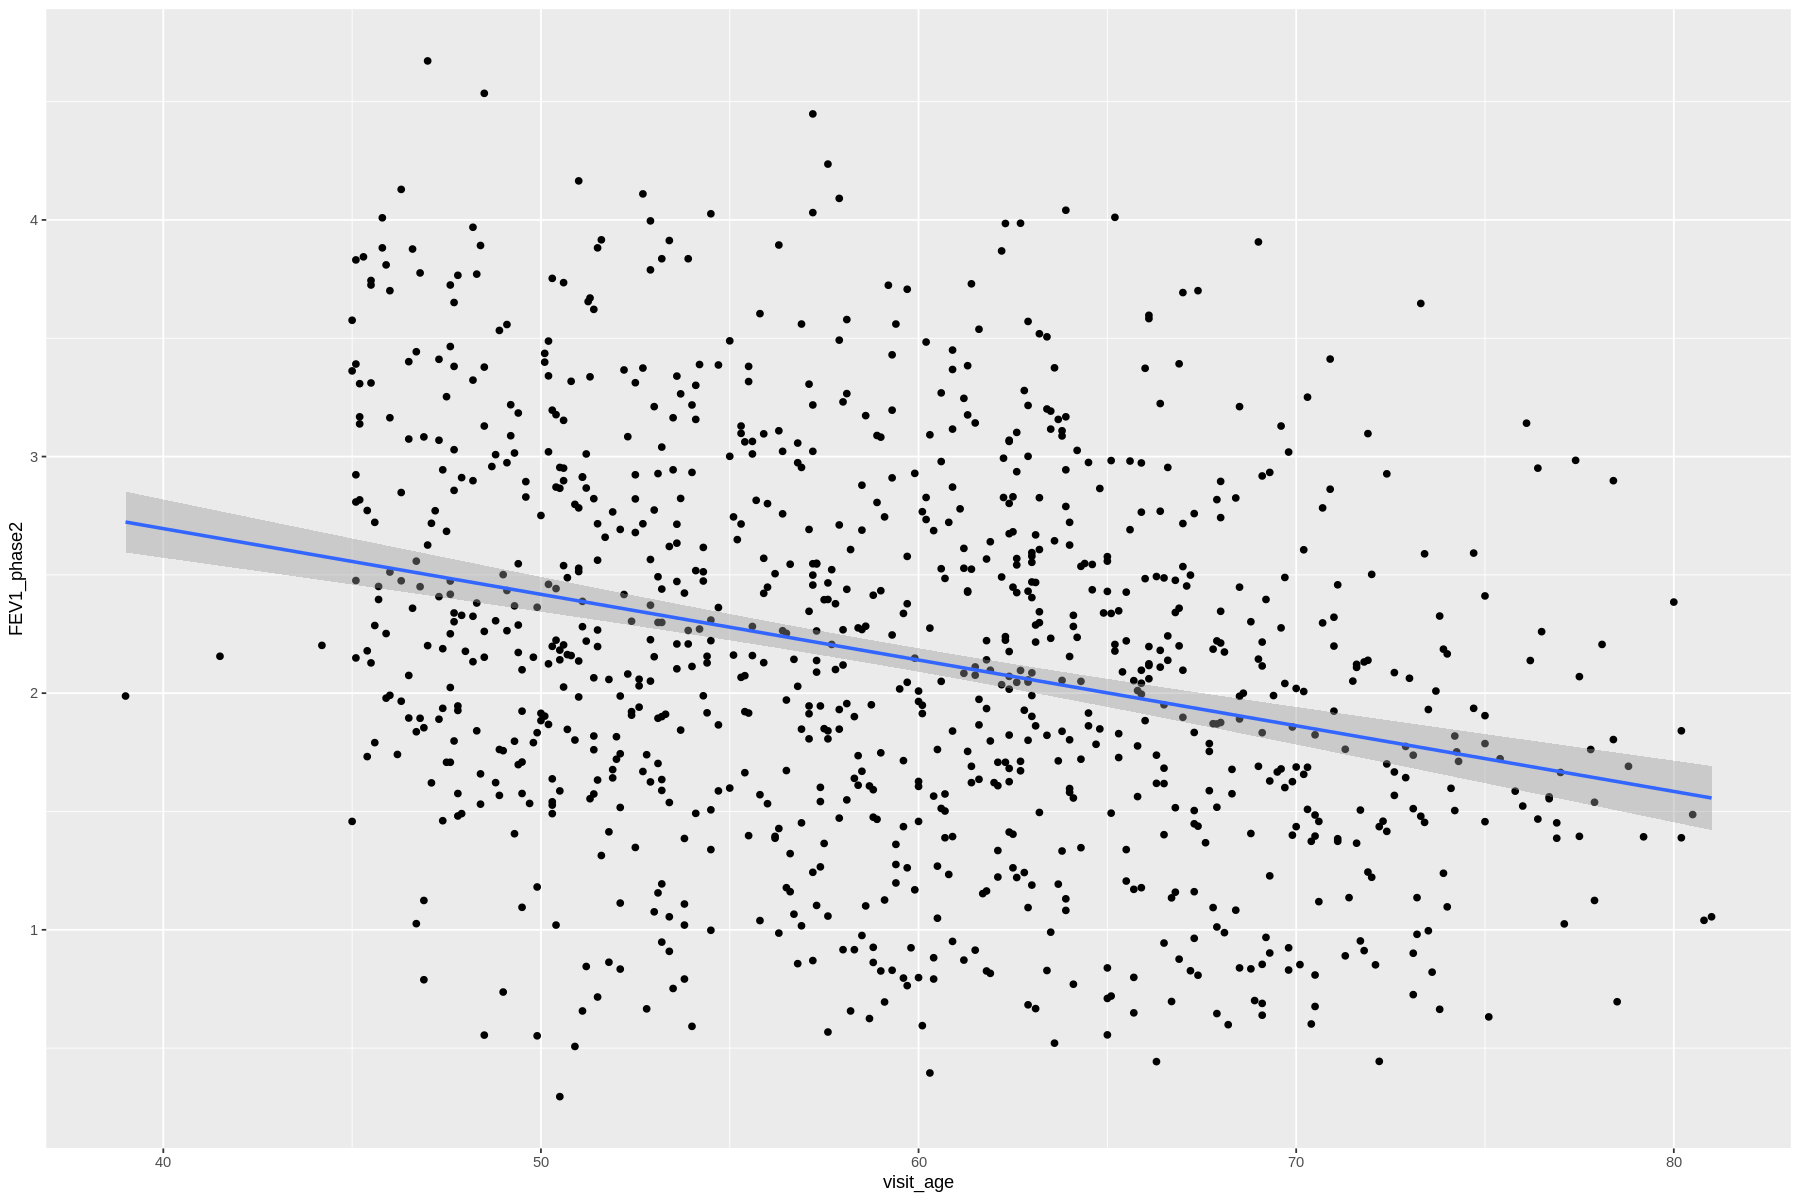

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


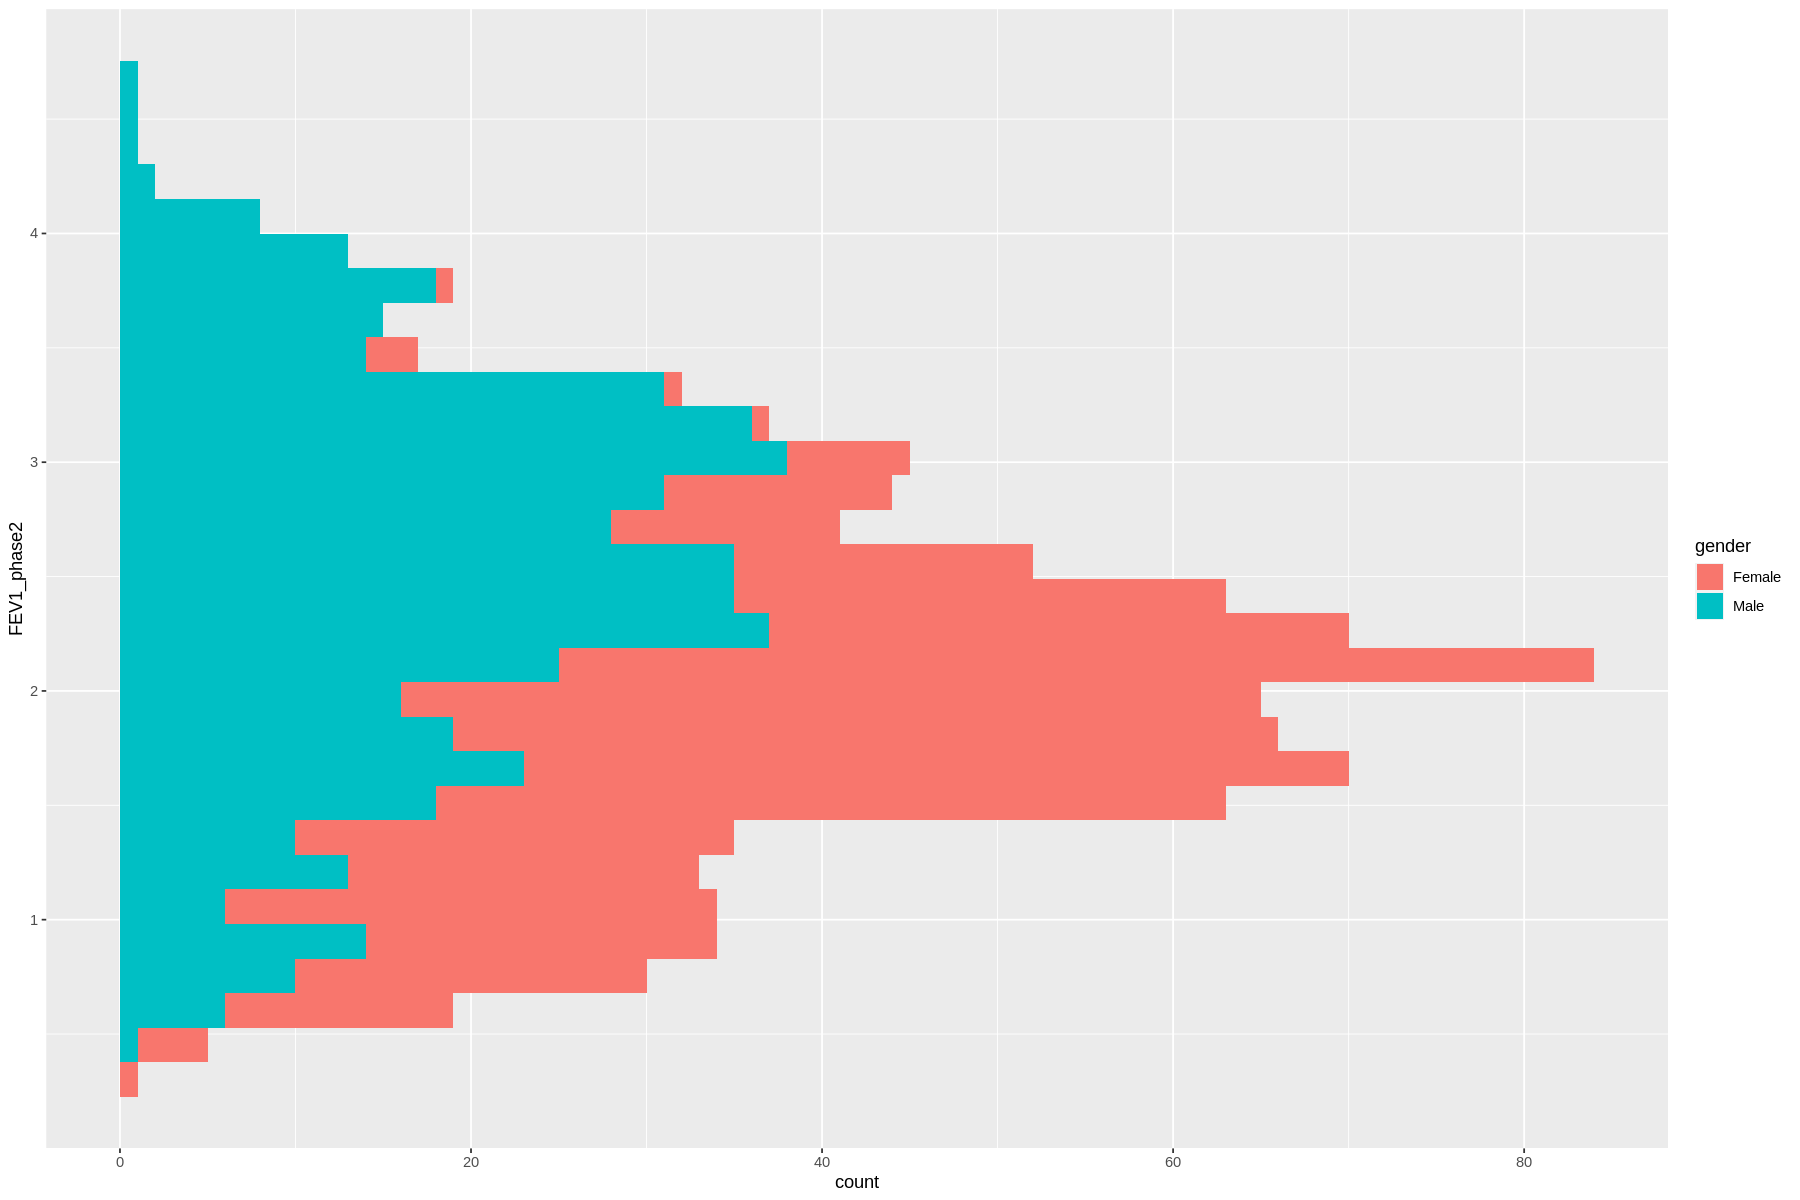

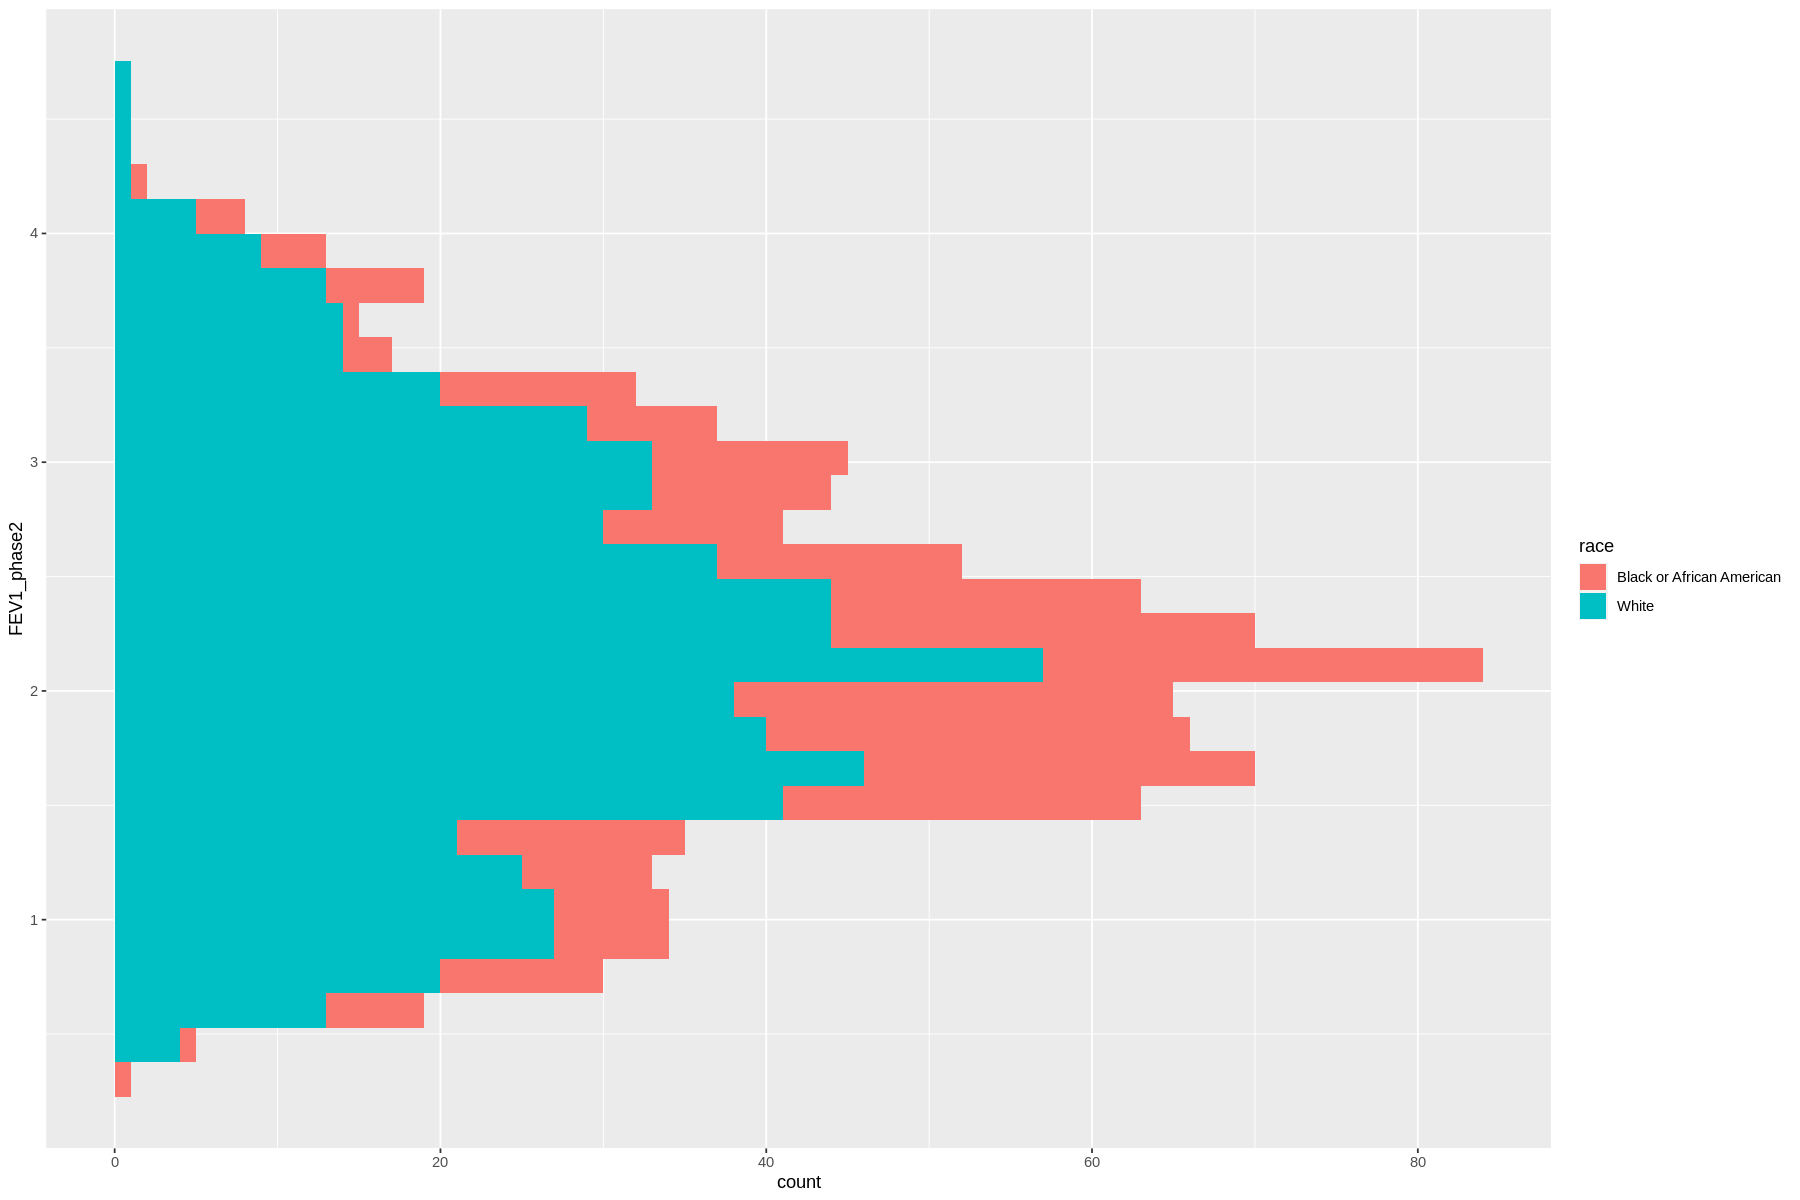

$rect
$rect$w
[1] 0.8655037

$rect$h
[1] 0.004034419

$rect$left
[1] 0.92

$rect$top
[1] 0.5390825


$text
$text$x
[1] 1.215541 1.215541

$text$y
[1] 0.5377377 0.5363929




`geom_smooth()` using formula = 'y ~ x'


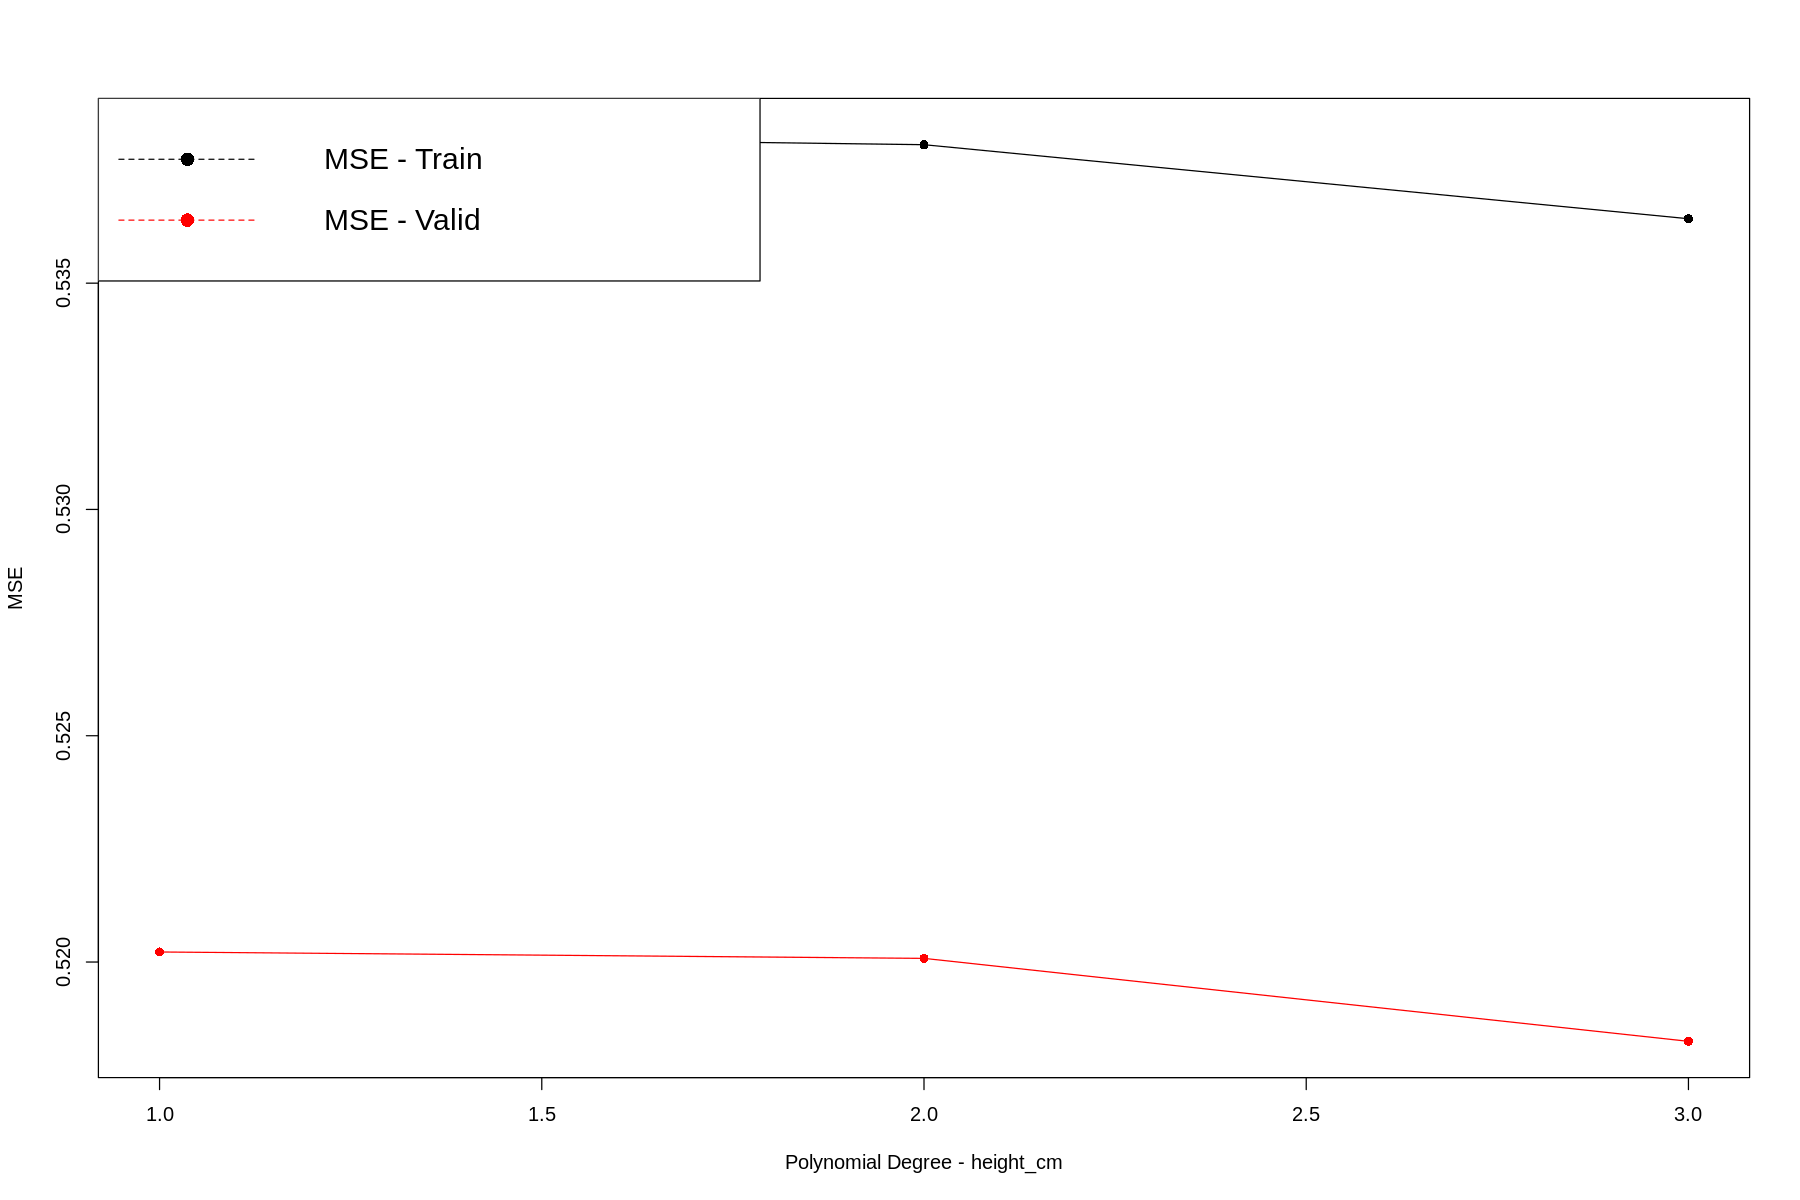

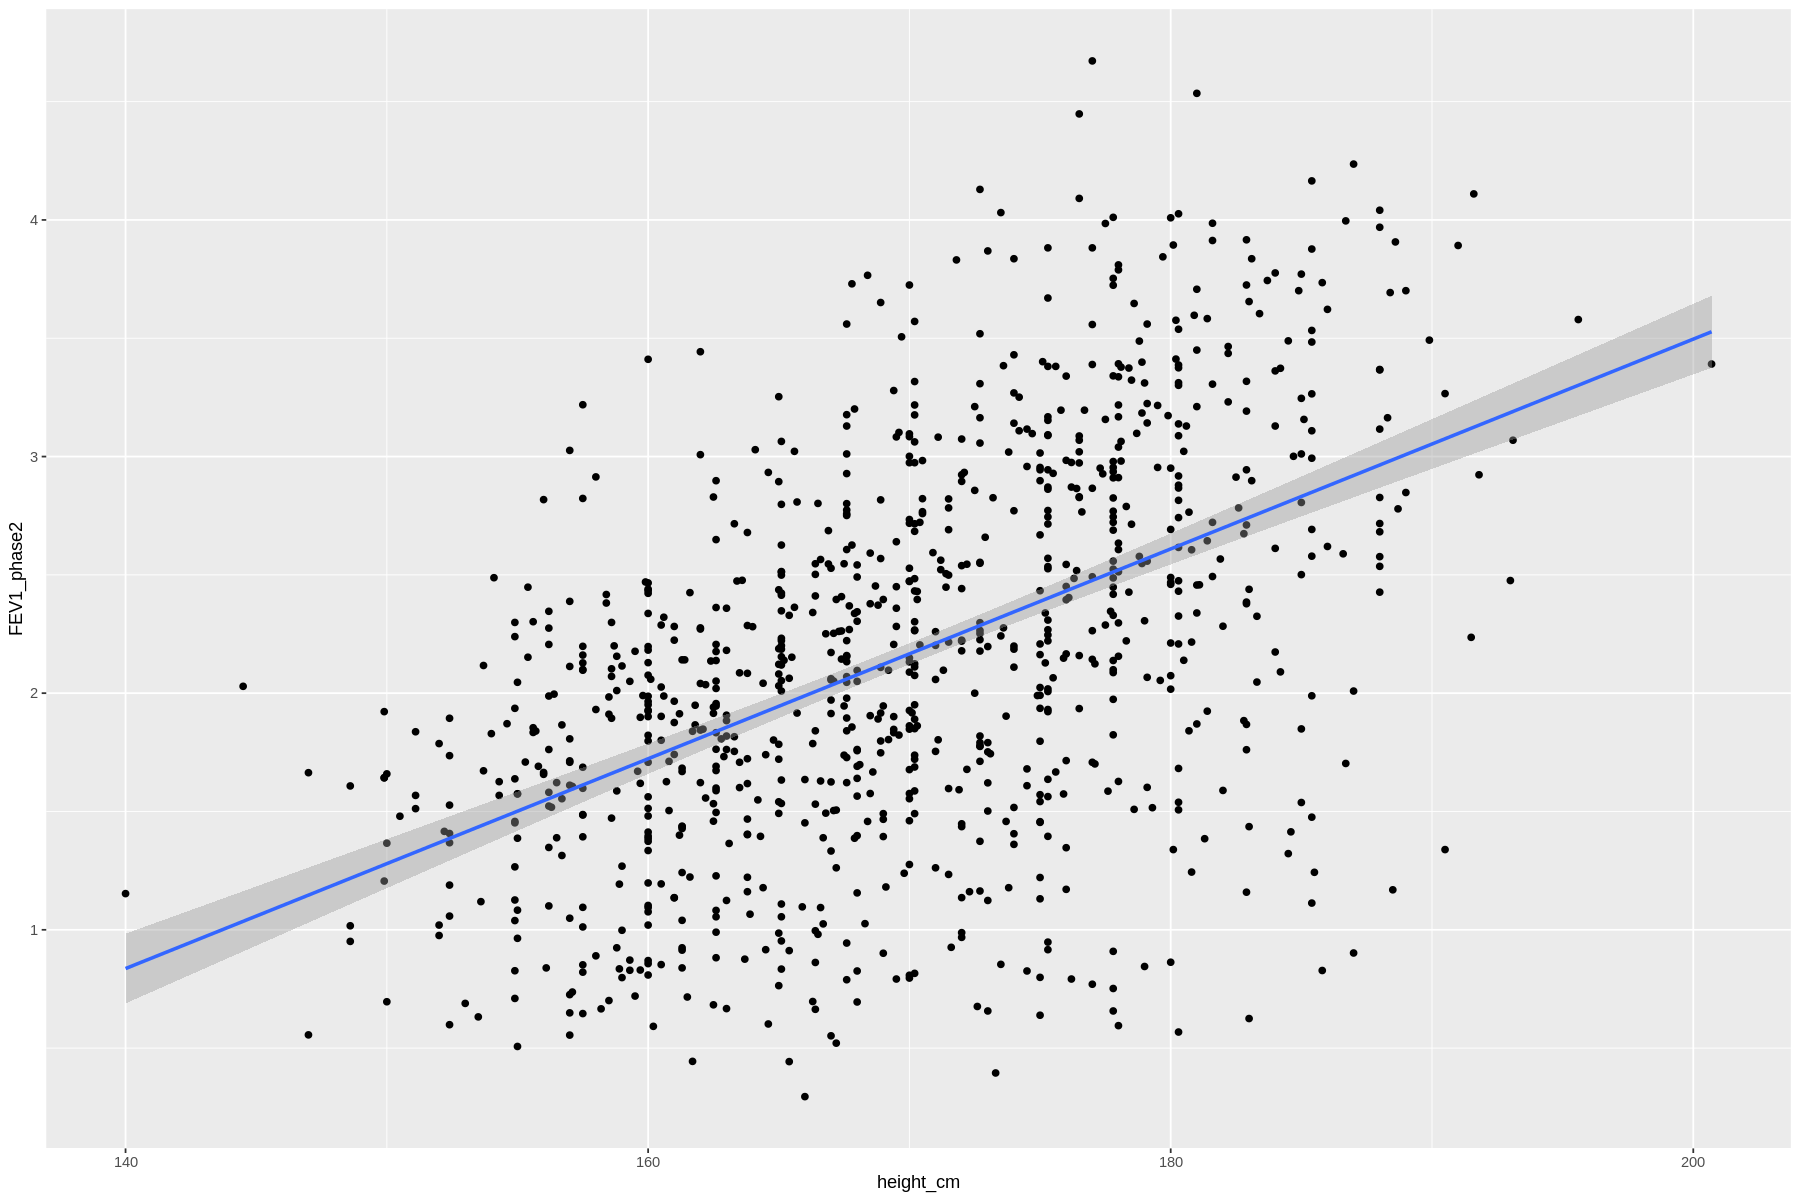

$rect
$rect$w
[1] 0.8655037

$rect$h
[1] 0.004360592

$rect$left
[1] 0.92

$rect$top
[1] 0.6587588


$text
$text$x
[1] 1.215541 1.215541

$text$y
[1] 0.6573053 0.6558518




`geom_smooth()` using formula = 'y ~ x'


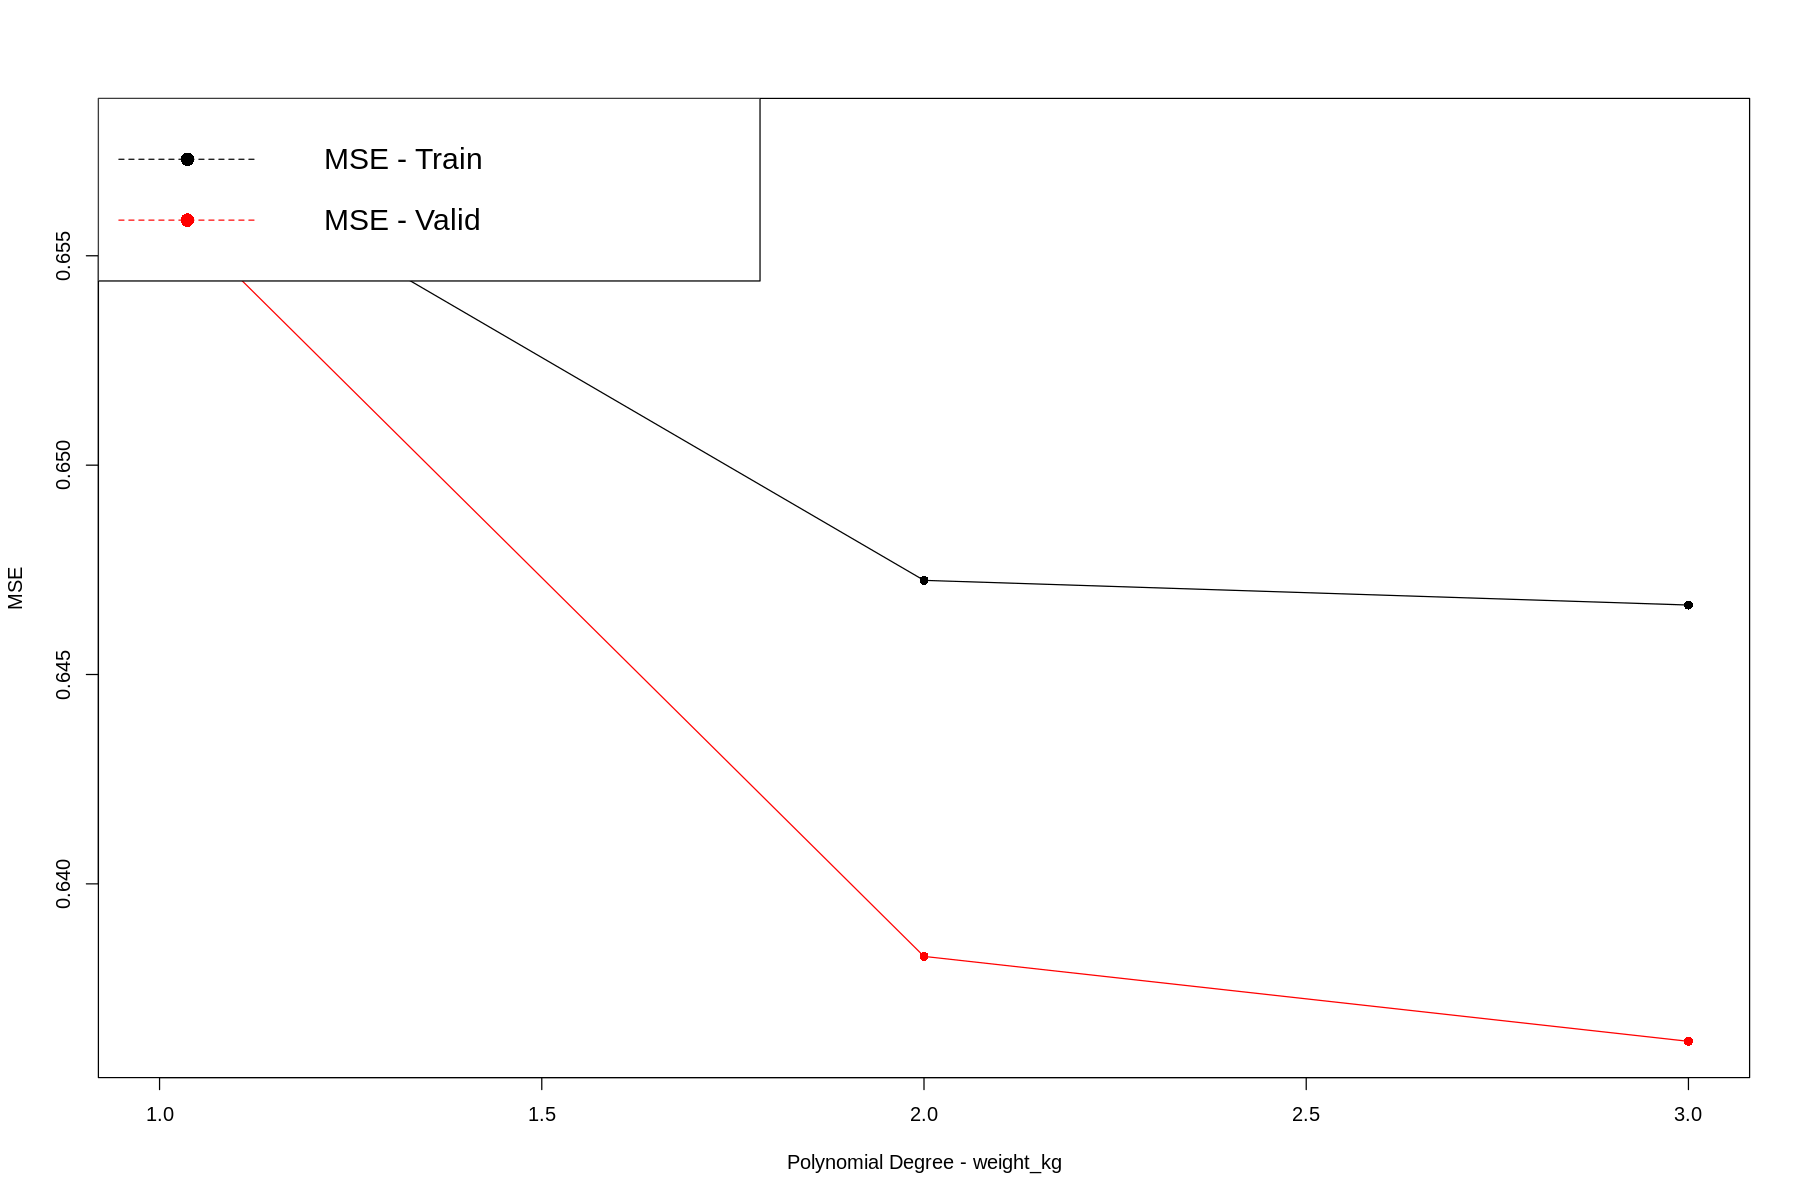

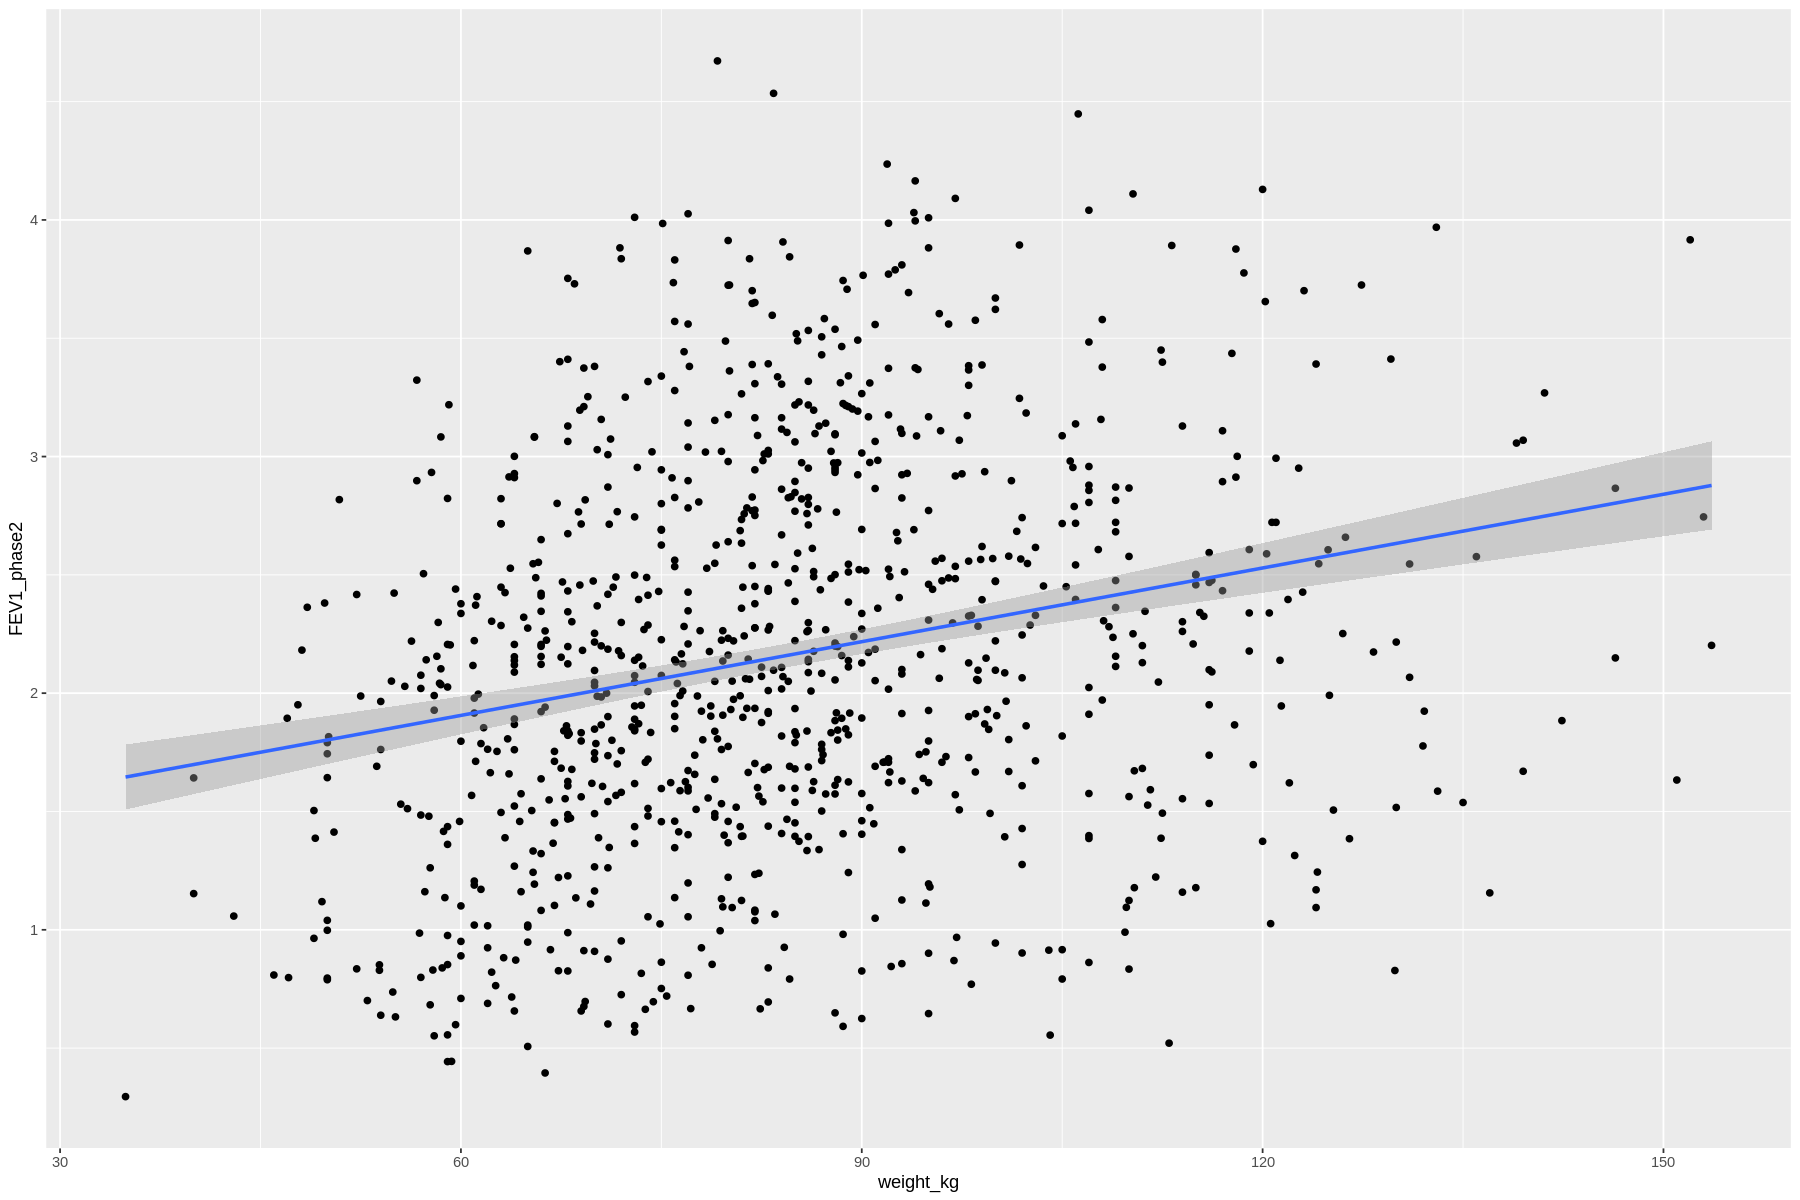

$rect
$rect$w
[1] 0.8655037

$rect$h
[1] 0.003558268

$rect$left
[1] 0.92

$rect$top
[1] 0.6961613


$text
$text$x
[1] 1.215541 1.215541

$text$y
[1] 0.6949752 0.6937891




`geom_smooth()` using formula = 'y ~ x'


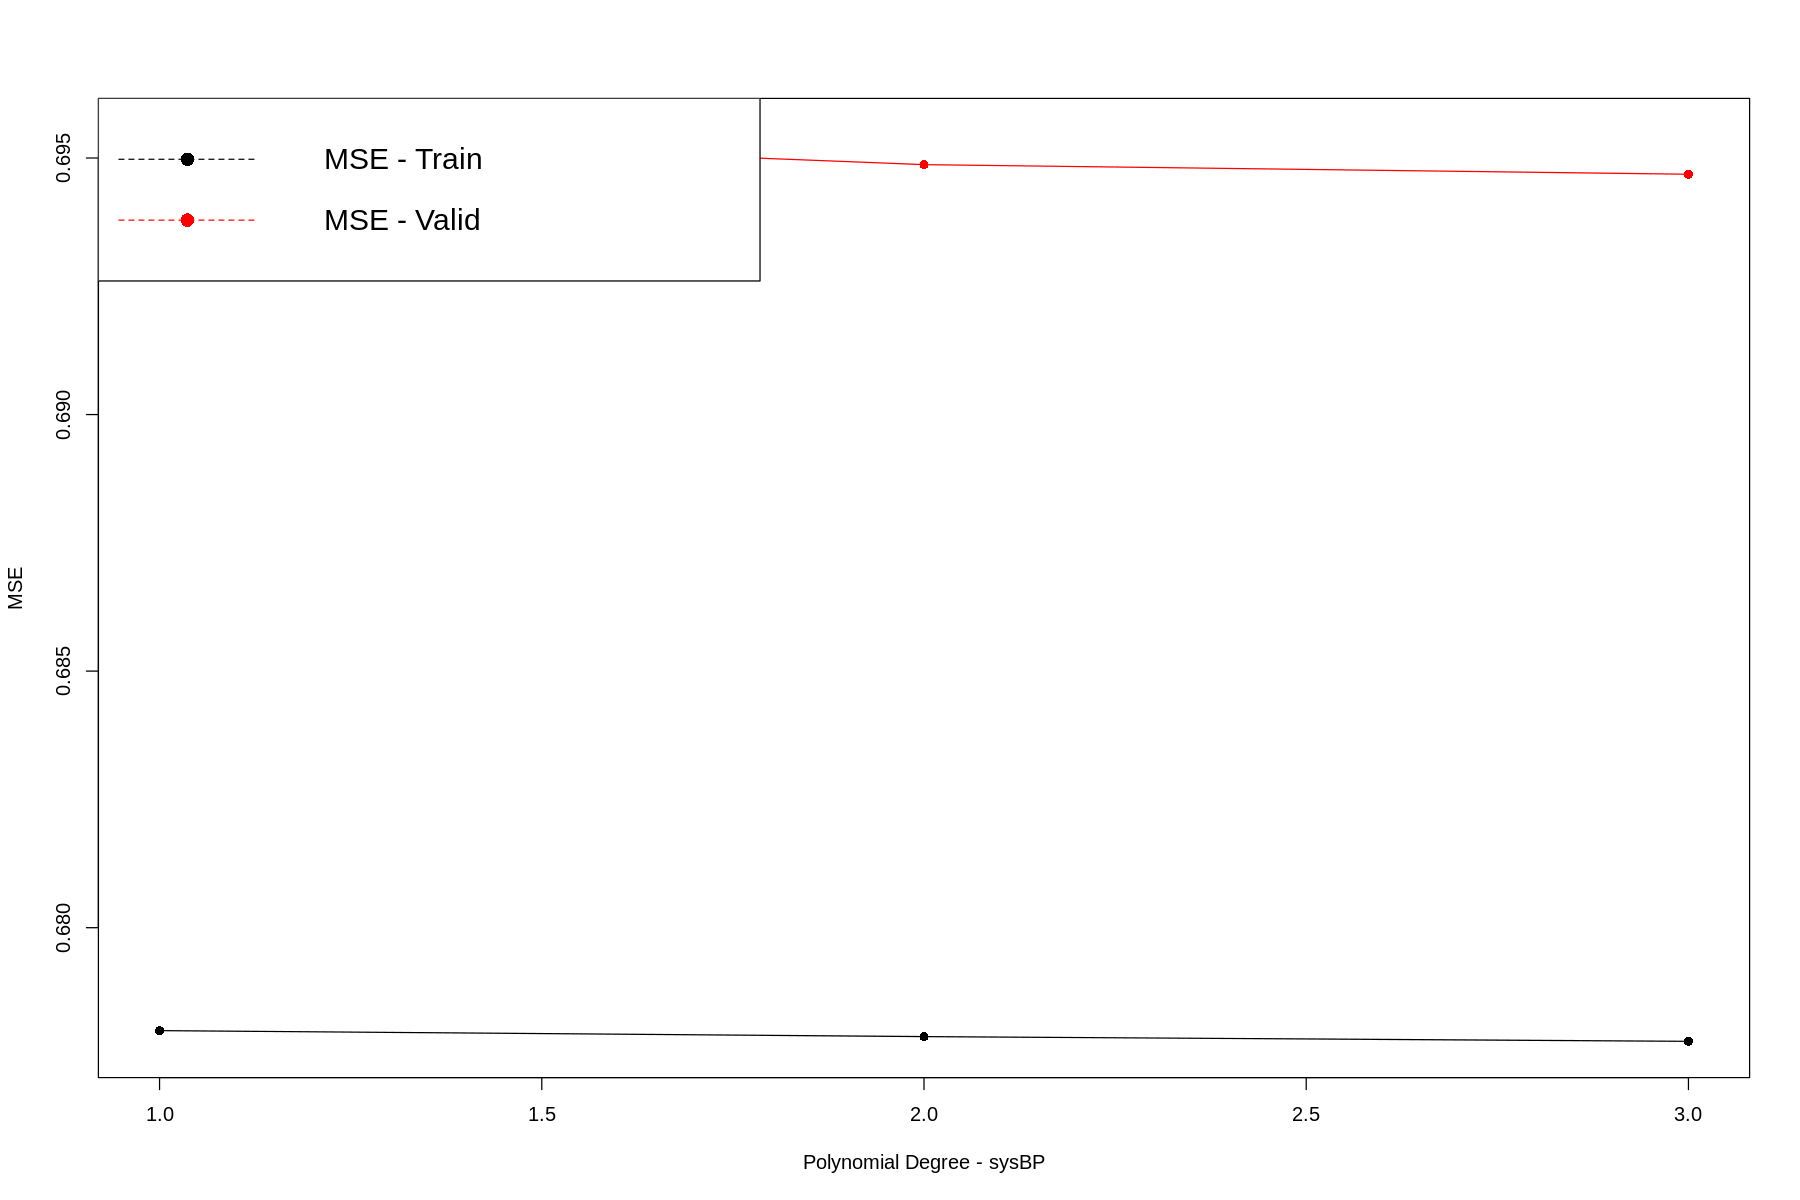

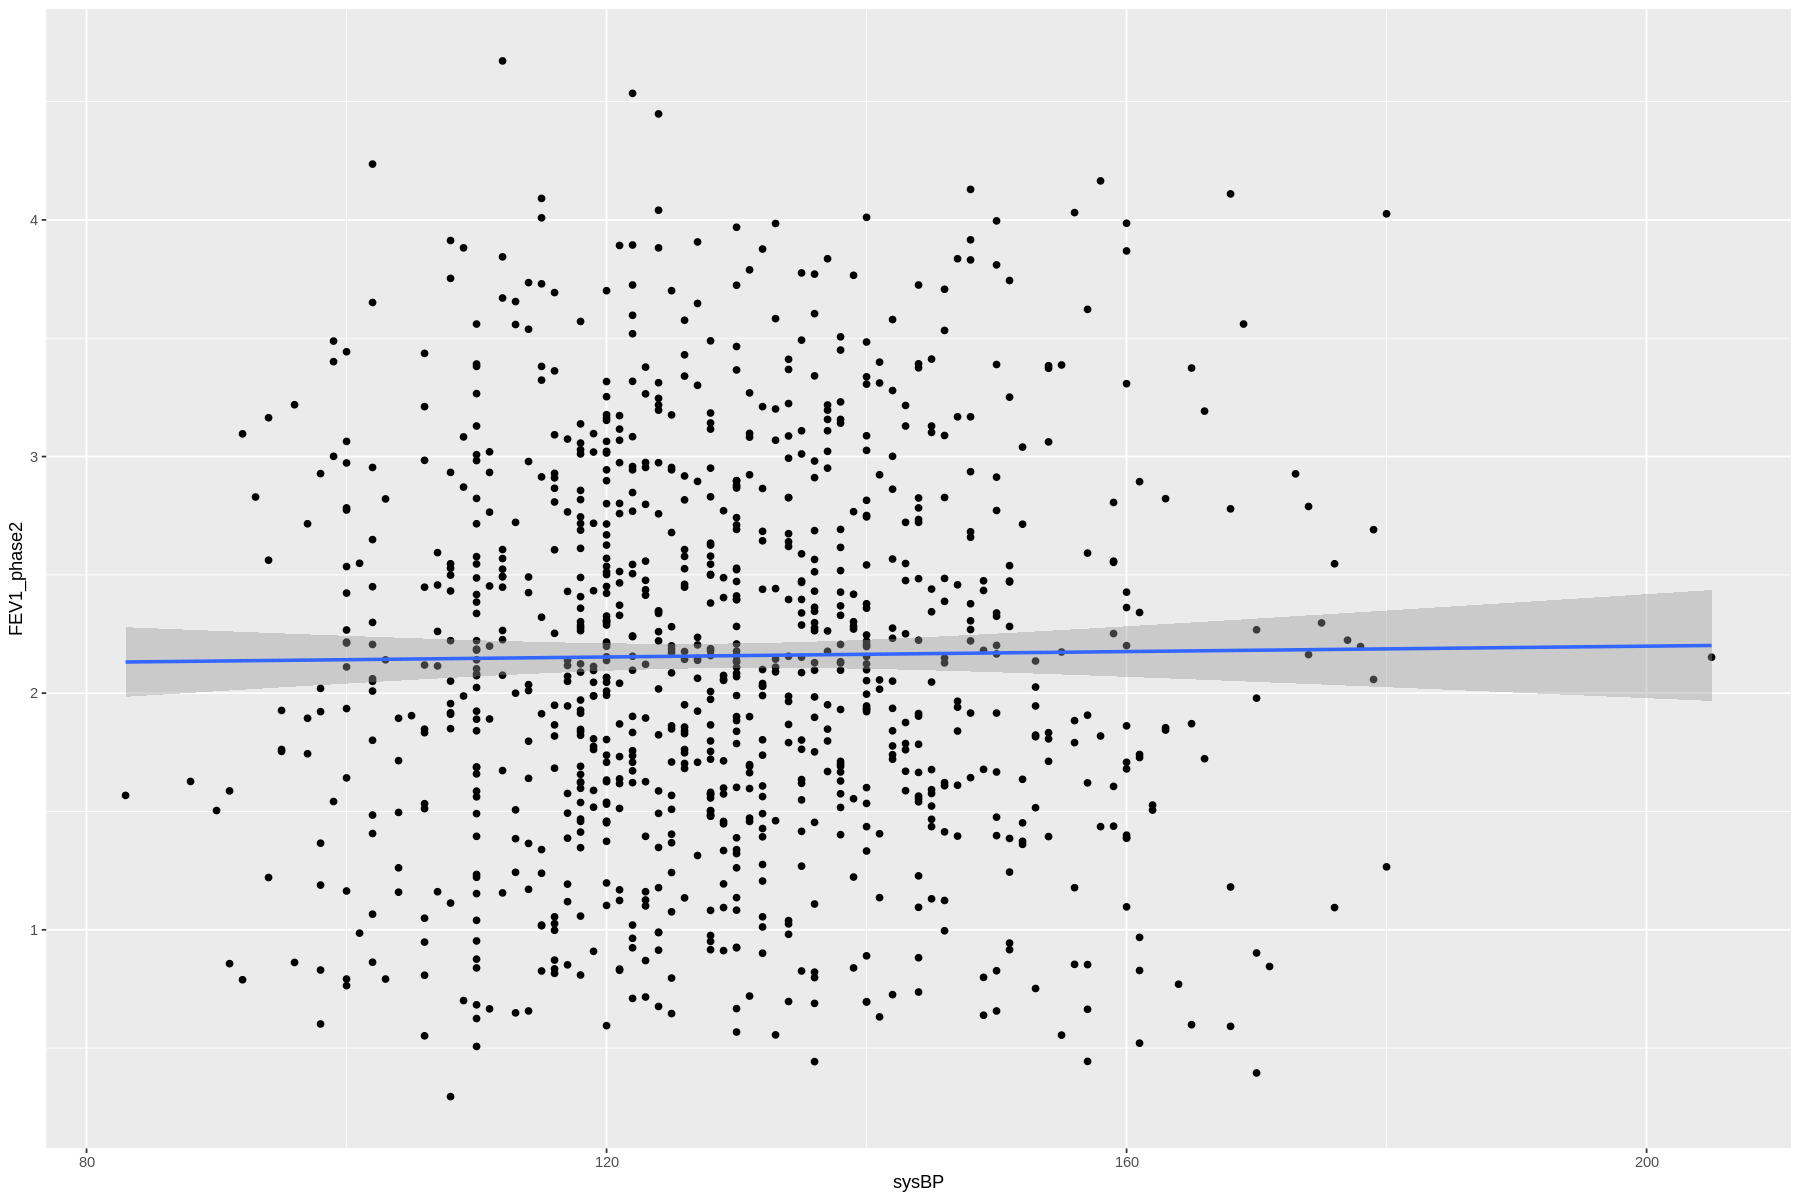

$rect
$rect$w
[1] 0.8655037

$rect$h
[1] 0.002418965

$rect$left
[1] 0.92

$rect$top
[1] 0.6836249


$text
$text$x
[1] 1.215541 1.215541

$text$y
[1] 0.6828186 0.6820122




`geom_smooth()` using formula = 'y ~ x'


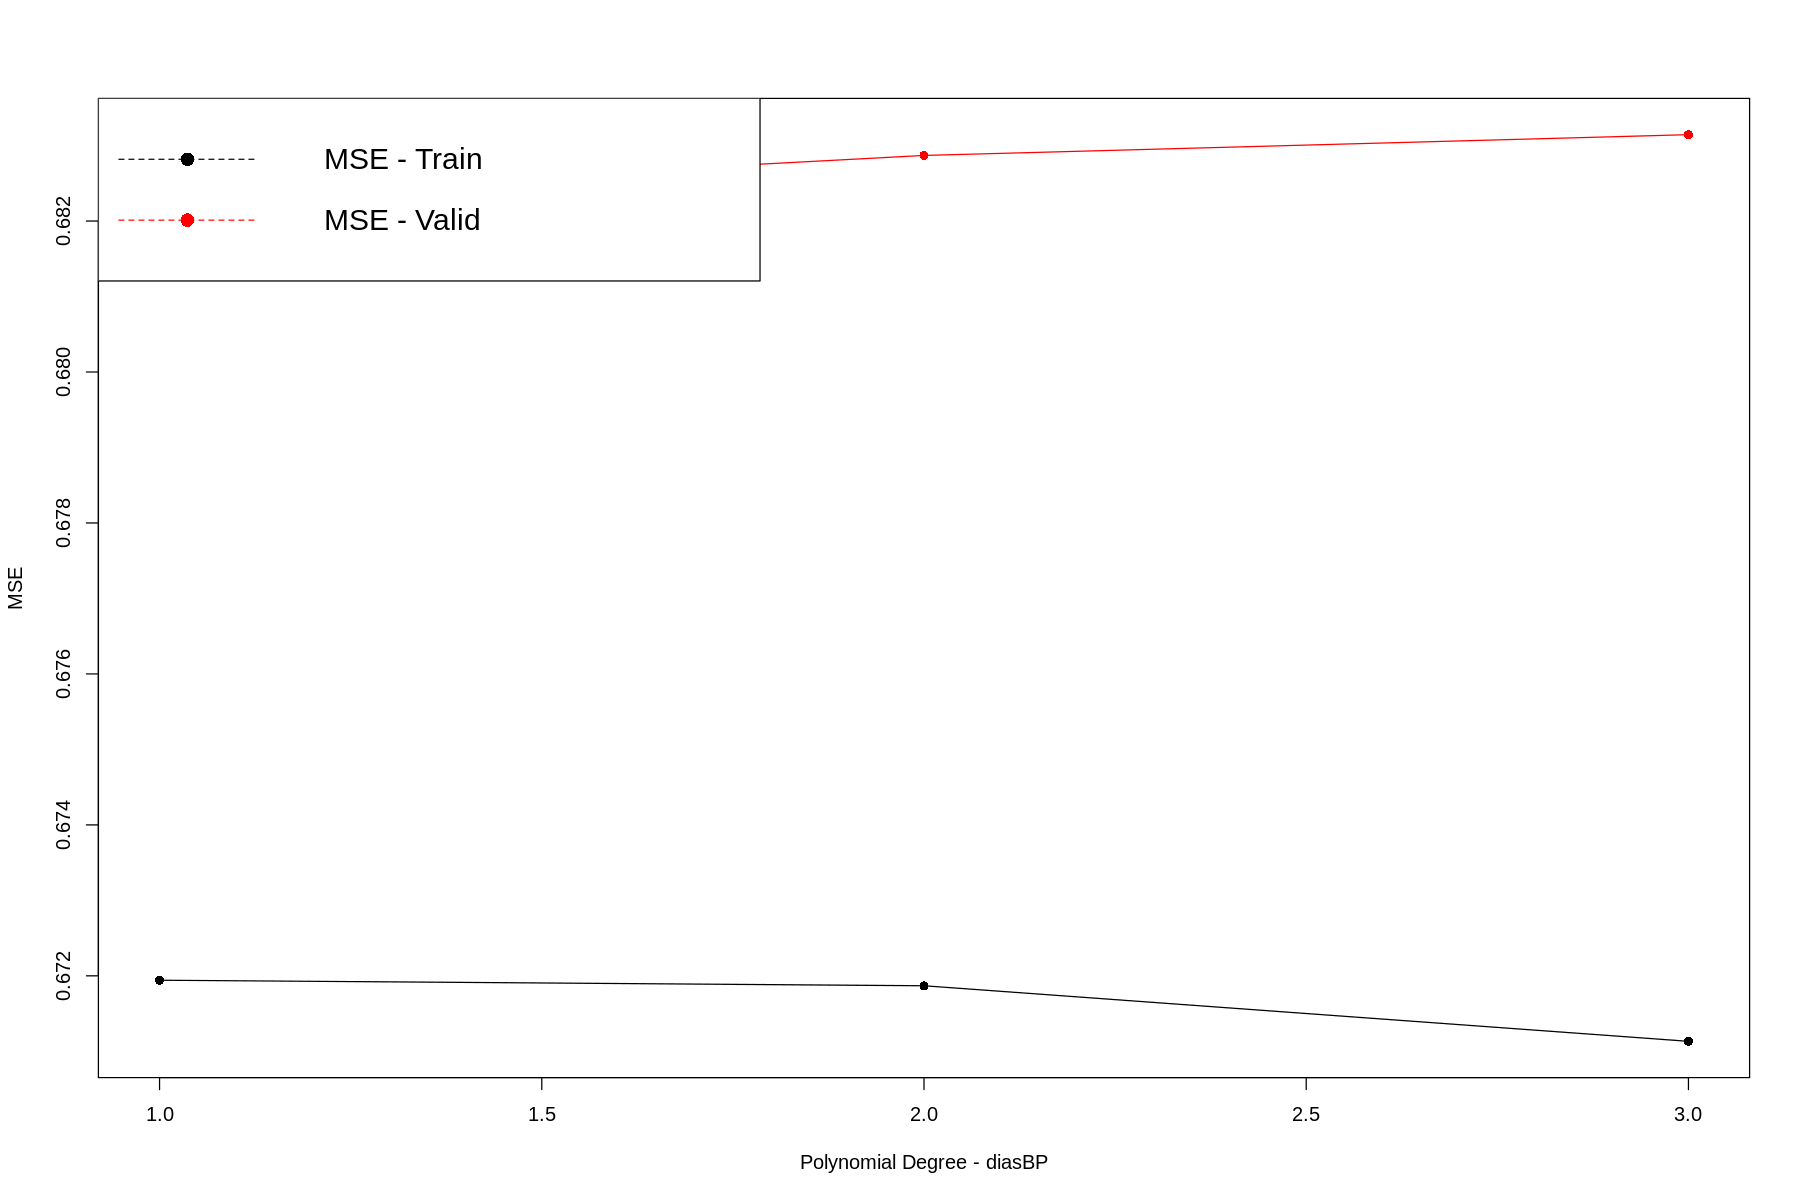

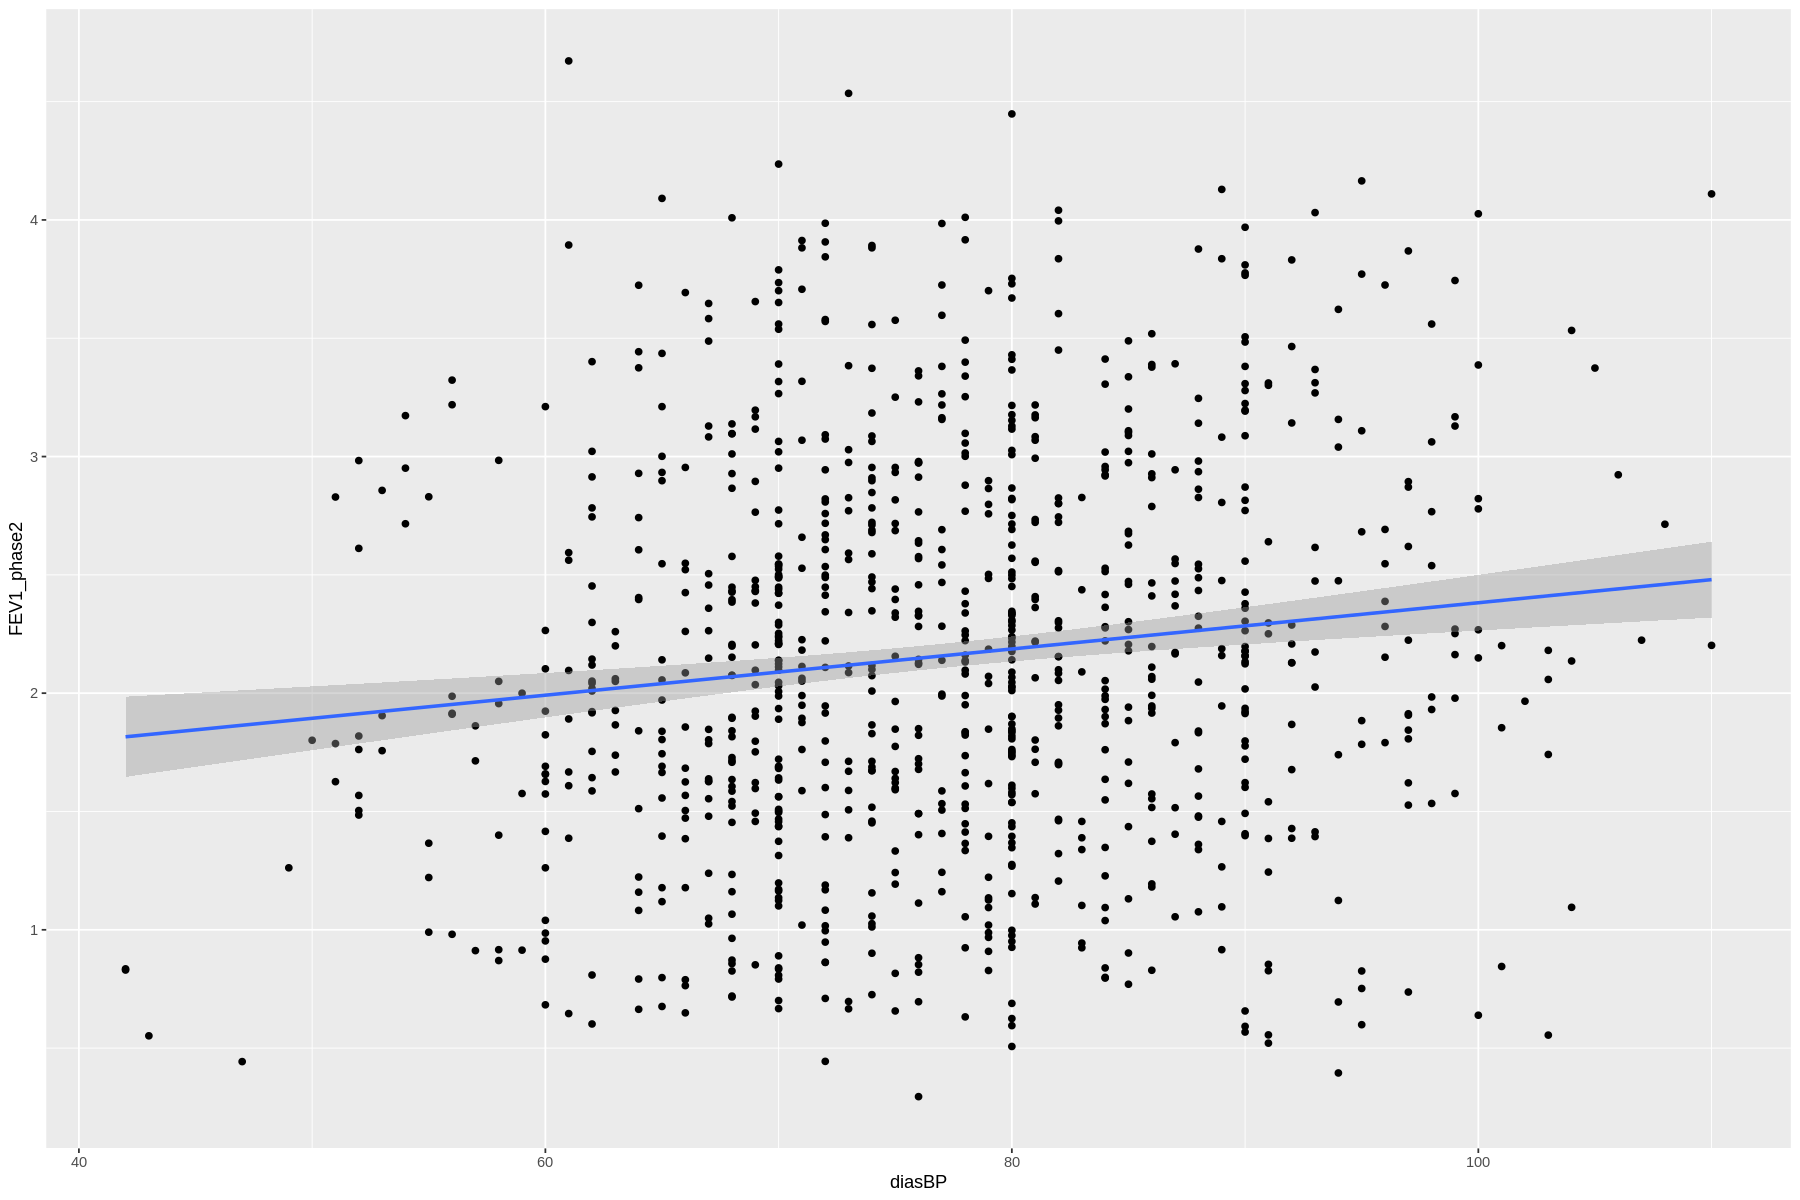

$rect
$rect$w
[1] 0.8655037

$rect$h
[1] 0.00411251

$rect$left
[1] 0.92

$rect$top
[1] 0.6851735


$text
$text$x
[1] 1.215541 1.215541

$text$y
[1] 0.6838027 0.6824319




`geom_smooth()` using formula = 'y ~ x'


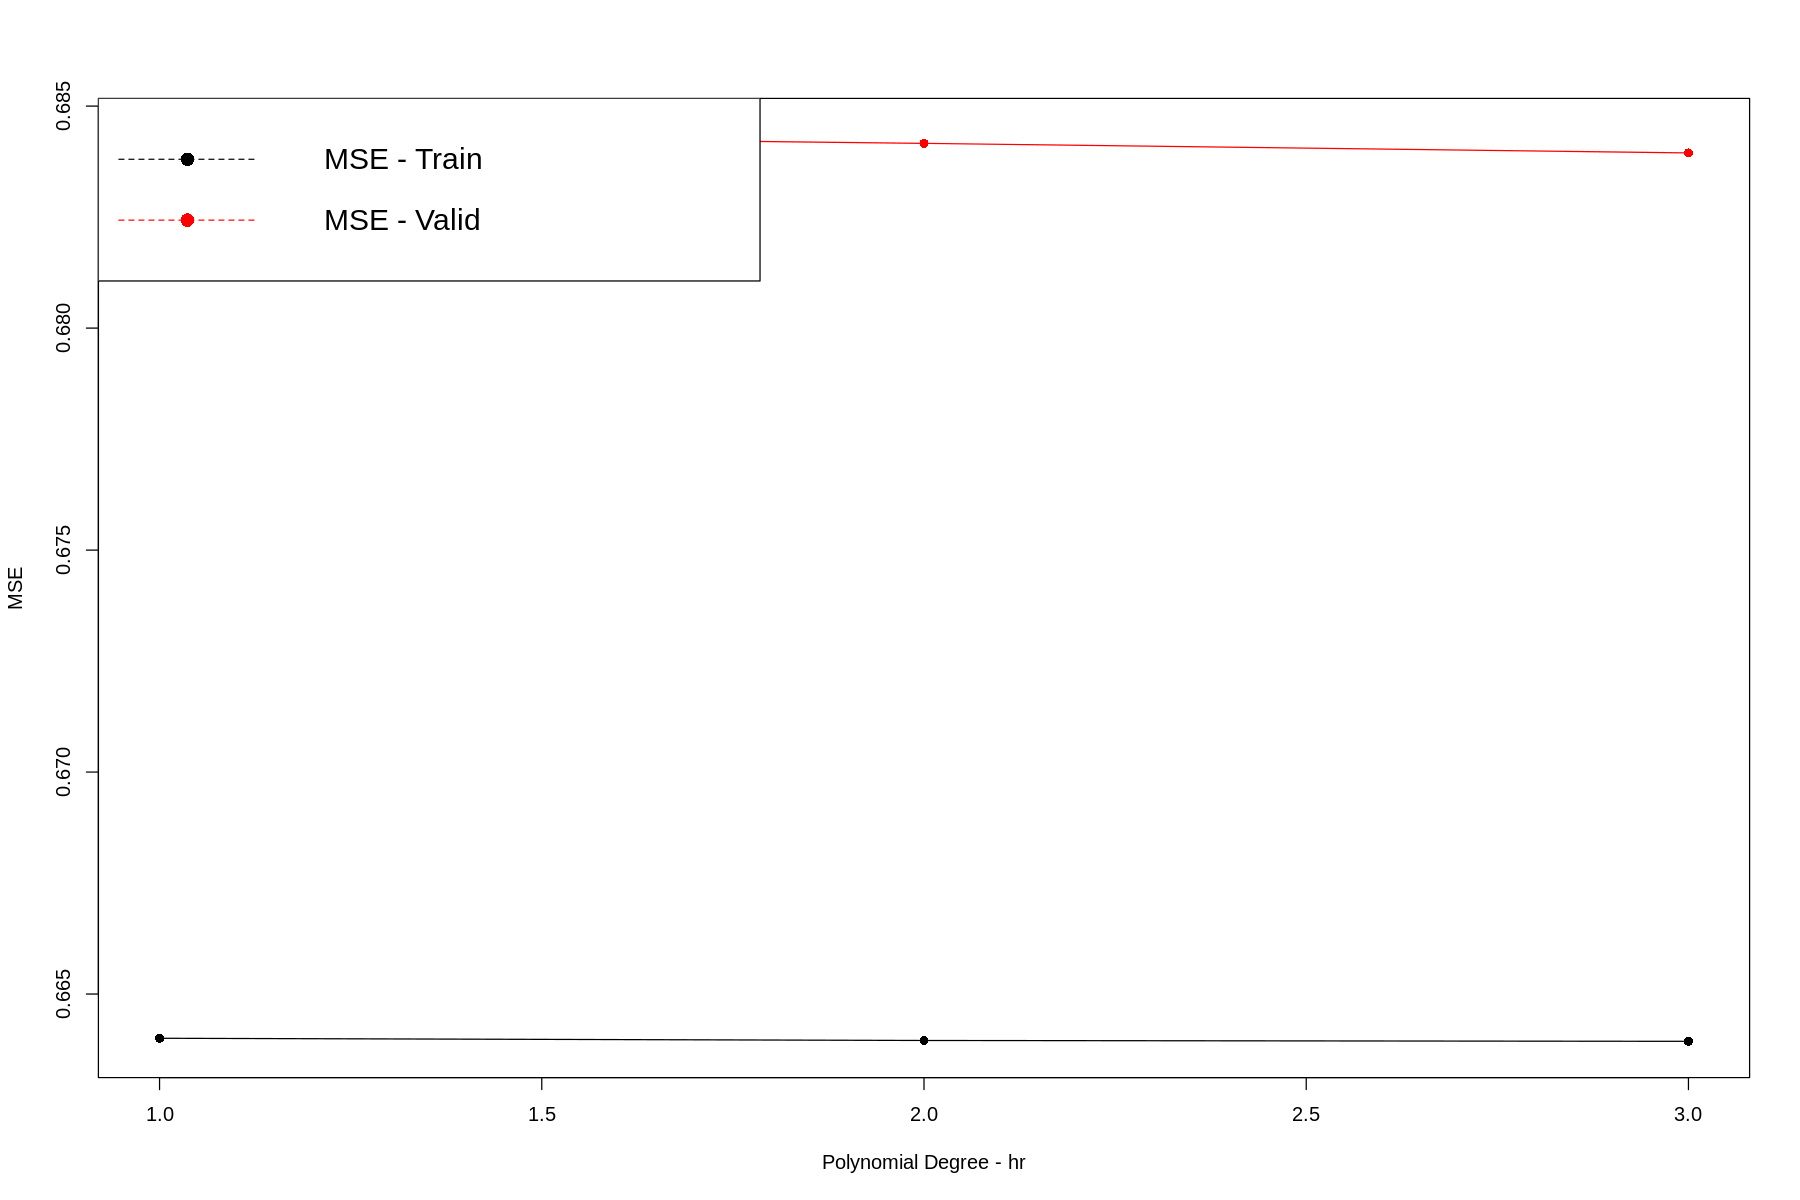

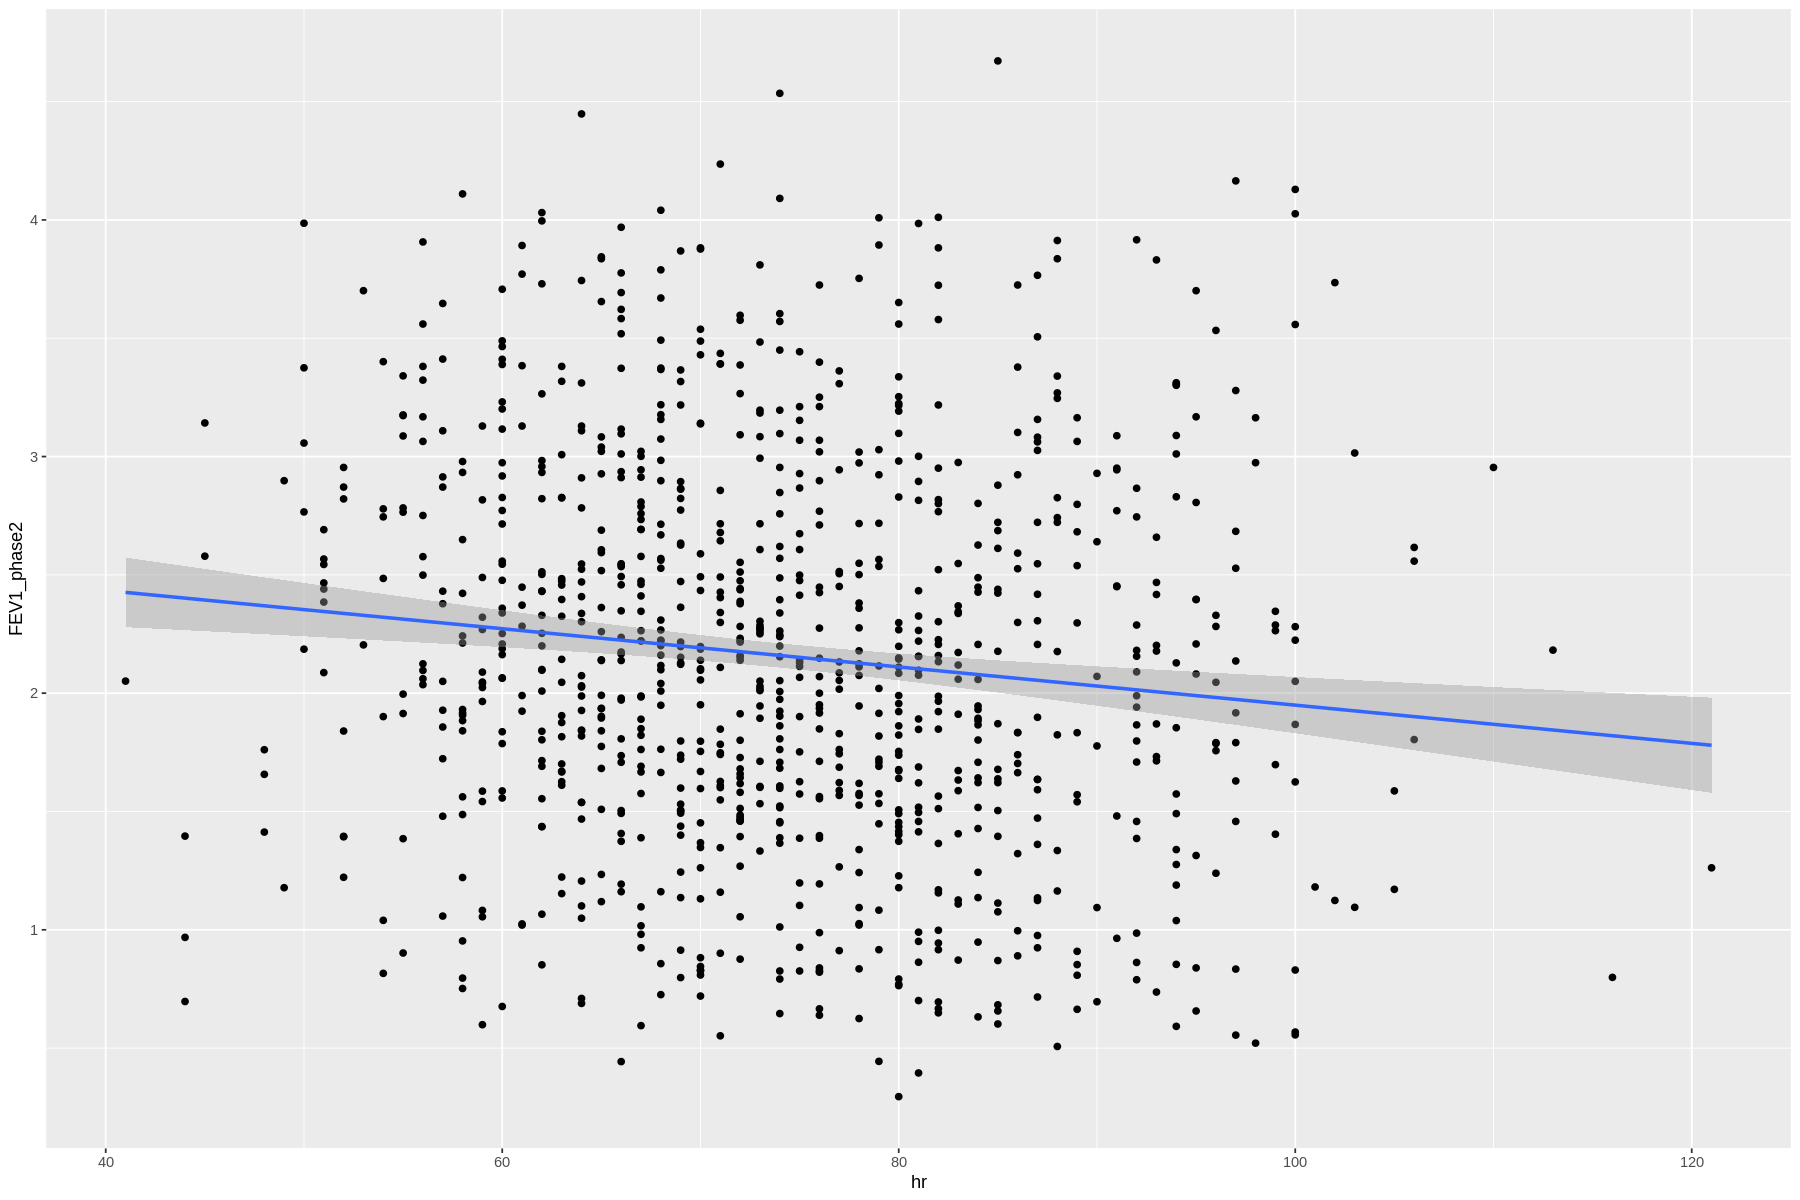

$rect
$rect$w
[1] 0.8655037

$rect$h
[1] 0.006053911

$rect$left
[1] 0.92

$rect$top
[1] 0.6467305


$text
$text$x
[1] 1.215541 1.215541

$text$y
[1] 0.6447125 0.6426946




`geom_smooth()` using formula = 'y ~ x'


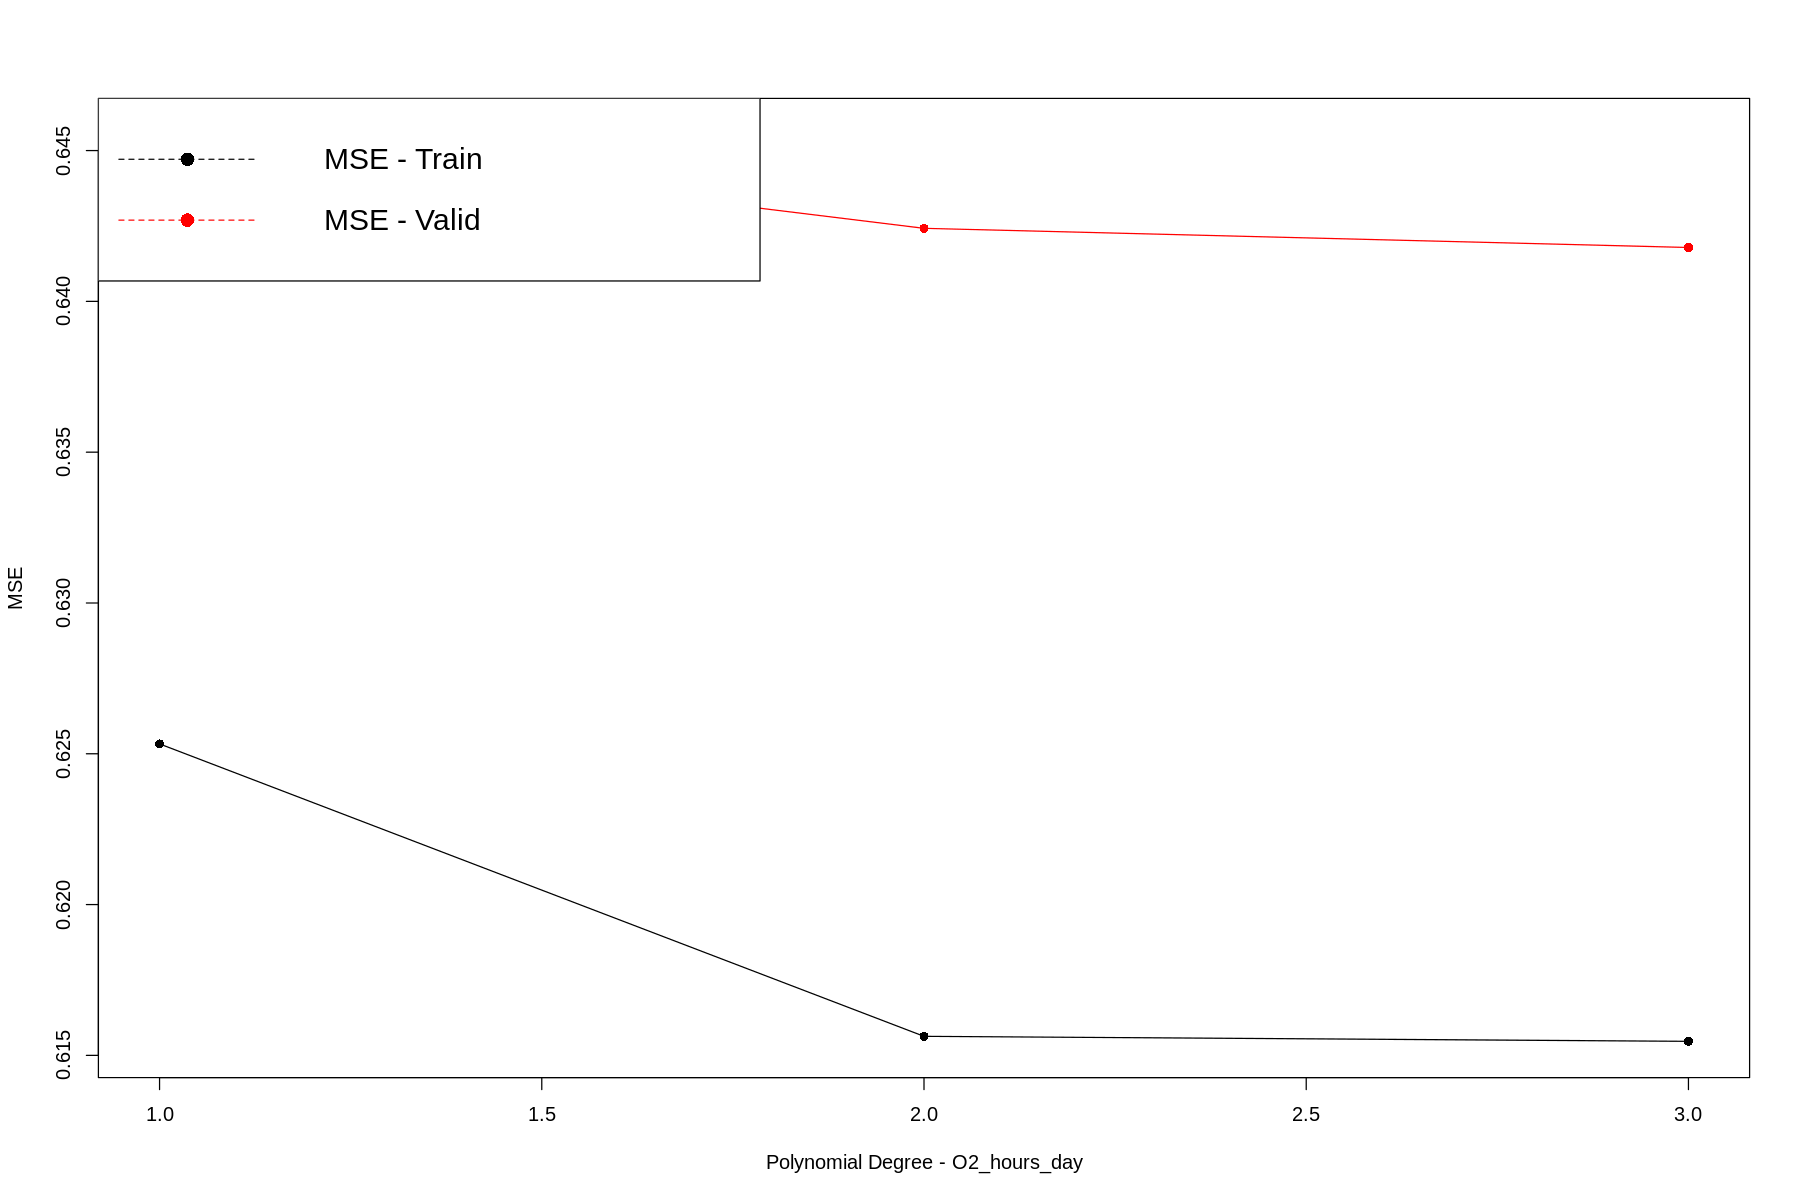

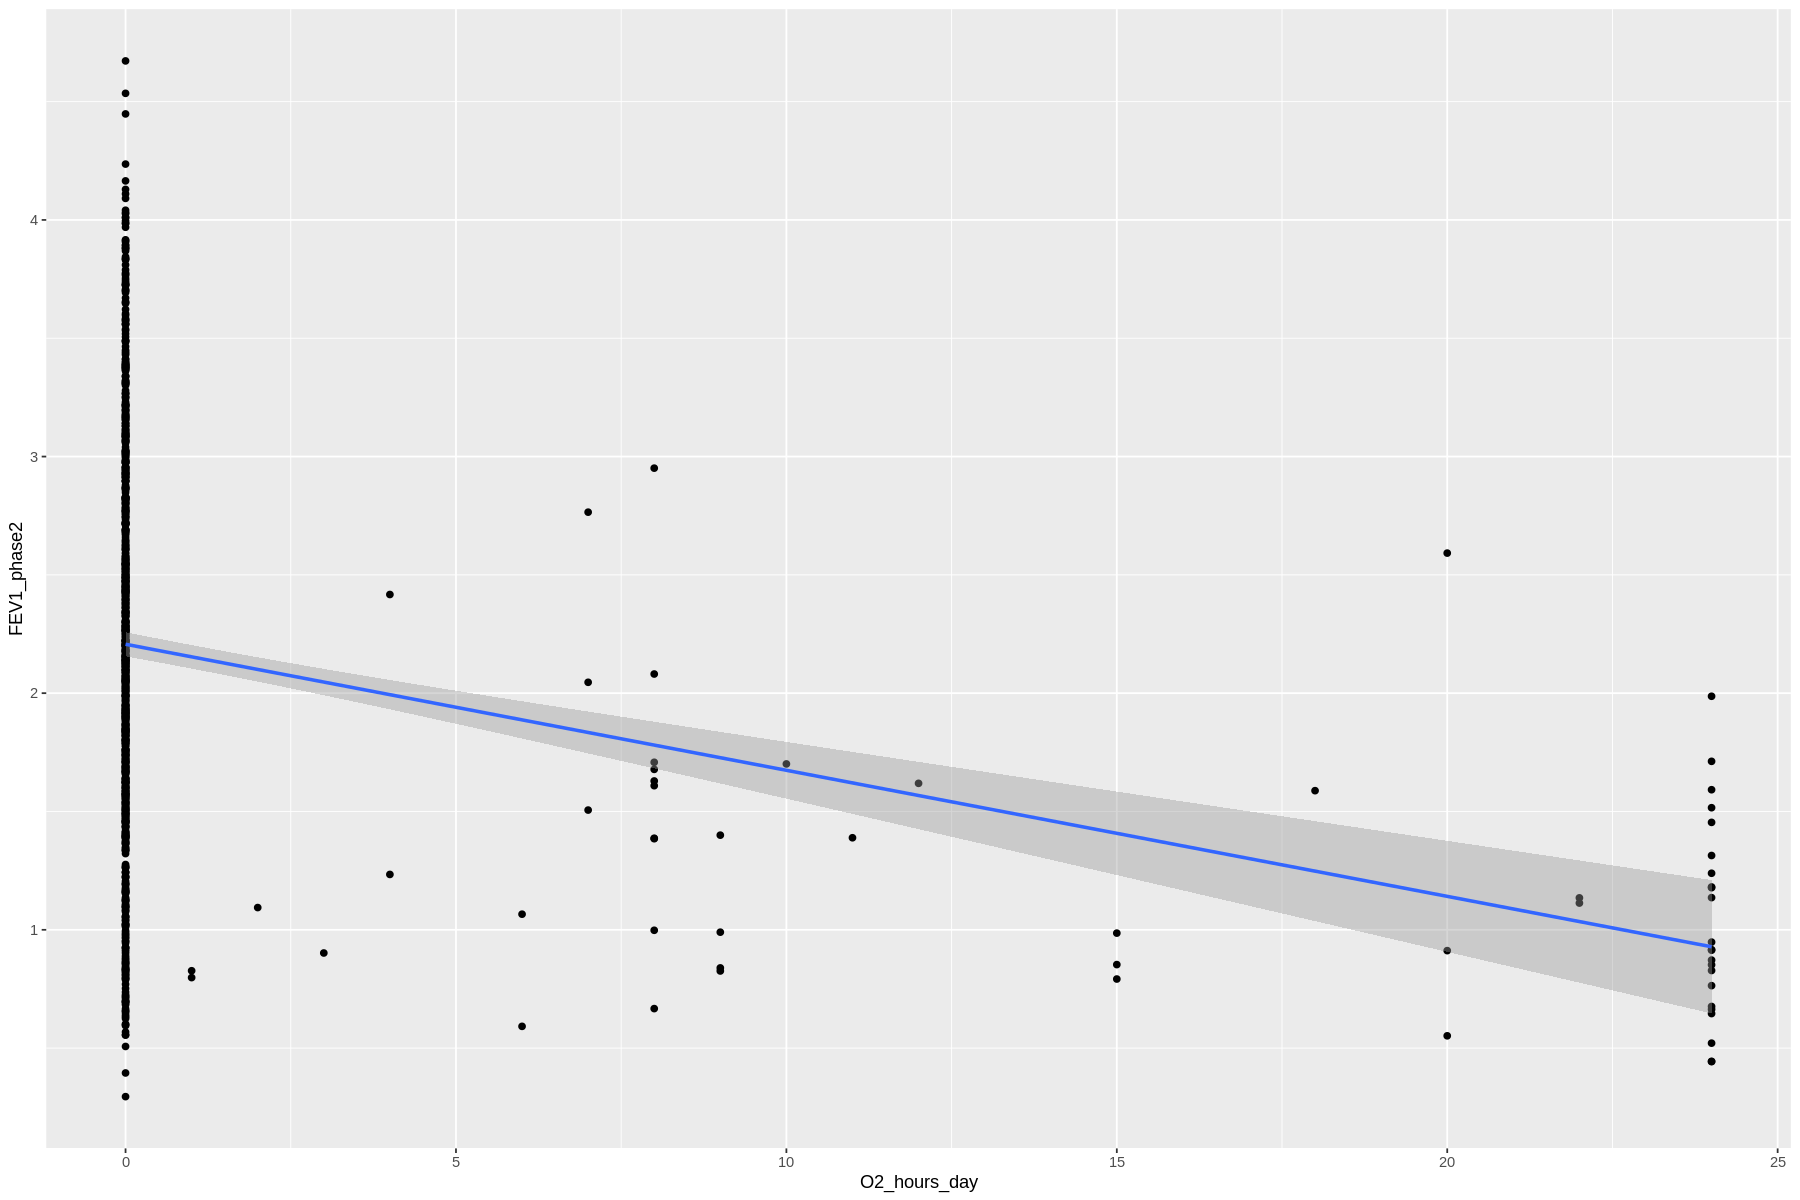

$rect
$rect$w
[1] 0.8655037

$rect$h
[1] 0.006615246

$rect$left
[1] 0.92

$rect$top
[1] 0.6967681


$text
$text$x
[1] 1.215541 1.215541

$text$y
[1] 0.6945630 0.6923579




`geom_smooth()` using formula = 'y ~ x'


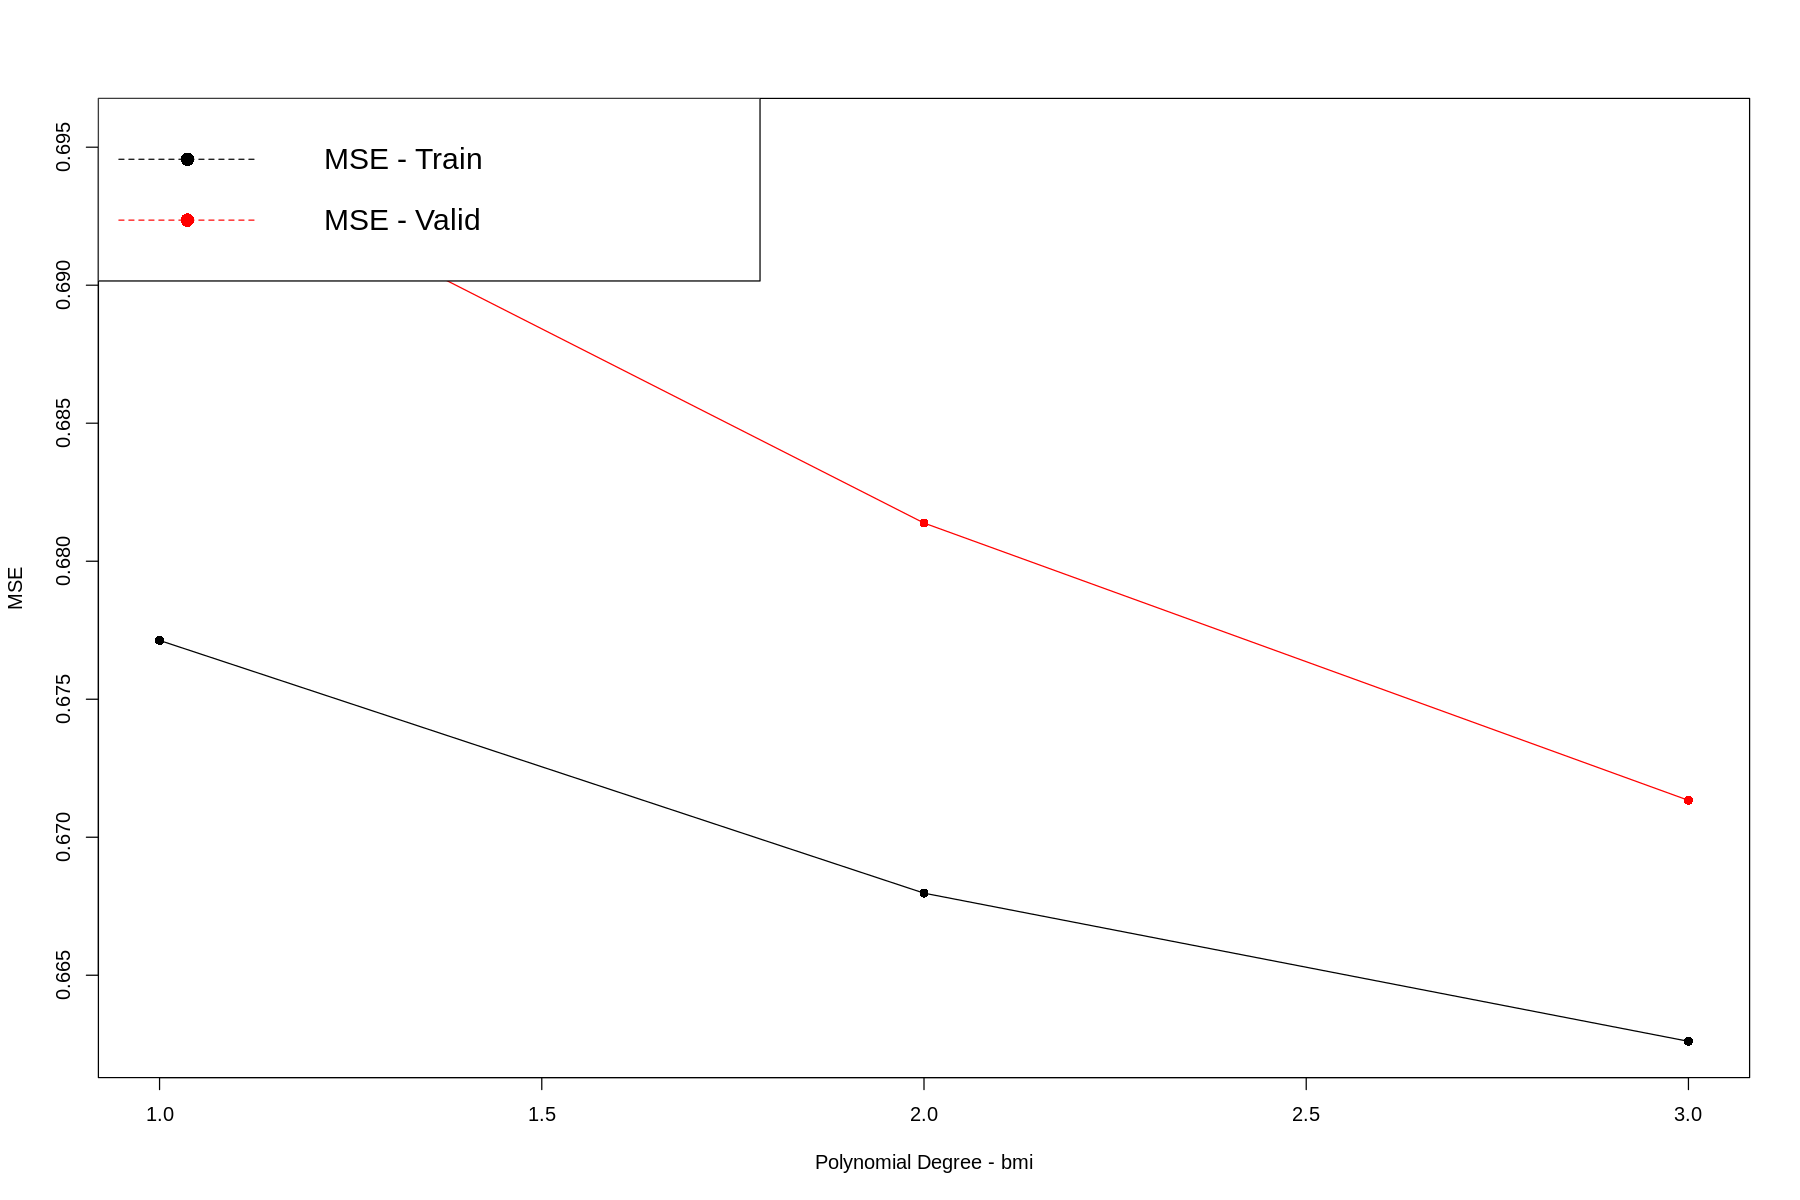

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


ERROR: Error in poly(hay_fever, 3): 'degree' must be less than number of unique points


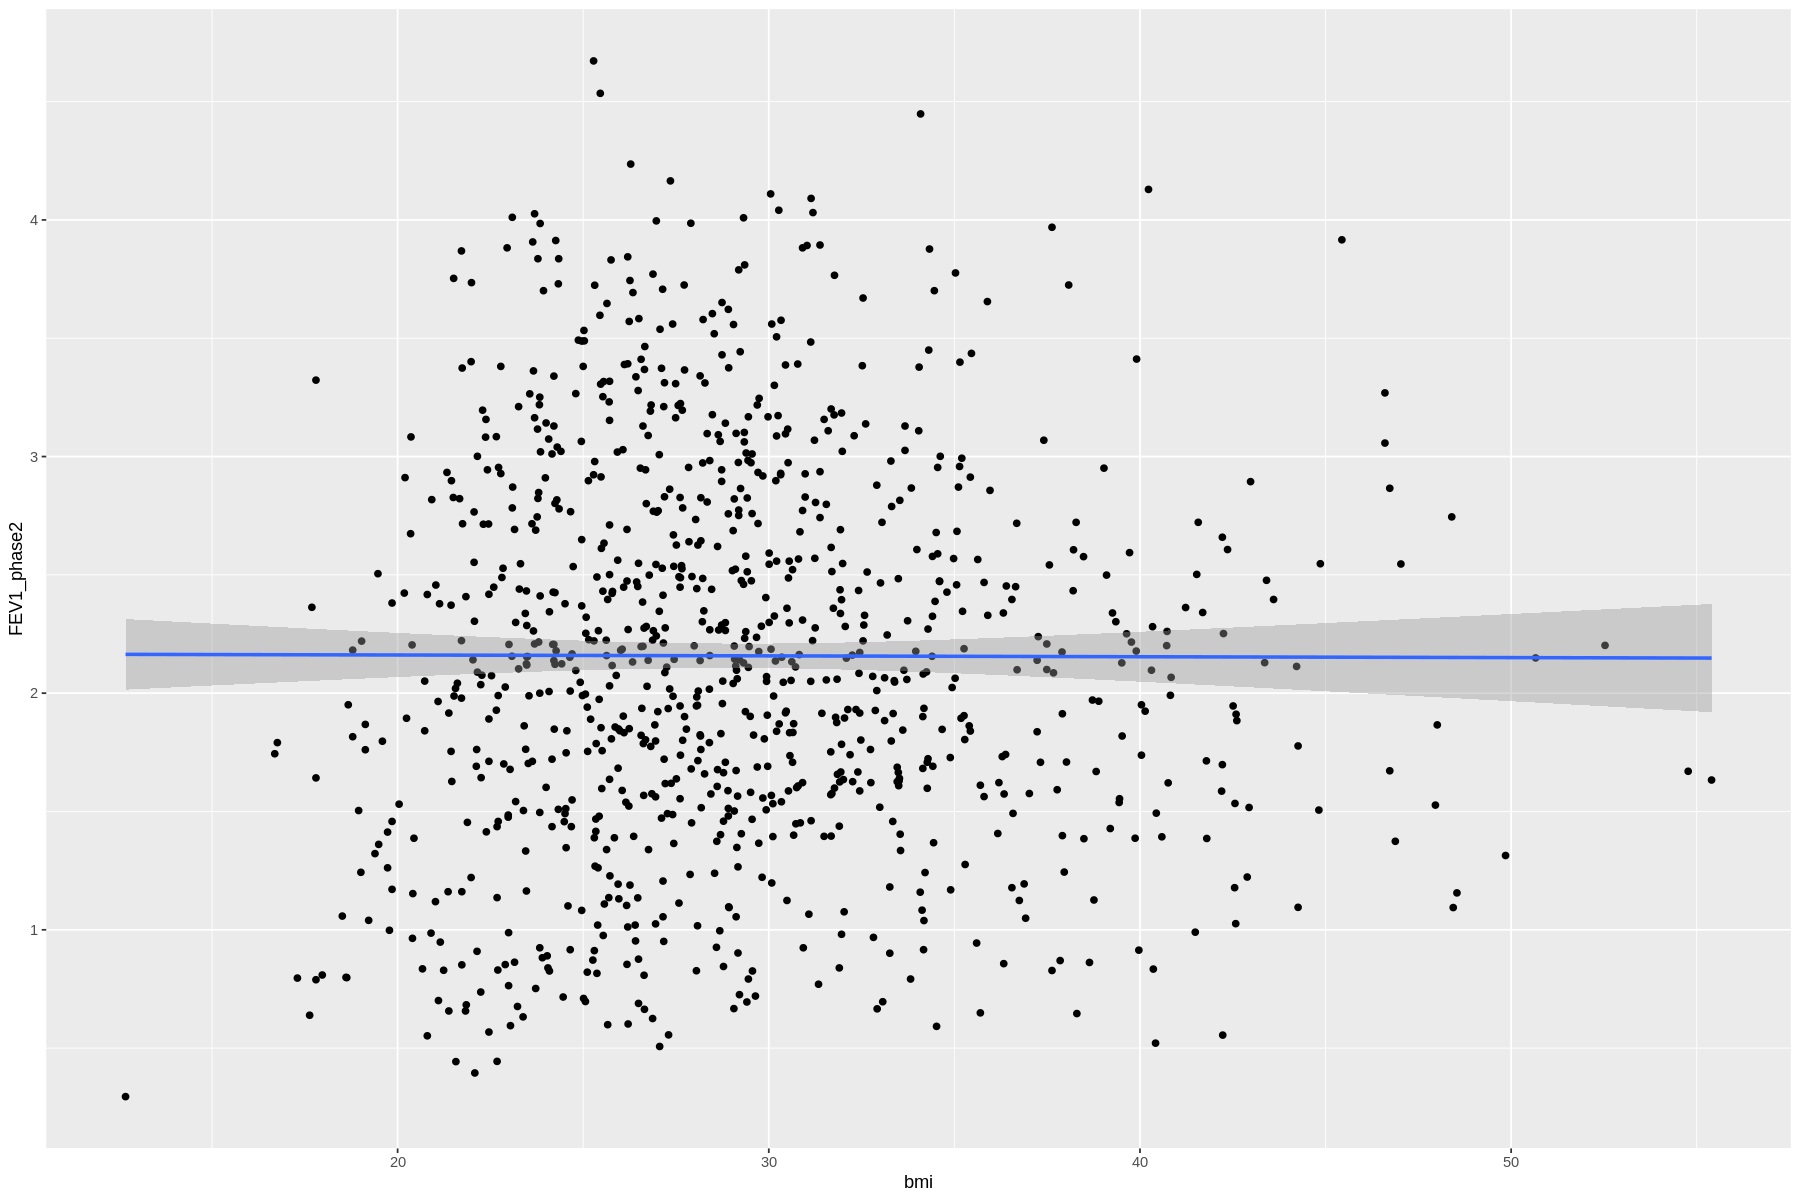

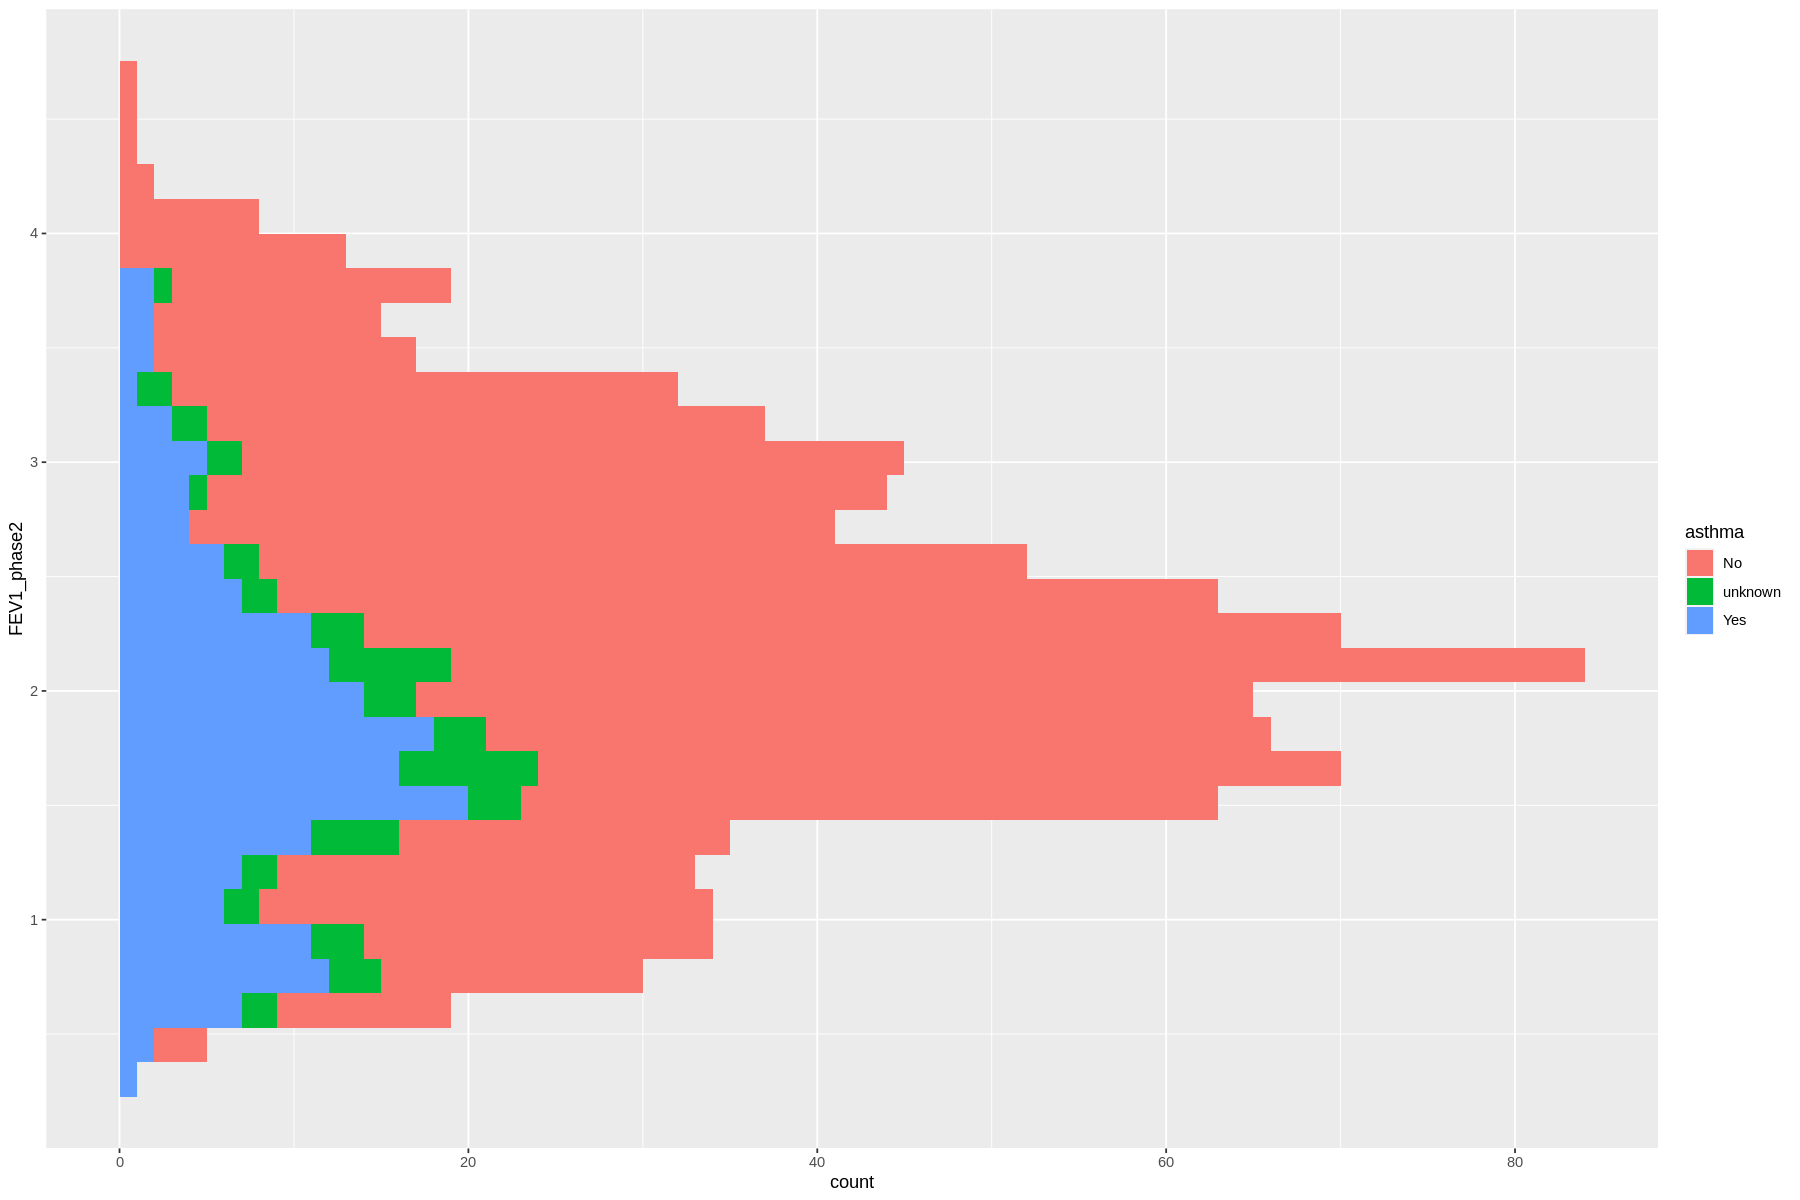

In [33]:
for (i in names(dat1)) {
  if (is.numeric(dat1[[i]])) {
    if (i != "FEV1_phase2") {
      print(mse_train_valid(i,"FEV1_phase2"))
      print(plot_slm(i,'FEV1_phase2'))
    }
  } else {
    print(plot_categ(i,'FEV1_phase2'))
  }
}

In [34]:
samp <- sample(1:nrow(dat1), round(.75*nrow(dat1)))
train <- dat1[samp, ]
valid <- dat1[-samp, ]

fit = lm(data=train, FEV1_phase2~FEV1+poly(FVC,2)+poly(FEV1_FVC_ratio,4))
mse(valid$FEV1_phase2,predict(fit,valid))
summary(fit)

[1] 0.0976145


Call:
lm(formula = FEV1_phase2 ~ FEV1 + poly(FVC, 2) + poly(FEV1_FVC_ratio, 
    4), data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.68172 -0.15541 -0.00246  0.15460  2.43719 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)              -0.46652    0.09417  -4.954 7.67e-07 ***
FEV1                      1.11889    0.04080  27.423  < 2e-16 ***
poly(FVC, 2)1            -9.67099    1.55770  -6.208 6.09e-10 ***
poly(FVC, 2)2             1.11963    0.45148   2.480   0.0132 *  
poly(FEV1_FVC_ratio, 4)1 -9.65476    0.89521 -10.785  < 2e-16 ***
poly(FEV1_FVC_ratio, 4)2  7.28585    0.69074  10.548  < 2e-16 ***
poly(FEV1_FVC_ratio, 4)3 -0.75653    0.30141  -2.510   0.0121 *  
poly(FEV1_FVC_ratio, 4)4 -1.16330    0.29251  -3.977 7.14e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2899 on 2992 degrees of freedom
Multiple R-squared:  0.8781,	Adjusted R-squared:  0.8778 
F-

In [35]:
fit$coefficients
confint(fit)

(Intercept)                     FEV1            poly(FVC, 2)1 
              -0.4665167                1.1188857               -9.6709915 
           poly(FVC, 2)2 poly(FEV1_FVC_ratio, 4)1 poly(FEV1_FVC_ratio, 4)2 
               1.1196298               -9.6547554                7.2858481 
poly(FEV1_FVC_ratio, 4)3 poly(FEV1_FVC_ratio, 4)4 
              -0.7565260               -1.1632984

,2.5 %,97.5 %
(Intercept),-0.6511559,-0.2818775
FEV1,1.0388856,1.1988859
"poly(FVC, 2)1",-12.7252682,-6.6167149
"poly(FVC, 2)2",0.2343899,2.0048696
"poly(FEV1_FVC_ratio, 4)1",-11.4100438,-7.8994670
"poly(FEV1_FVC_ratio, 4)2",5.9314767,8.6402195
"poly(FEV1_FVC_ratio, 4)3",-1.3475163,-0.1655357
"poly(FEV1_FVC_ratio, 4)4",-1.7368325,-0.5897643


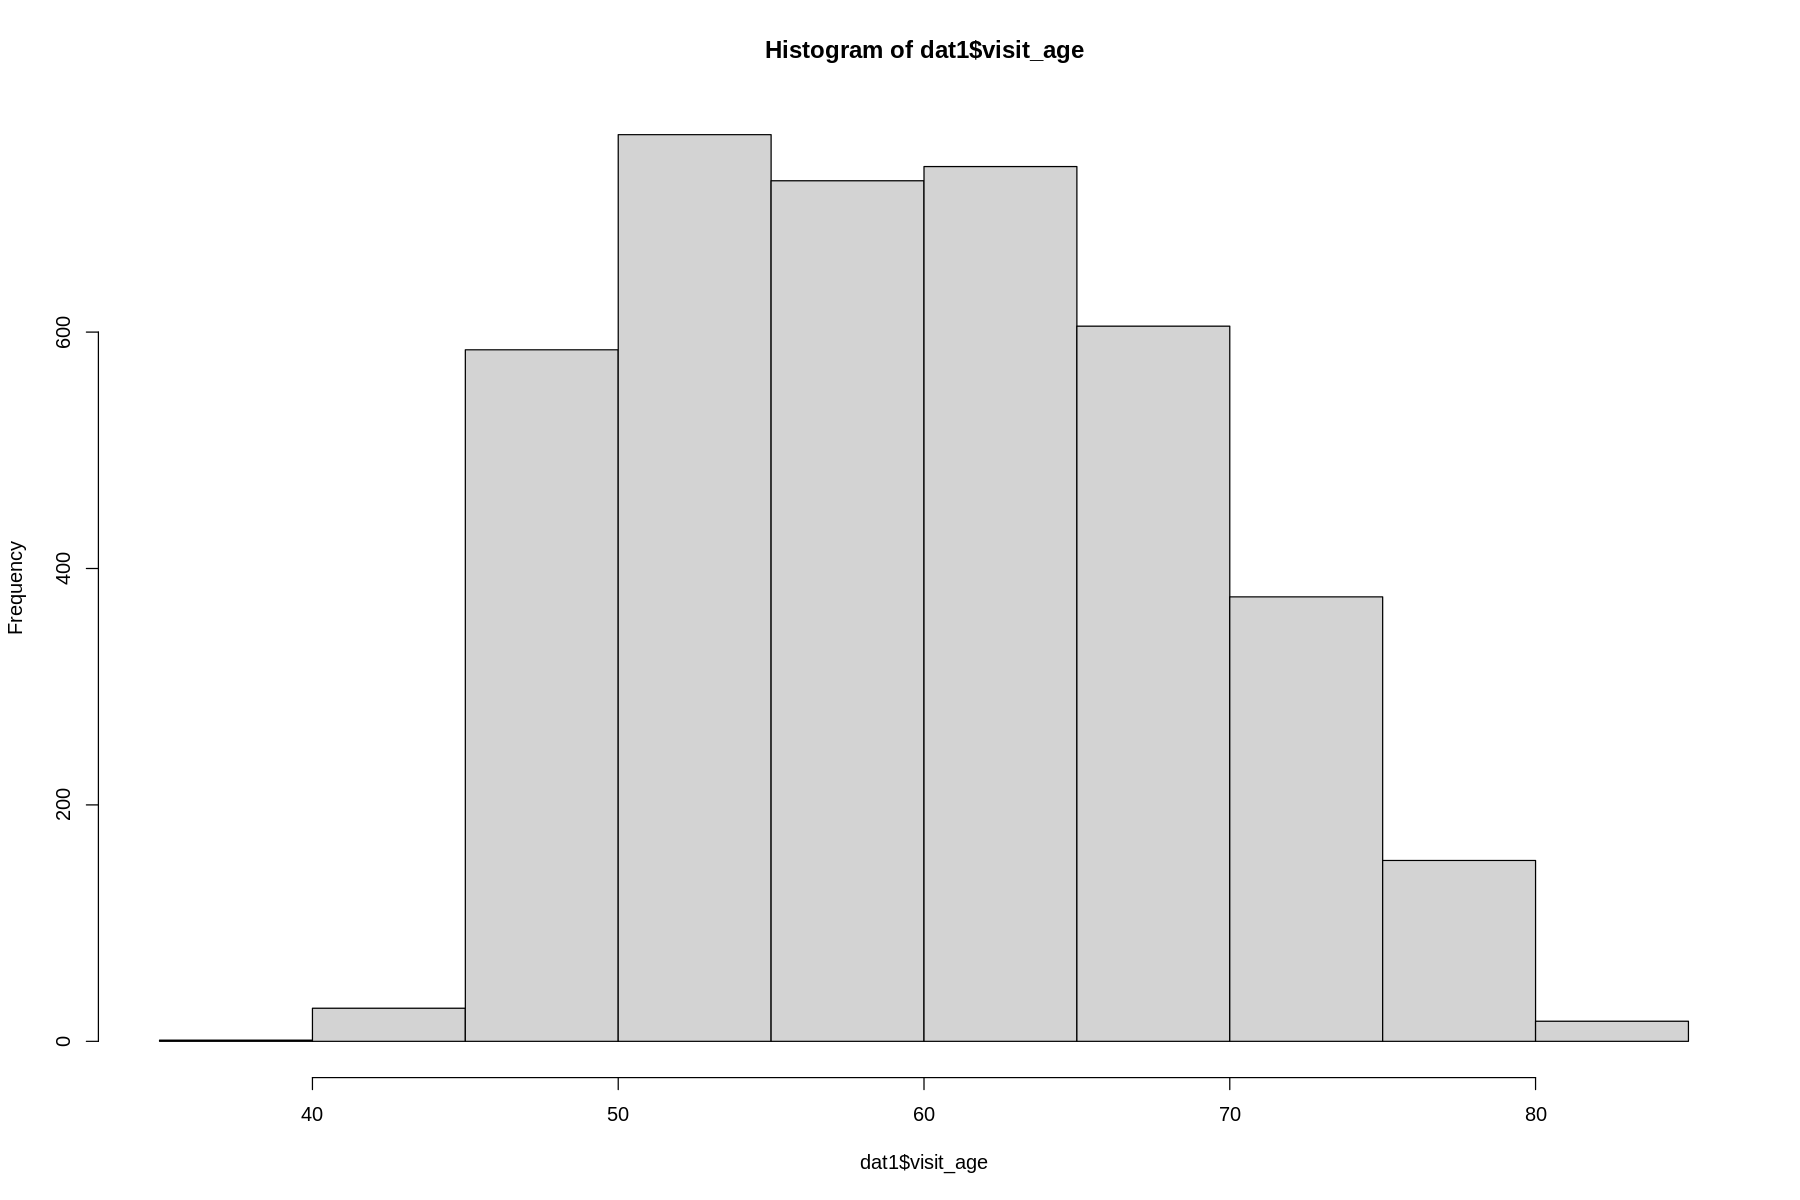

In [37]:
hist(dat1$visit_age)

In [38]:
test = dat[dat$FEV1_phase2 == "NA",]

In [40]:
FEV1_phase2_predictions = predict(fit, test)
preds <- data.frame(sid = test$sid, FEV1_phase2_predictions)
write.csv(preds, 'copd_predictions.csv')


<br>

---

<br>






####<font color=red>Task 10</font> (20 points)

Write a 500-750 word abstract describing your analysis. Note this is a formal writeup and should be written with proper spelling and grammar. Imagine you are submitting this abstract to a conference for review. The writeup should include the following:

* Introduction to the topic of COPD and motivation for the analysis
* Description of the purpose of the study/report (what you were interested in finding)
* Briefly describe the data used to perform the analysis
* Description of the variables and methods used to conduct the analysis (data visualization, t-tests, regression, random forests, etc.)
* Description of the major results (estimates, significance, etc.)
* Major conclusions from the analysis in the context of the original application.



This study is based on the findings from COPDGene. Chronic Obstructive Pulmonary Disease(COPD) is a disease that causes breathing problems and restricted airflow. The dataset includes information on patients including descriptors, test measurements, and disease history. The motivation of this study is to better understand how COPD and other health factors impact lung health.

The purpose of this report is to identify the most optimal parameters to best predict lung health after 5 years. We will be using Forced Expiratory Volume in one second(FEV1) as our metric for lung health. We will be analyzing variables of interest and variables we expect to have an impact on lung health.  


The data includes 35 measured variables. There are “NA” values and values of “-1” to also indicate no observation. There are 5747 total entries, 4000 entries omitting “NA” values.

The variables of interest included in our analysis is the previously mentioned FEV1, CigPerDaySmoking: Average for entire time, how many cigarettes smoked per day (cigarettes/day)
Duration_Smoking:Duration of smoking, years
smoking_status: Never-smoked, Former smoker, Current smoker
FEV_phase2: FEV1 five years later (liters) - volume of air forcefully exhaled in 1 second
pneumonia: Have you ever had pneumonia? (Yes, No, unknown)
sleep_apnea: Have you ever had sleep apnea? (Yes, No, unknown)
total_lung_capacity: Volume of air in lungs at full inspiration (full breath-hold) [Liters]
FVC: Forced vital capacity (liters) - volume of air exhaled after full breath
FEV1_FVC_ratio: Ratio between FEV1 and FVC
Other variables were still studied in the regression analysis, but were not found to be significant.

The distribution of FEV1 is approximately normal with a mean of 2.31065, and a standard deviation of 0.8736347. The distribution of the number of cigarettes smoked per day on average is approximately bell-shaped with a right skew. The distribution of  duration smoking(years) is approximately normal with a debatable left skew. FEV1 is not drastically different when compared between people with different smoking statuses. FEV1 does not vary between groups of people with and without pneumonia or Sleep Apnea. FEV1 after 5 years is strongly correlated with FEV1. The strongest linear regression model for predicting FEV1 after 5 years found to utilize FEV1, FVC, and FEV_FVC_ratio.

From this study, we have found that FEV1 is the strongest predictor for FEV1 after 5 years. The linear regression model that was found to be the strongest predictor was found to be

$$FEV1\_phase2=-0.42+1.10FEV1-9.63FCV+1.20FVC^2
-9.73FEV1\_FVC\_ratio+7.16FEV1\_FVC\_ratio^2-1.33FEV1\_FVC\_ratio^3-1.11FEV1\_FVC\_ratio^4$$

Note that coefficients have been rounded for sake of clarity. It is important to note that because the linear regression model contains polynomial coefficients that are not all negative or all positive, it is difficult to learn how each variable impacts FEV1 after 5 years. What we can learn from the model is that FEV1 has a positive linear correlation with FEV1 after 5 years. Specifically, for every one liter increase in FEV1, FEV1 after 5 years will increase by 1.10. A metric we can look at to better understand the linear regression model is a 95% confidence interval of the coefficients. Surprisingly, we are 95% confident that the true coefficient for FEV1 is [1.02,1,18]. THis means that it is significantly different from zero. This is surprising because one would think lung health decreases slowly over time. Even when looking at the distribution of age, the patents tend to be between 45 and 80 years old.
